In [1]:
# Data Preprocessing
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Dimension Reducing
from sklearn.pipeline import Pipeline

# Resampling
from sklearn.utils import class_weight

# Model evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

# Model Saver
import pickle

In [3]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
df.head(5)

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [5]:
df.shape

(205, 26)

# 1) Data Preprocessing

<b> Check if exist duplicate values </b>

In [6]:
# Verify if the data has duplicated values
duplicates = df.duplicated().sum()
print("Total duplicated values:", duplicates)

Total duplicated values: 0


<b> Check if exist missing values </b>

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.describe(include='all')

car_ID   symboling        CarName fueltype aspiration doornumber  \
count   205.000000  205.000000            205      205        205        205   
unique         NaN         NaN            147        2          2          2   
top            NaN         NaN  toyota corona      gas        std       four   
freq           NaN         NaN              6      185        168        115   
mean    103.000000    0.834146            NaN      NaN        NaN        NaN   
std      59.322565    1.245307            NaN      NaN        NaN        NaN   
min       1.000000   -2.000000            NaN      NaN        NaN        NaN   
25%      52.000000    0.000000            NaN      NaN        NaN        NaN   
50%     103.000000    1.000000            NaN      NaN        NaN        NaN   
75%     154.000000    2.000000            NaN      NaN        NaN        NaN   
max     205.000000    3.000000            NaN      NaN        NaN        NaN   

       carbody drivewheel enginelocation   wheelbase  ...  enginesize  \
count      205        205            205  205.000000  ...  205.000000   
unique       5          3              2         NaN  ...         NaN   
top      sedan        fwd          front         NaN  ...         NaN   
freq        96        120            202         NaN  ...         NaN   
mean       NaN        NaN            NaN   98.756585  ...  126.907317   
std        NaN        NaN            NaN    6.021776  ...   41.642693   
min        NaN        NaN            NaN   86.600000  ...   61.000000   
25%        NaN        NaN            NaN   94.500000  ...   97.000000   
50%        NaN        NaN            NaN   97.000000  ...  120.000000   
75%        NaN        NaN            NaN  102.400000  ...  141.000000   
max        NaN        NaN            NaN  120.900000  ...  326.000000   

        fuelsystem   boreratio      stroke compressionratio  horsepower  \
count          205  205.000000  205.000000       205.000000  205.000000   
unique           8         NaN         NaN              NaN         NaN   
top           mpfi         NaN         NaN              NaN         NaN   
freq            94         NaN         NaN              NaN         NaN   
mean           NaN    3.329756    3.255415        10.142537  104.117073   
std            NaN    0.270844    0.313597         3.972040   39.544167   
min            NaN    2.540000    2.070000         7.000000   48.000000   
25%            NaN    3.150000    3.110000         8.600000   70.000000   
50%            NaN    3.310000    3.290000         9.000000   95.000000   
75%            NaN    3.580000    3.410000         9.400000  116.000000   
max            NaN    3.940000    4.170000        23.000000  288.000000   

            peakrpm     citympg  highwaympg         price  
count    205.000000  205.000000  205.000000    205.000000  
unique          NaN         NaN         NaN           NaN  
top             NaN         NaN         NaN           NaN  
freq            NaN         NaN         NaN           NaN  
mean    5125.121951   25.219512   30.751220  13276.710571  
std      476.985643    6.542142    6.886443   7988.852332  
min     4150.000000   13.000000   16.000000   5118.000000  
25%     4800.000000   19.000000   25.000000   7788.000000  
50%     5200.000000   24.000000   30.000000  10295.000000  
75%     5500.000000   30.000000   34.000000  16503.000000  
max     6600.000000   49.000000   54.000000  45400.000000  

[11 rows x 26 columns]

<b> Seperate Category and Numerical Features </b>

In [10]:
cat_cols = []
num_cols = []

for feature in df.columns:
    if df[feature].dtype == object: cat_cols.append(feature)
    else: num_cols.append(feature) # float64 and int64

In [11]:
print(f"The categorical columns are as follow: {cat_cols}. \n\n The numerical columns are as follow: {num_cols}")

The categorical columns are as follow: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']. 

 The numerical columns are as follow: ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [12]:
# Categorical Feature value_counts()
for feature in cat_cols:
    print()
    print(feature)
    print(df[feature].value_counts())
    print()
    print("===============================")


CarName
CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64


fueltype
fueltype
gas       185
diesel     20
Name: count, dtype: int64


aspiration
aspiration
std      168
turbo     37
Name: count, dtype: int64


doornumber
doornumber
four    115
two      90
Name: count, dtype: int64


carbody
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


drivewheel
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


enginelocation
enginelocation
front    202
rear       3
Name: count, dtype: int64


enginetype
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype

In [13]:
# Numerical Feature value_counts()
for feature in num_cols:
    print()
    print(feature)
    print(df[feature].value_counts())
    print()
    print("===============================")


car_ID
car_ID
1      1
142    1
132    1
133    1
134    1
      ..
72     1
73     1
74     1
75     1
205    1
Name: count, Length: 205, dtype: int64


symboling
symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64


wheelbase
wheelbase
94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: count, dtype: int64


carlength
carlength
157.3    15
188.8    11
171.7     7
186

In [14]:
for feature in df.columns:
    print()
    print(feature)
    print(df[feature].nunique())
    print("===============================")    
    print()


car_ID
205


symboling
6


CarName
147


fueltype
2


aspiration
2


doornumber
2


carbody
5


drivewheel
3


enginelocation
2


wheelbase
53


carlength
75


carwidth
44


carheight
49


curbweight
171


enginetype
7


cylindernumber
7


enginesize
44


fuelsystem
8


boreratio
38


stroke
37


compressionratio
32


horsepower
59


peakrpm
23


citympg
29


highwaympg
30


price
189



In [15]:
df.head(5)

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [16]:
df.drop(columns=['car_ID'], inplace=True)

In [17]:
df.head(5)

symboling                   CarName fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0         130        mpfi       3.47   2.68              9.0         111   
1         130        mpfi       3.47   2.68              9.0         111   
2         152        mpfi       2.68   3.47              9.0         154   
3         109        mpfi       3.19   3.40             10.0         102   
4         136        mpfi       3.19   3.40              8.0         115   

  peakrpm  citympg  highwaympg    price  
0    5000       21          27  13495.0  
1    5000       21          27  16500.0  
2    5000       19          26  16500.0  
3    5500       24          30  13950.0  
4    5500       18          22  17450.0  

[5 rows x 25 columns]

# 2) Data Exploration

## Categorical Columns Plotting

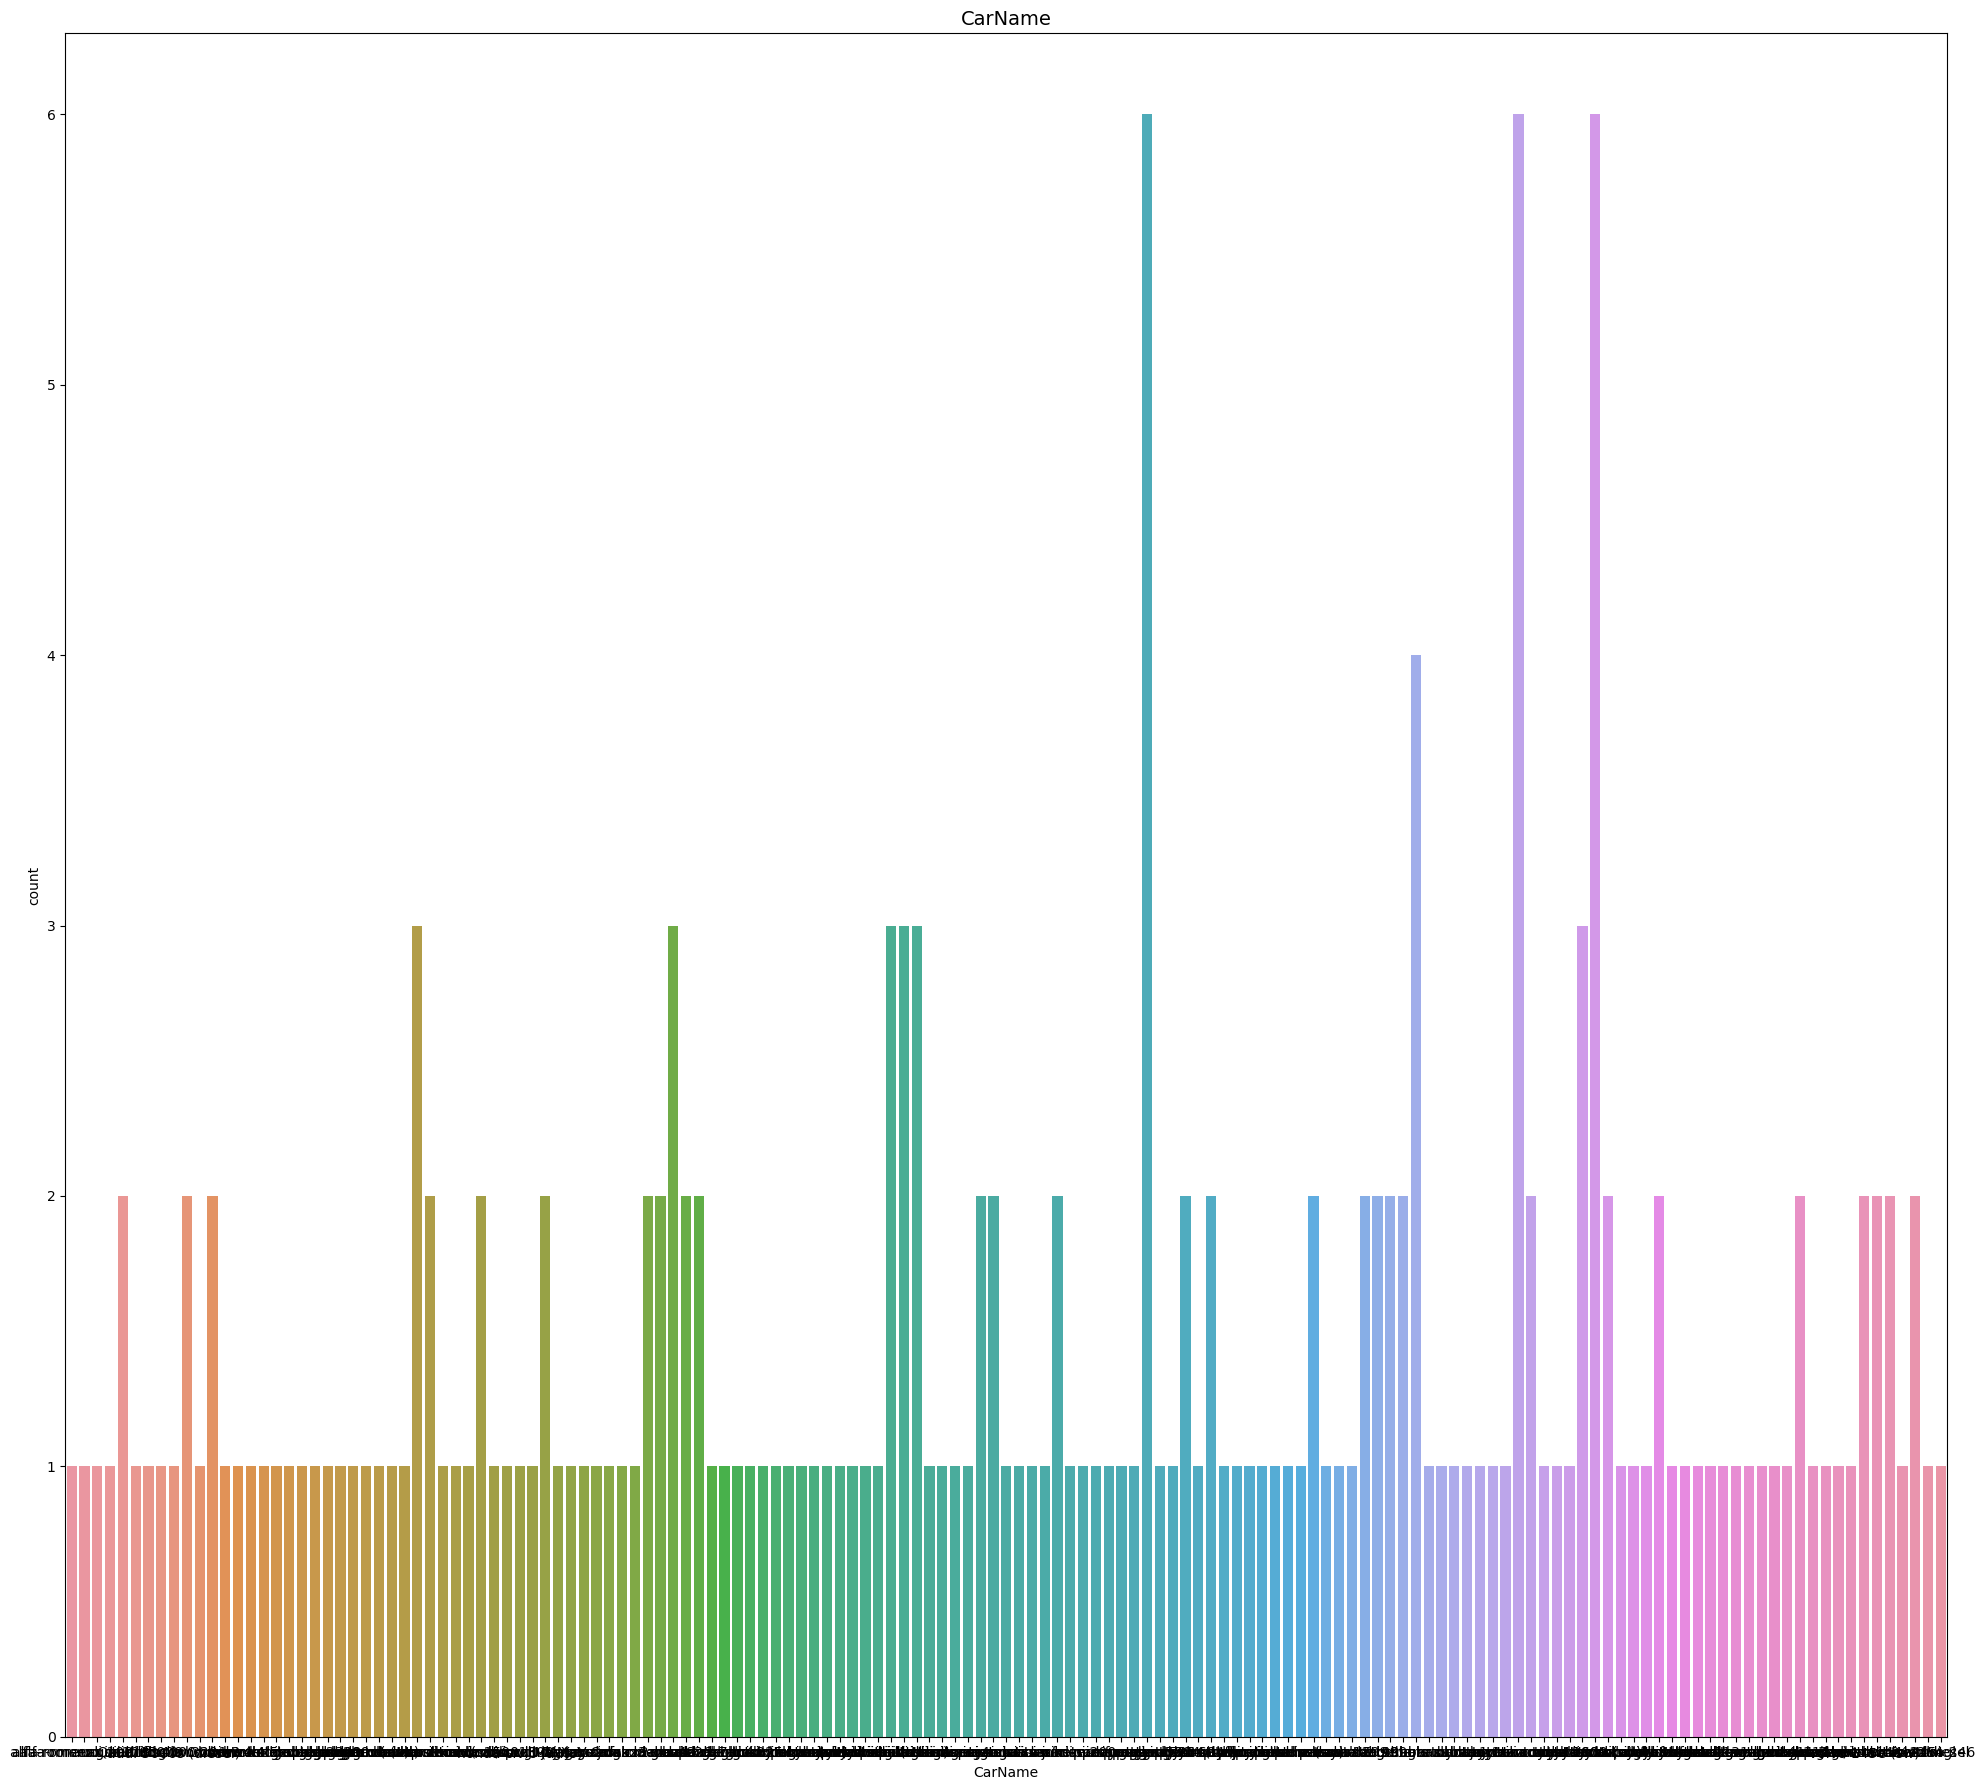

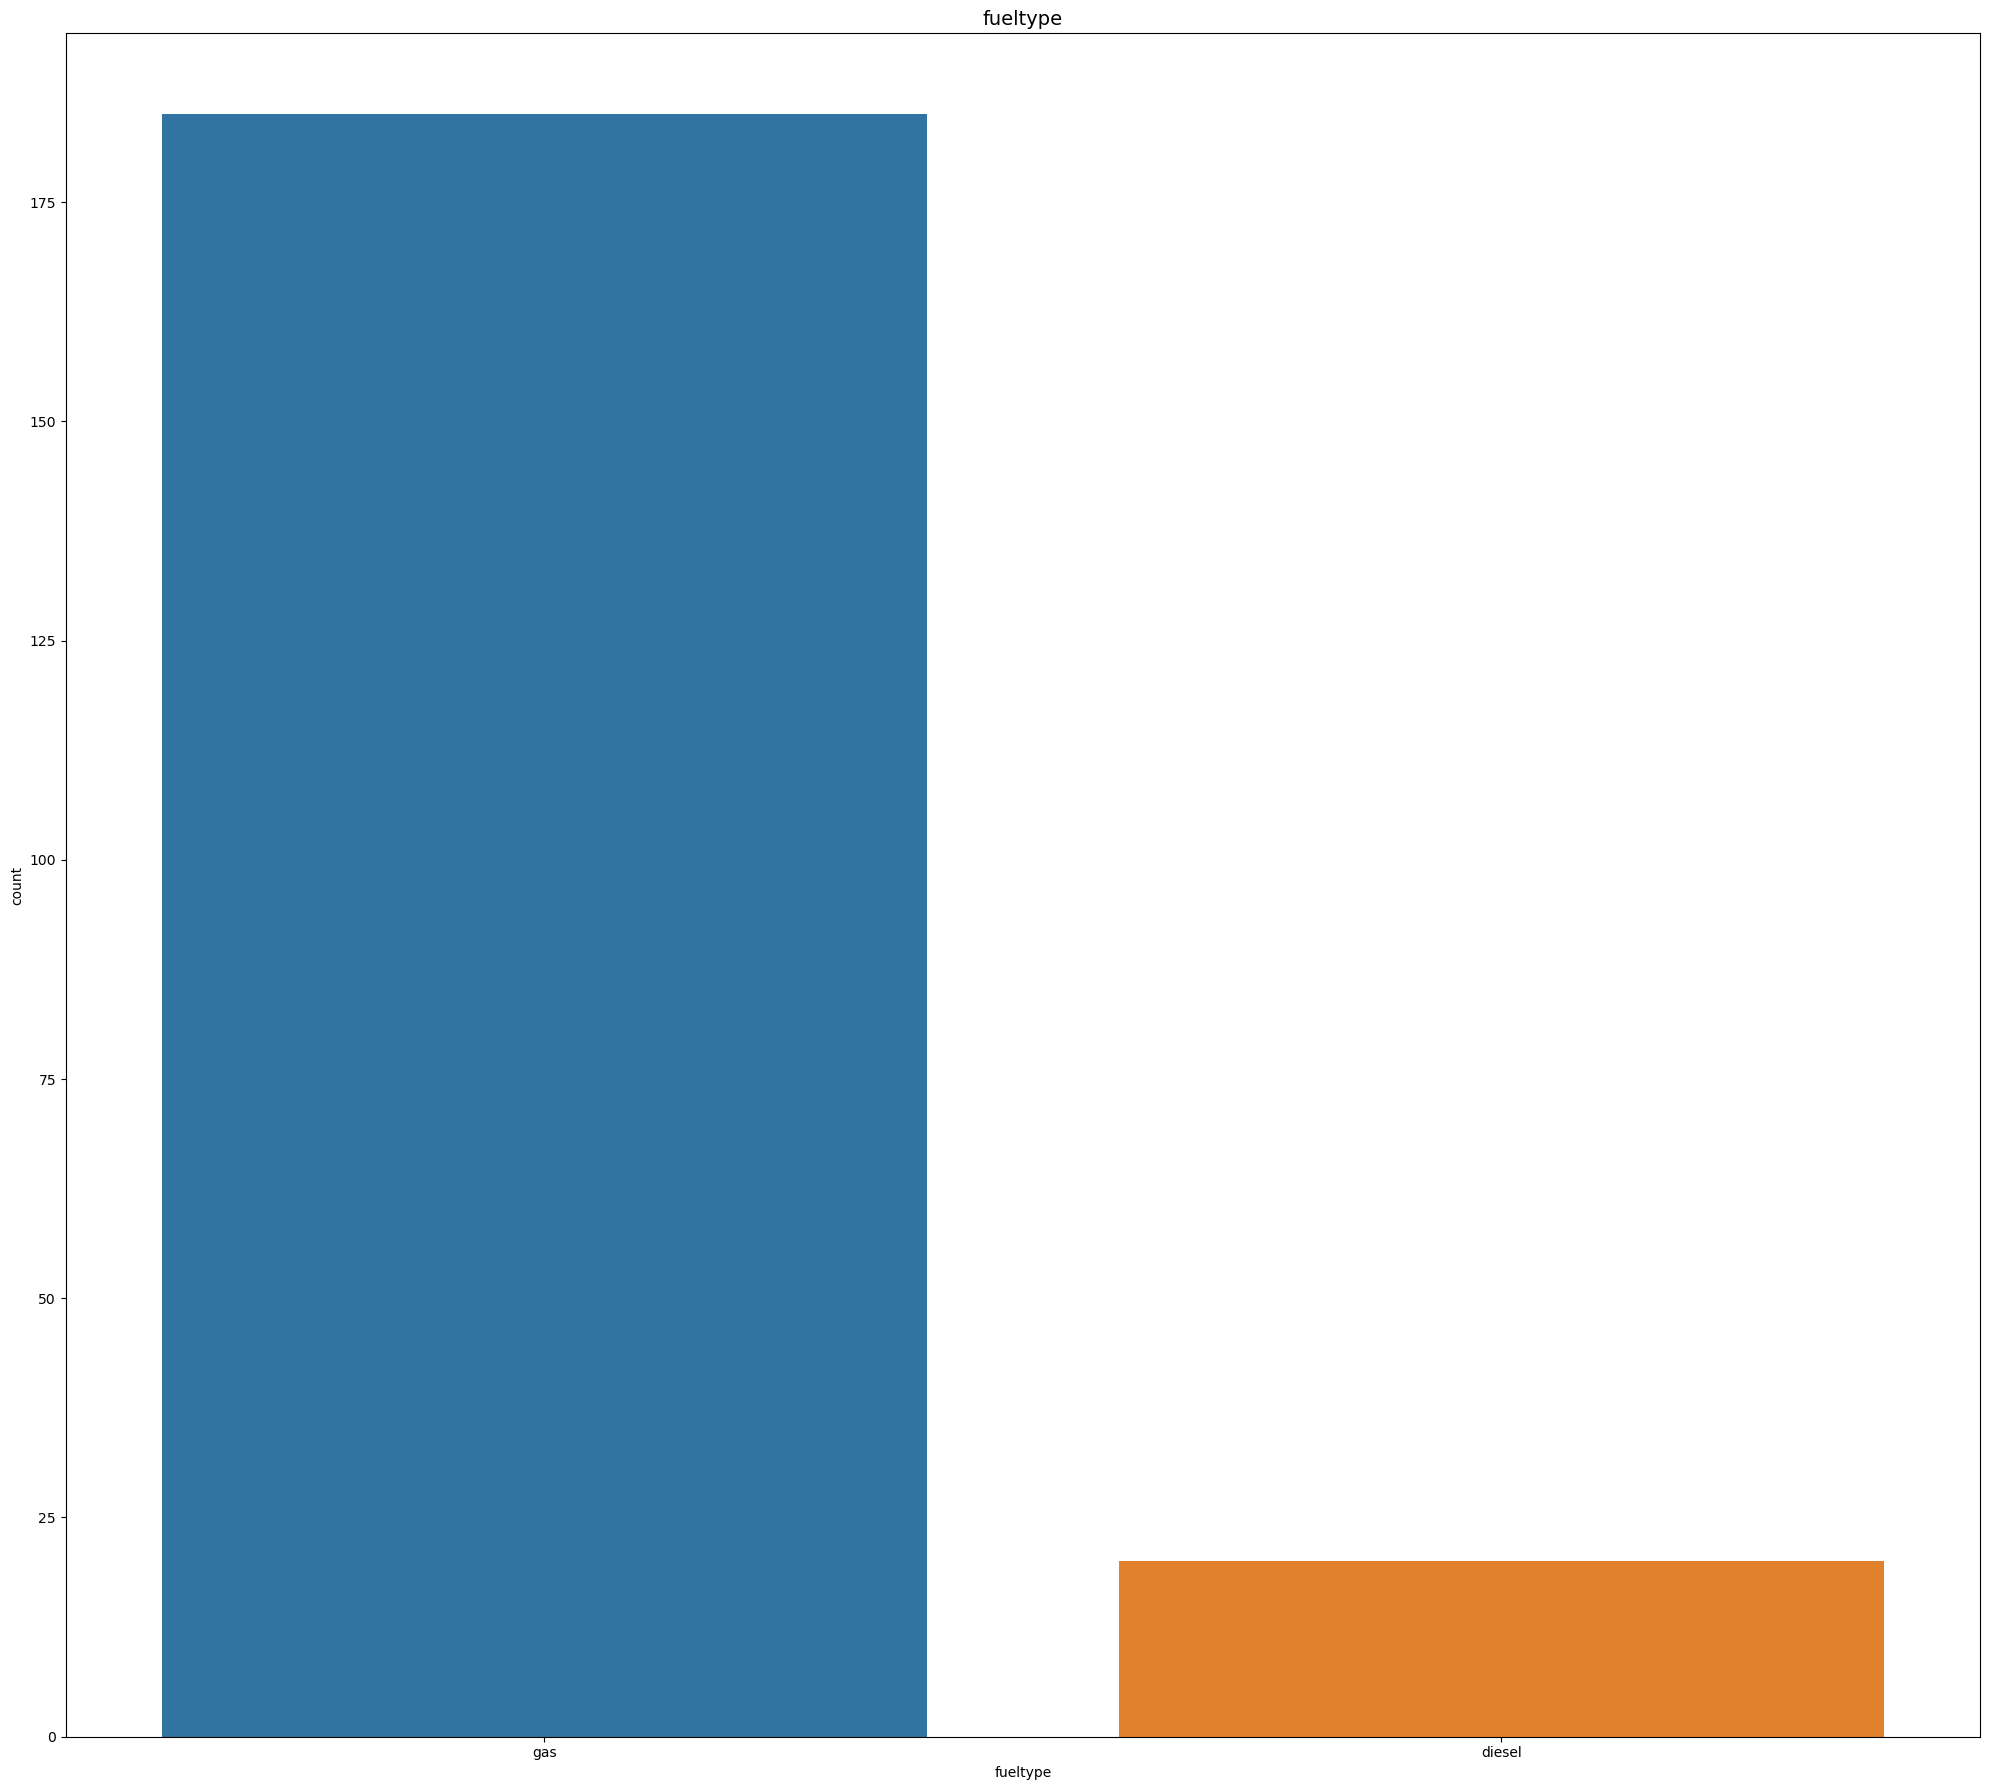

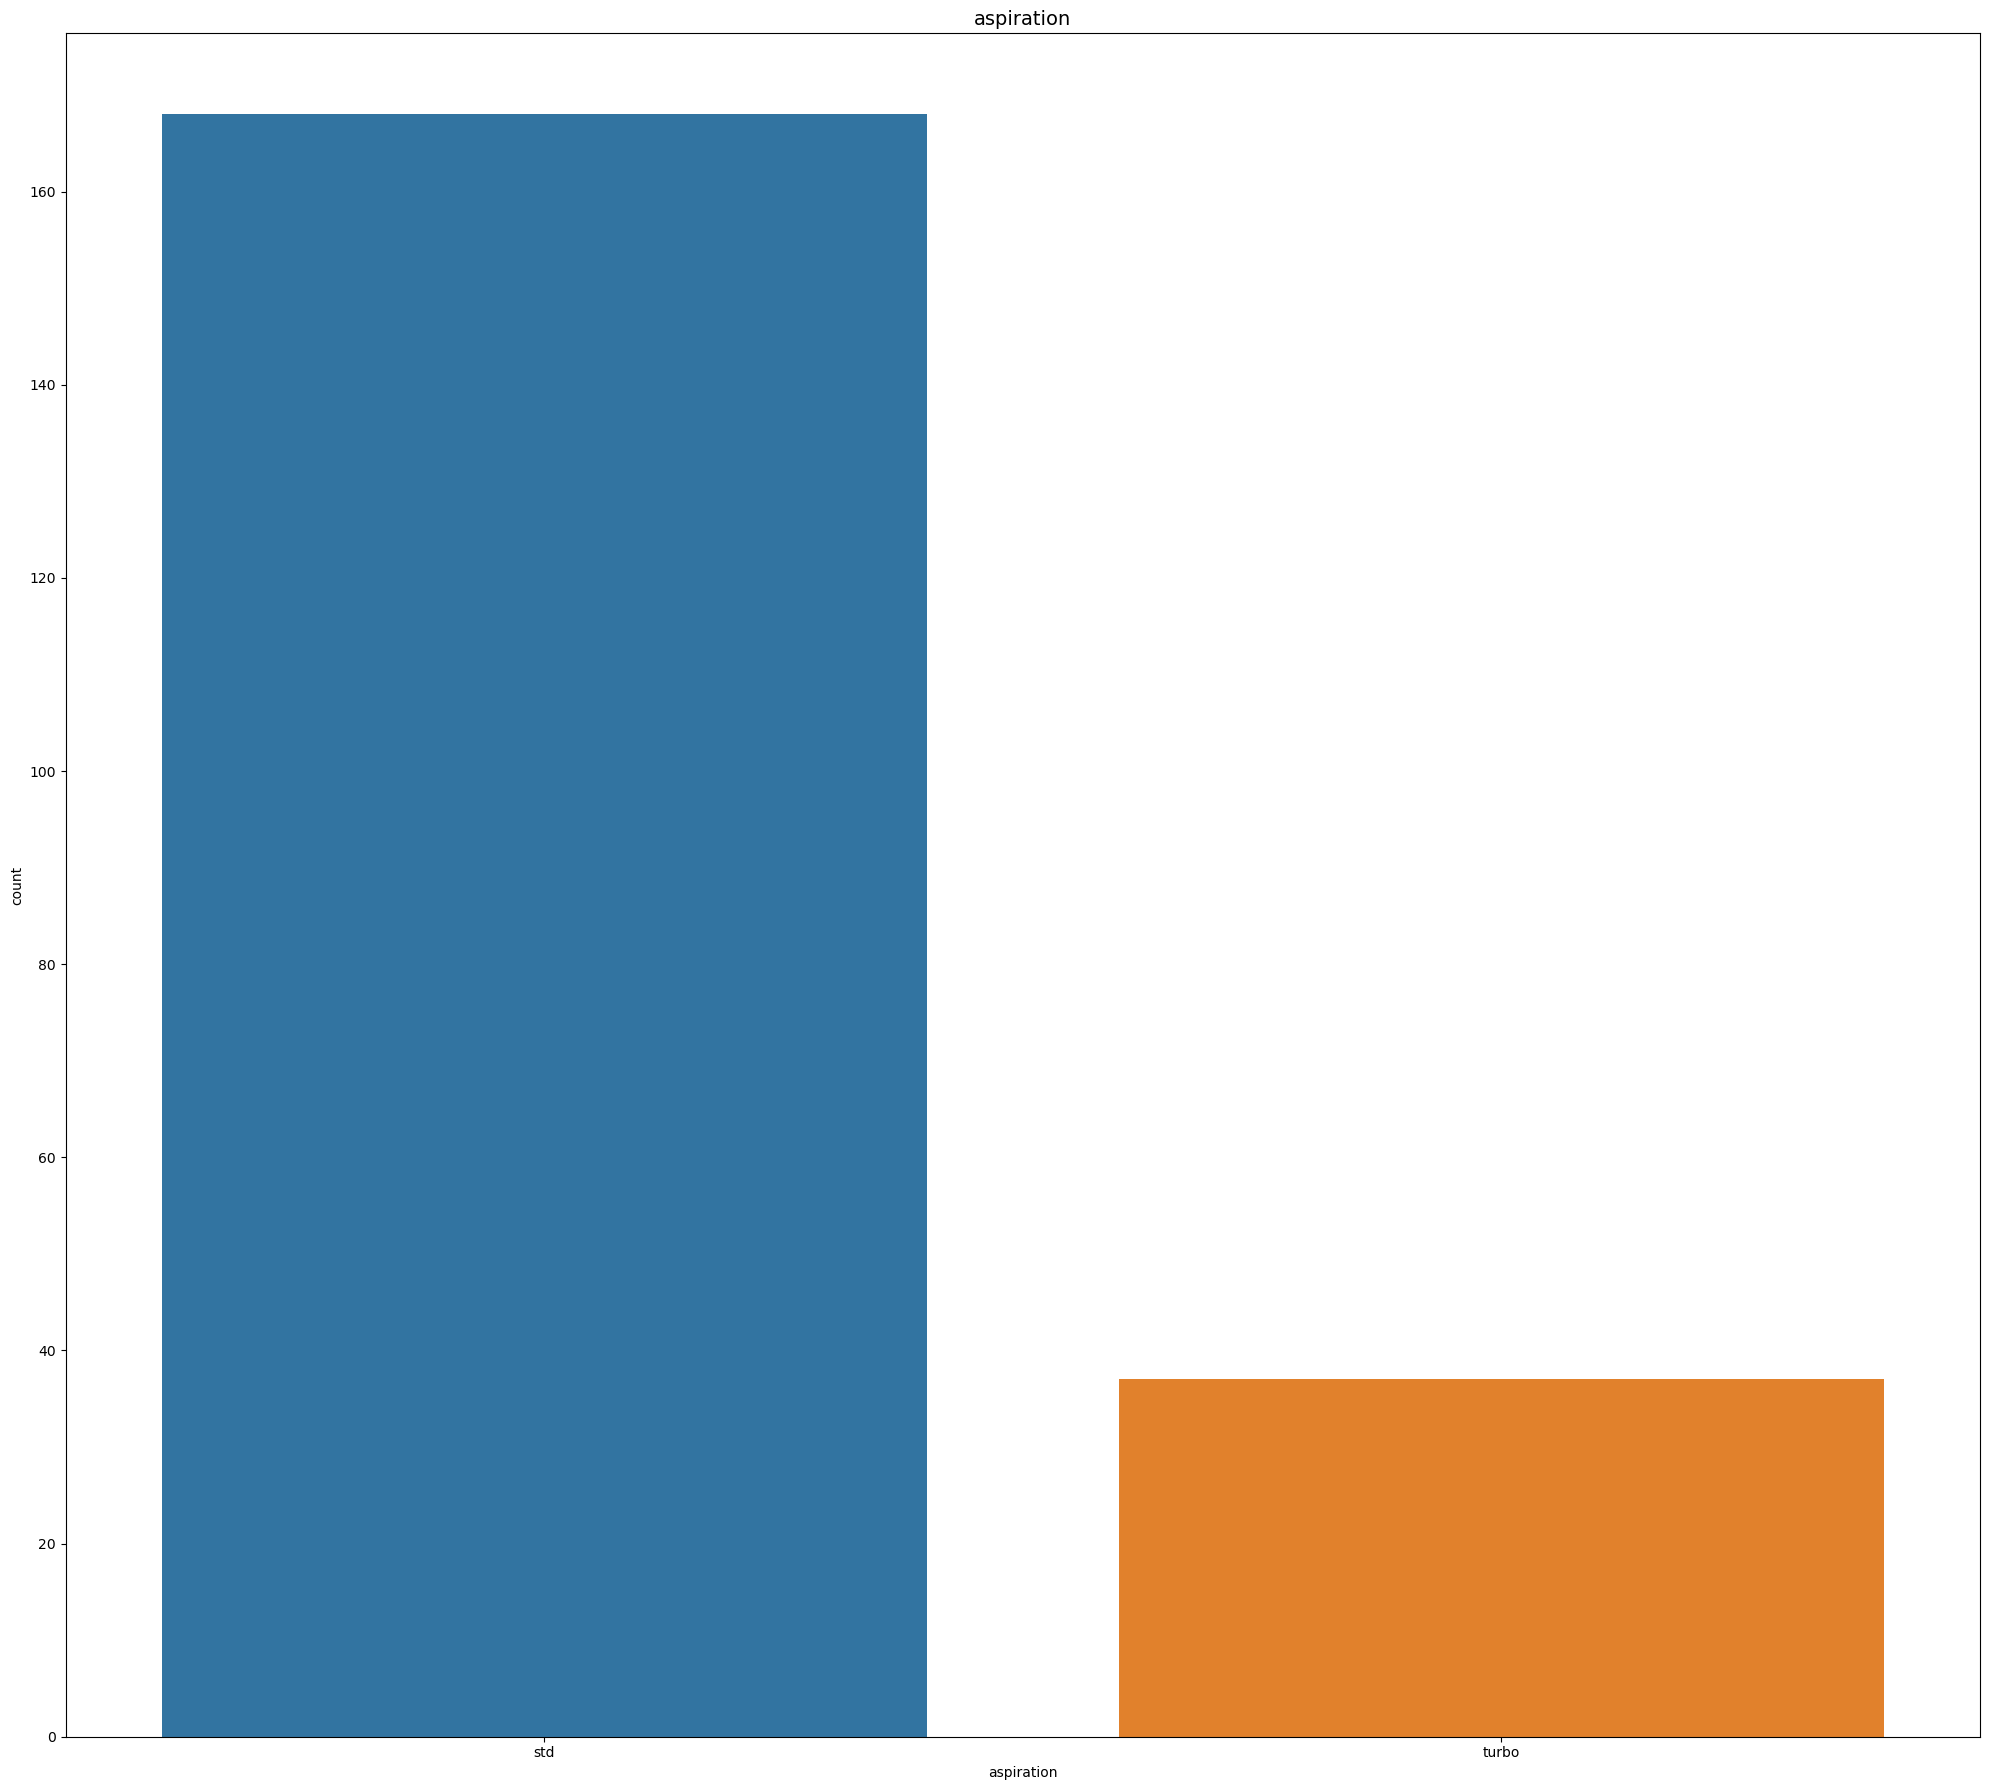

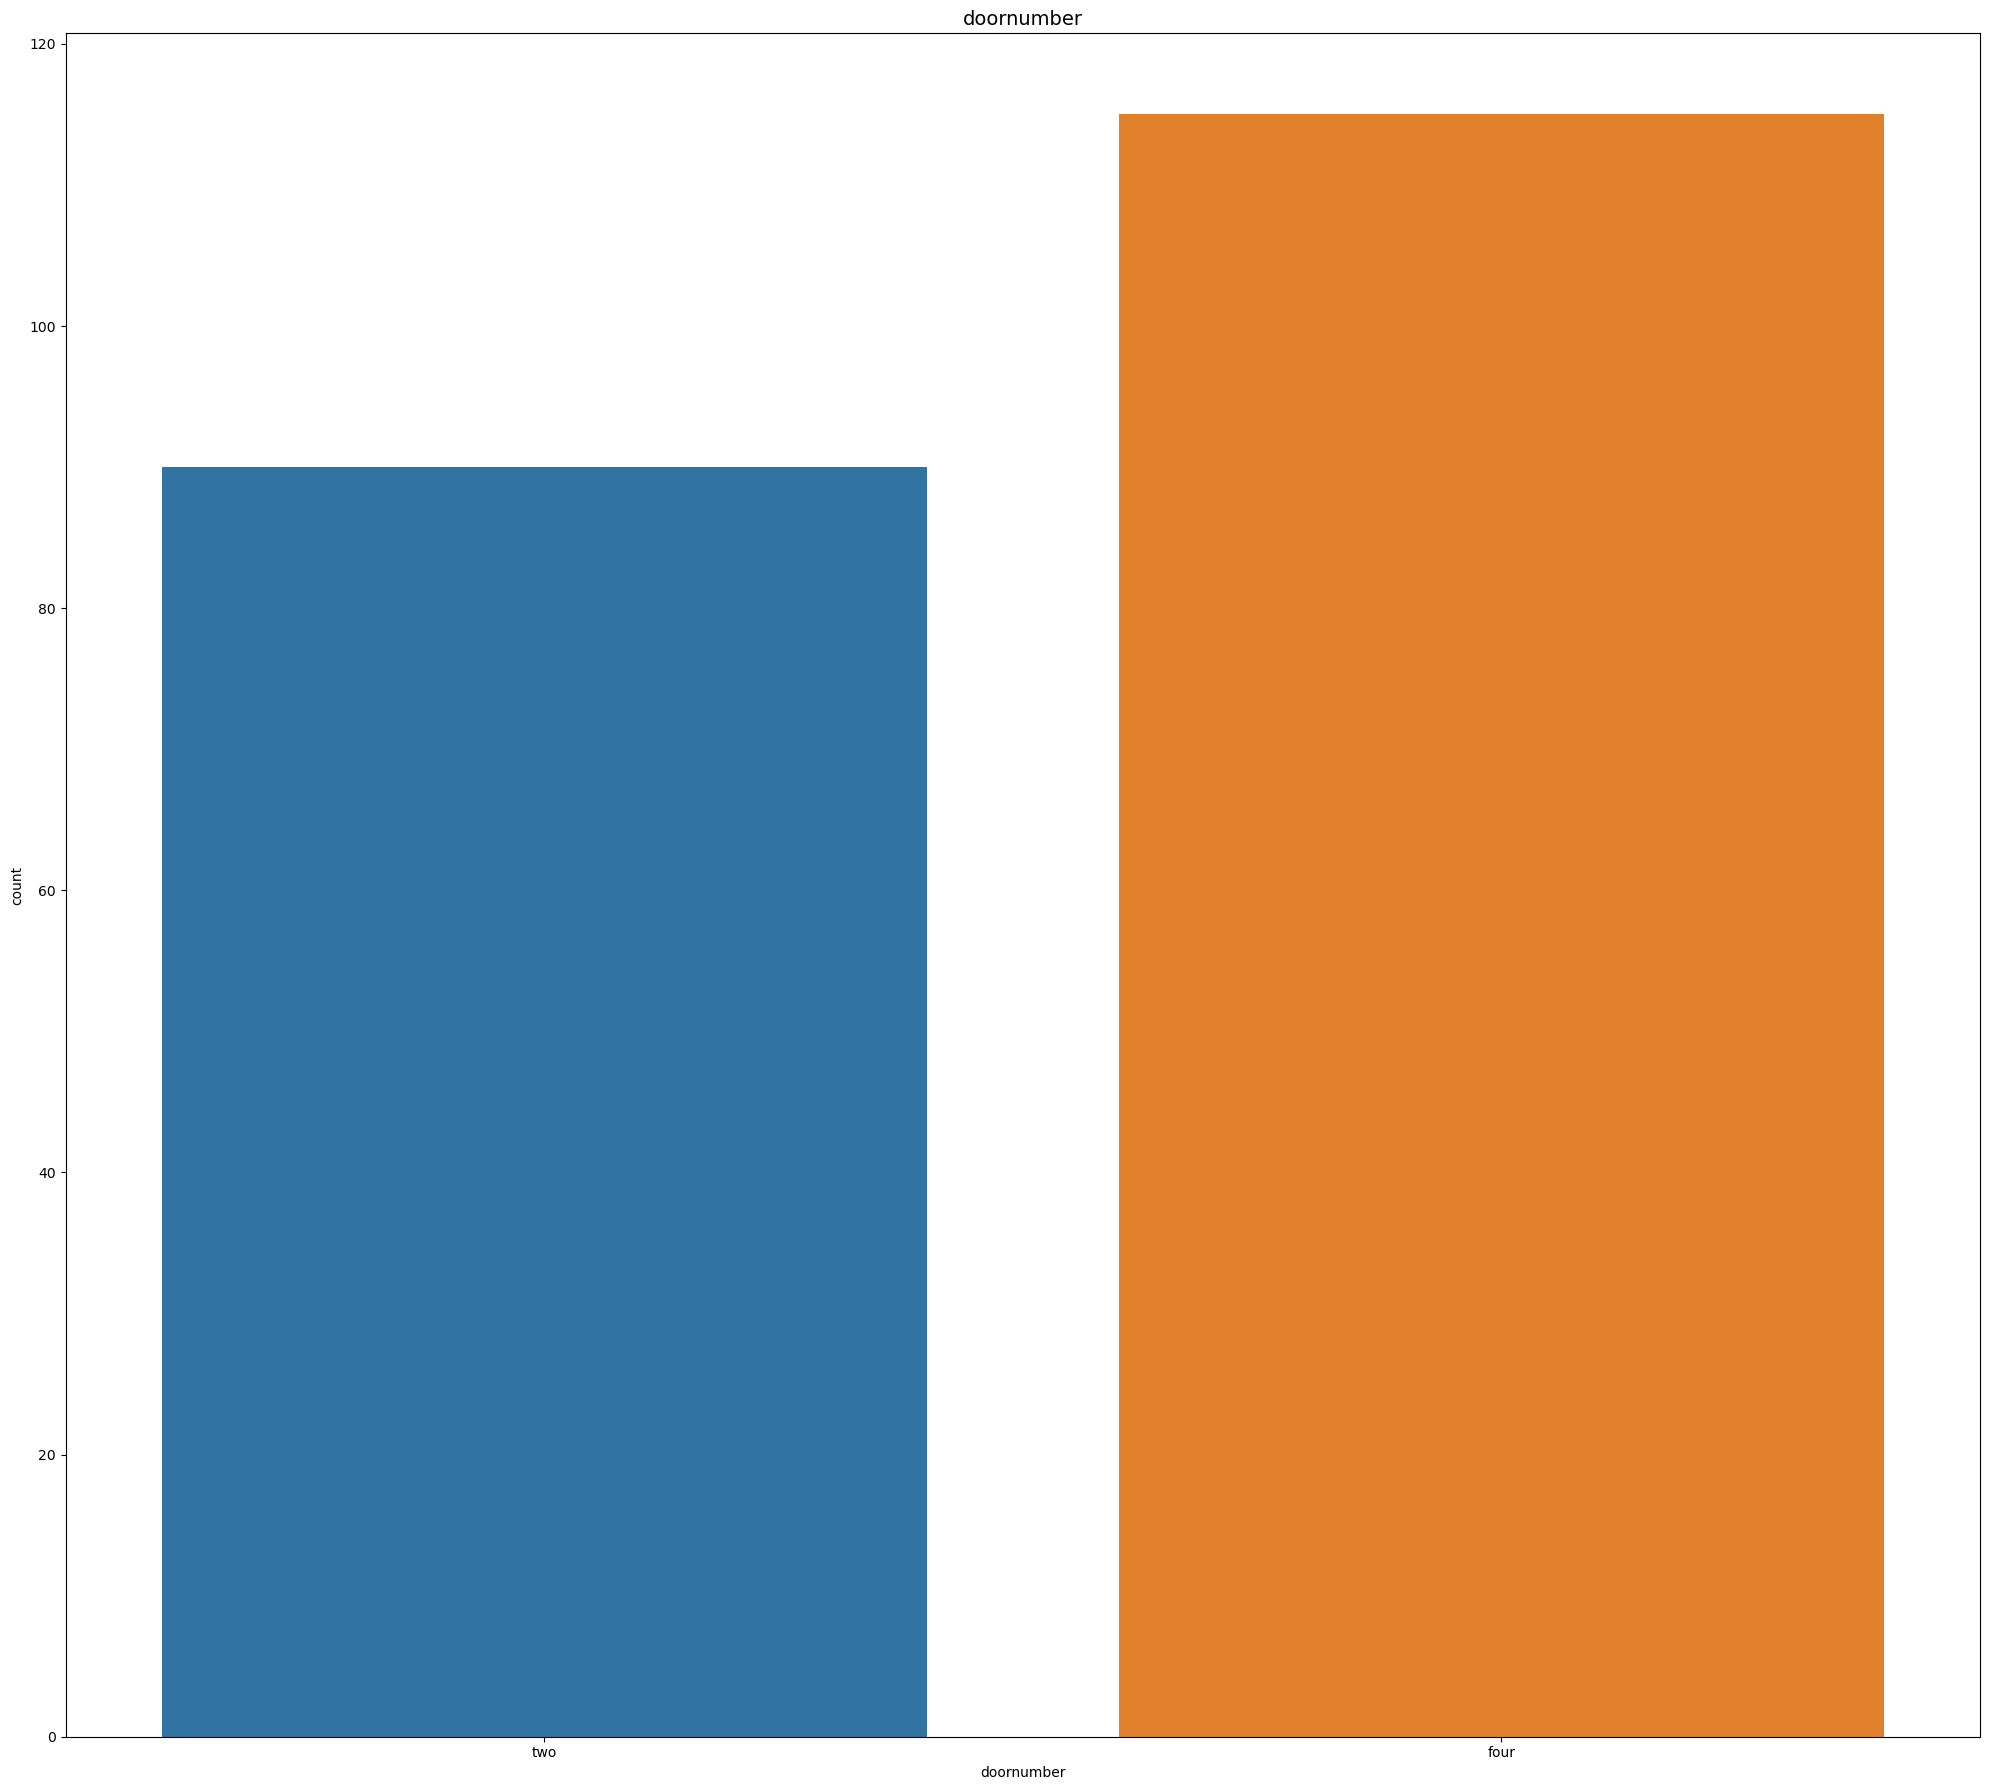

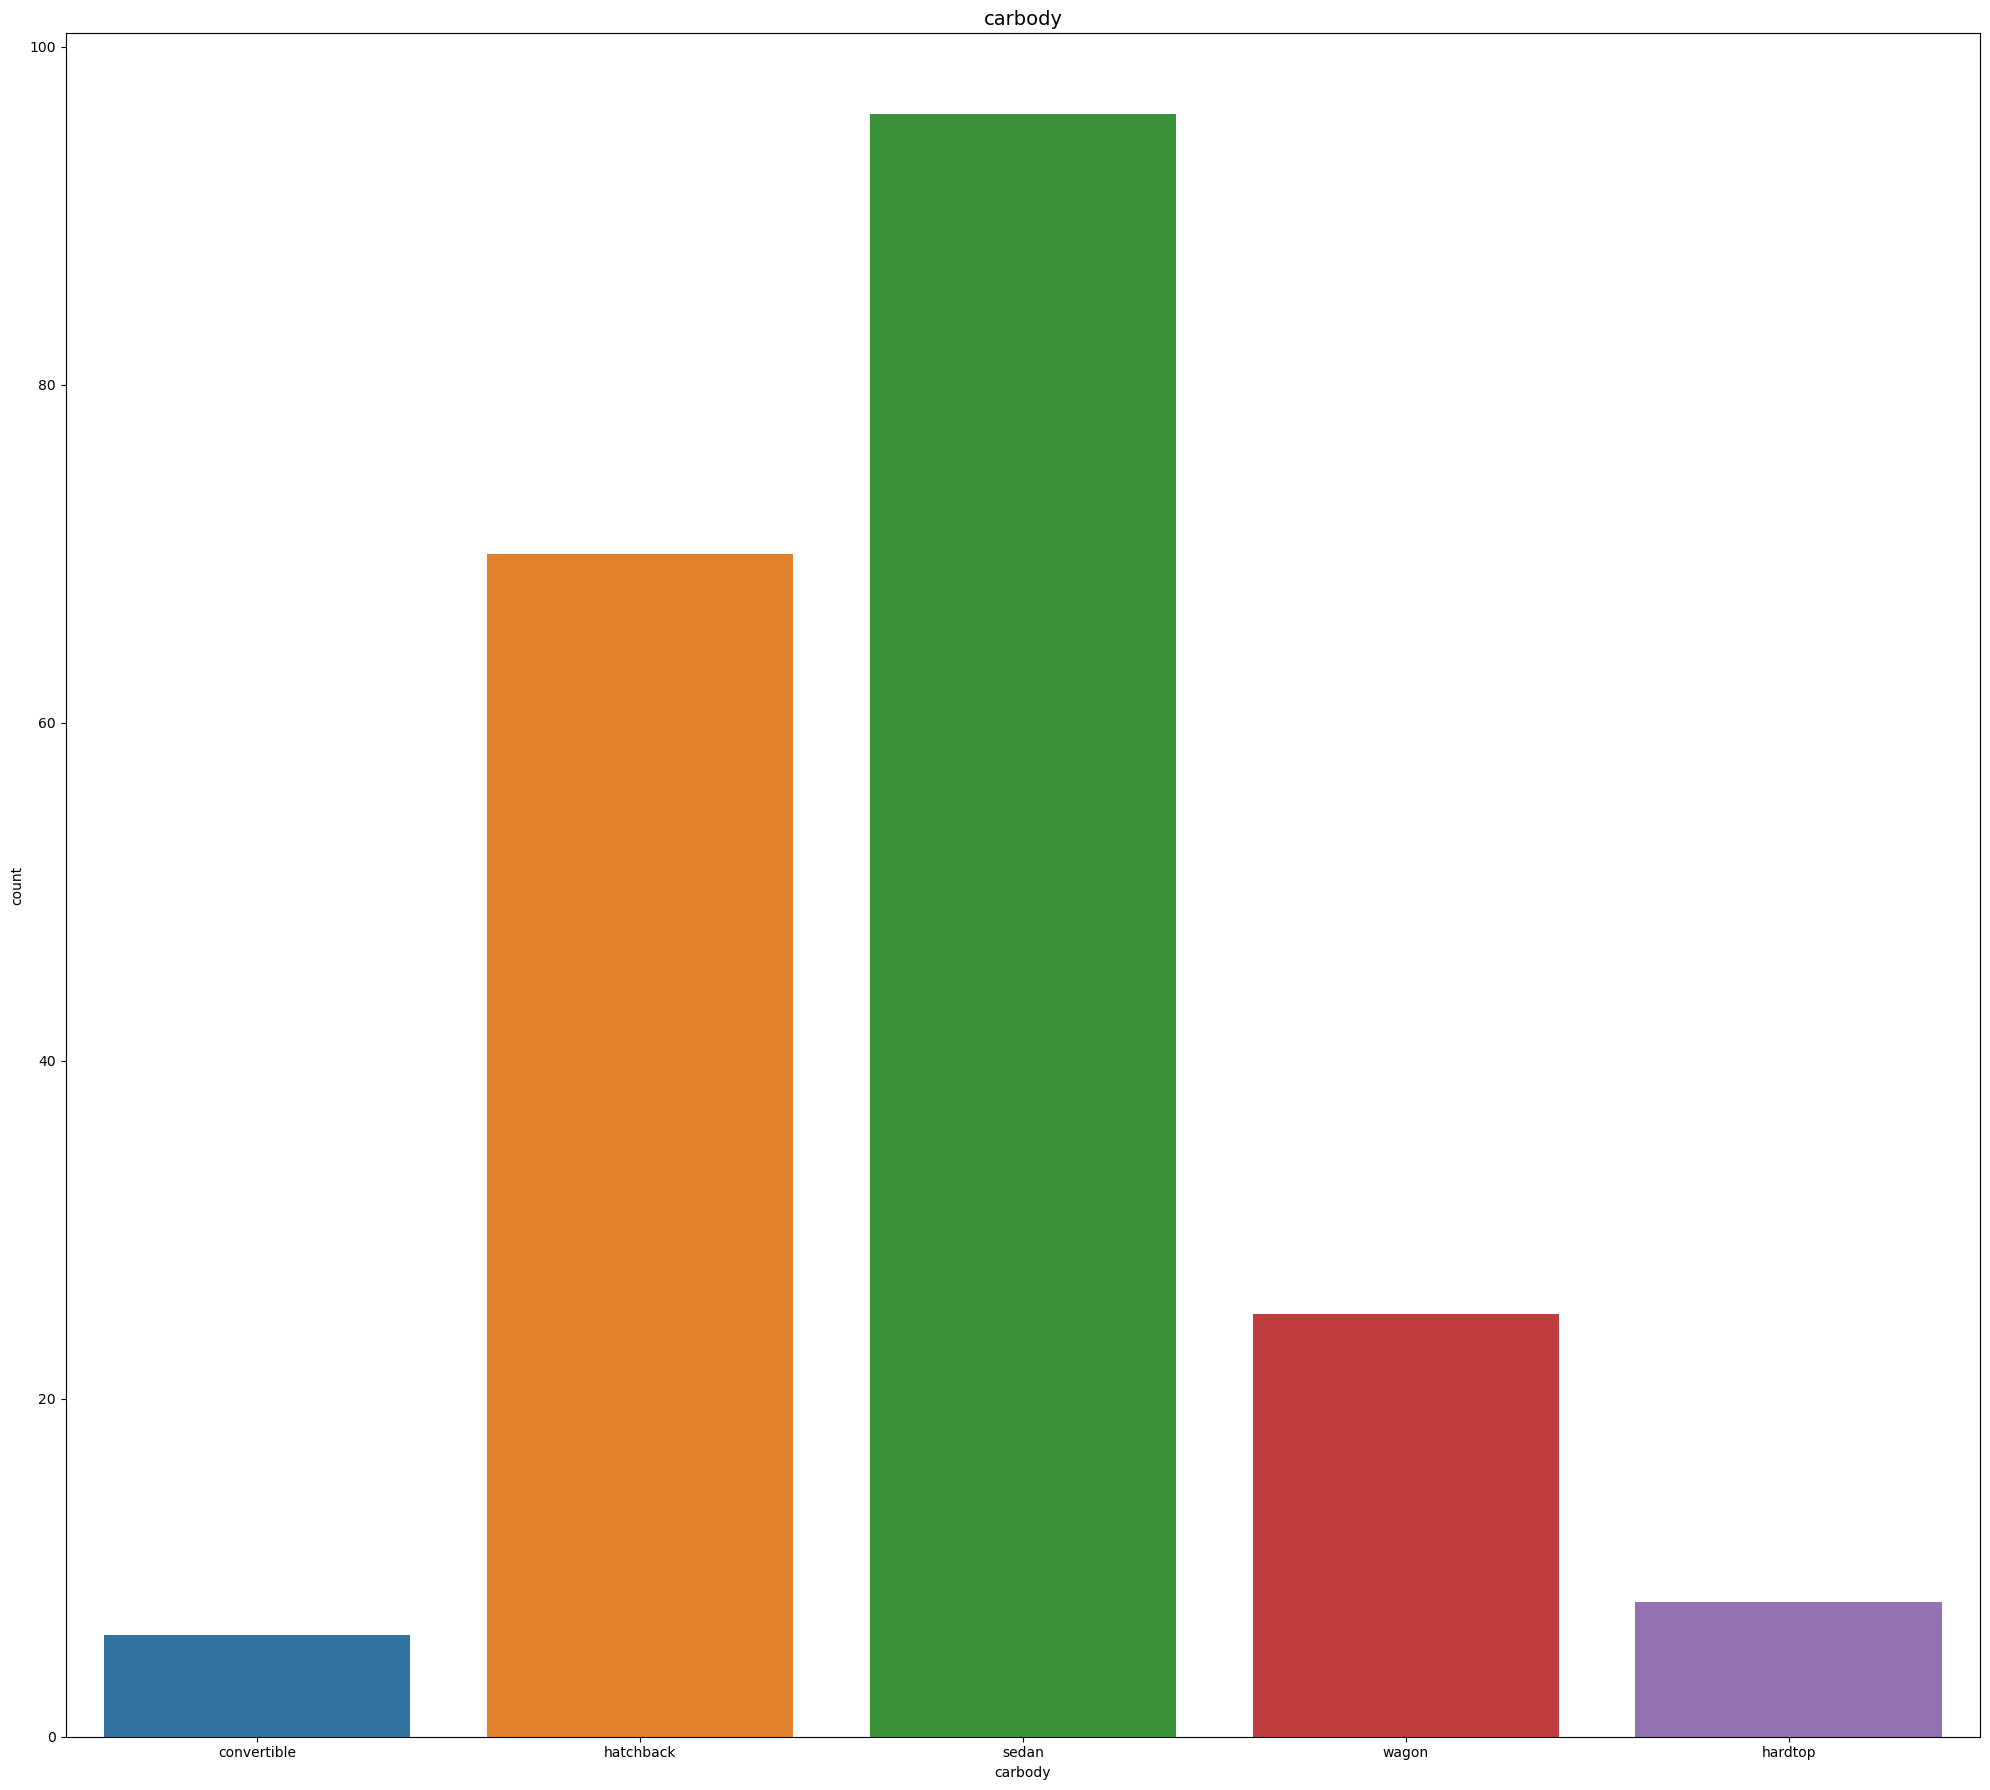

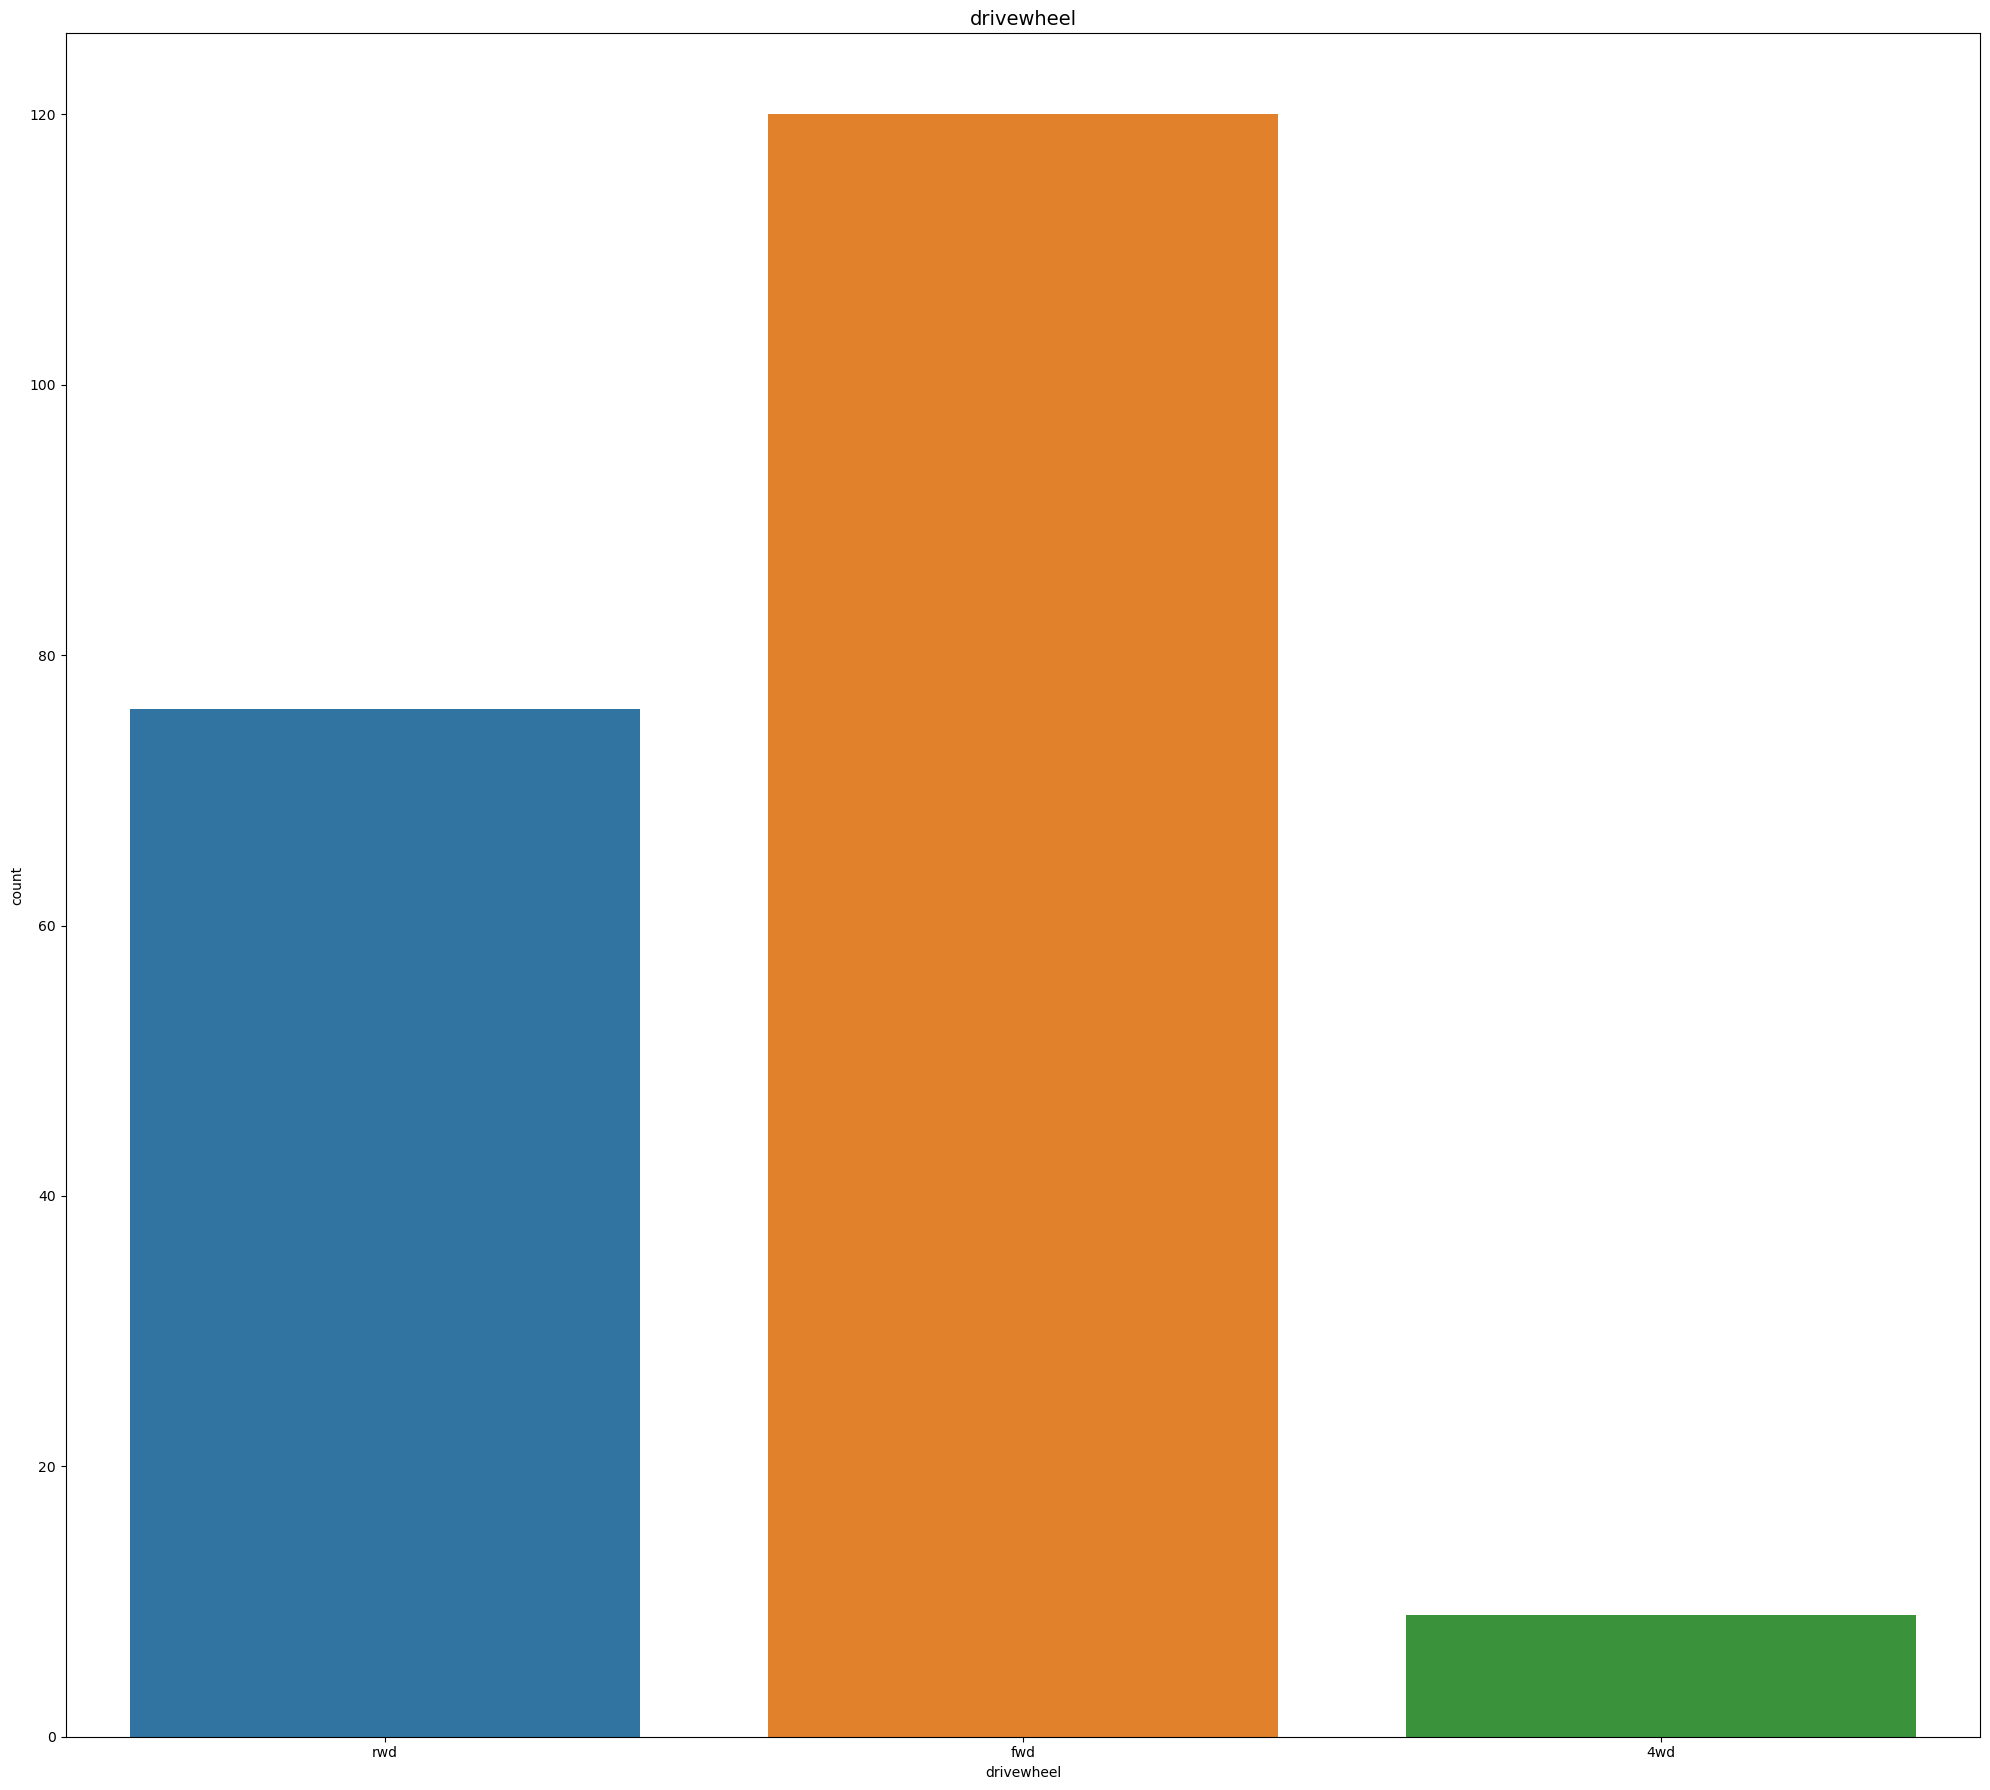

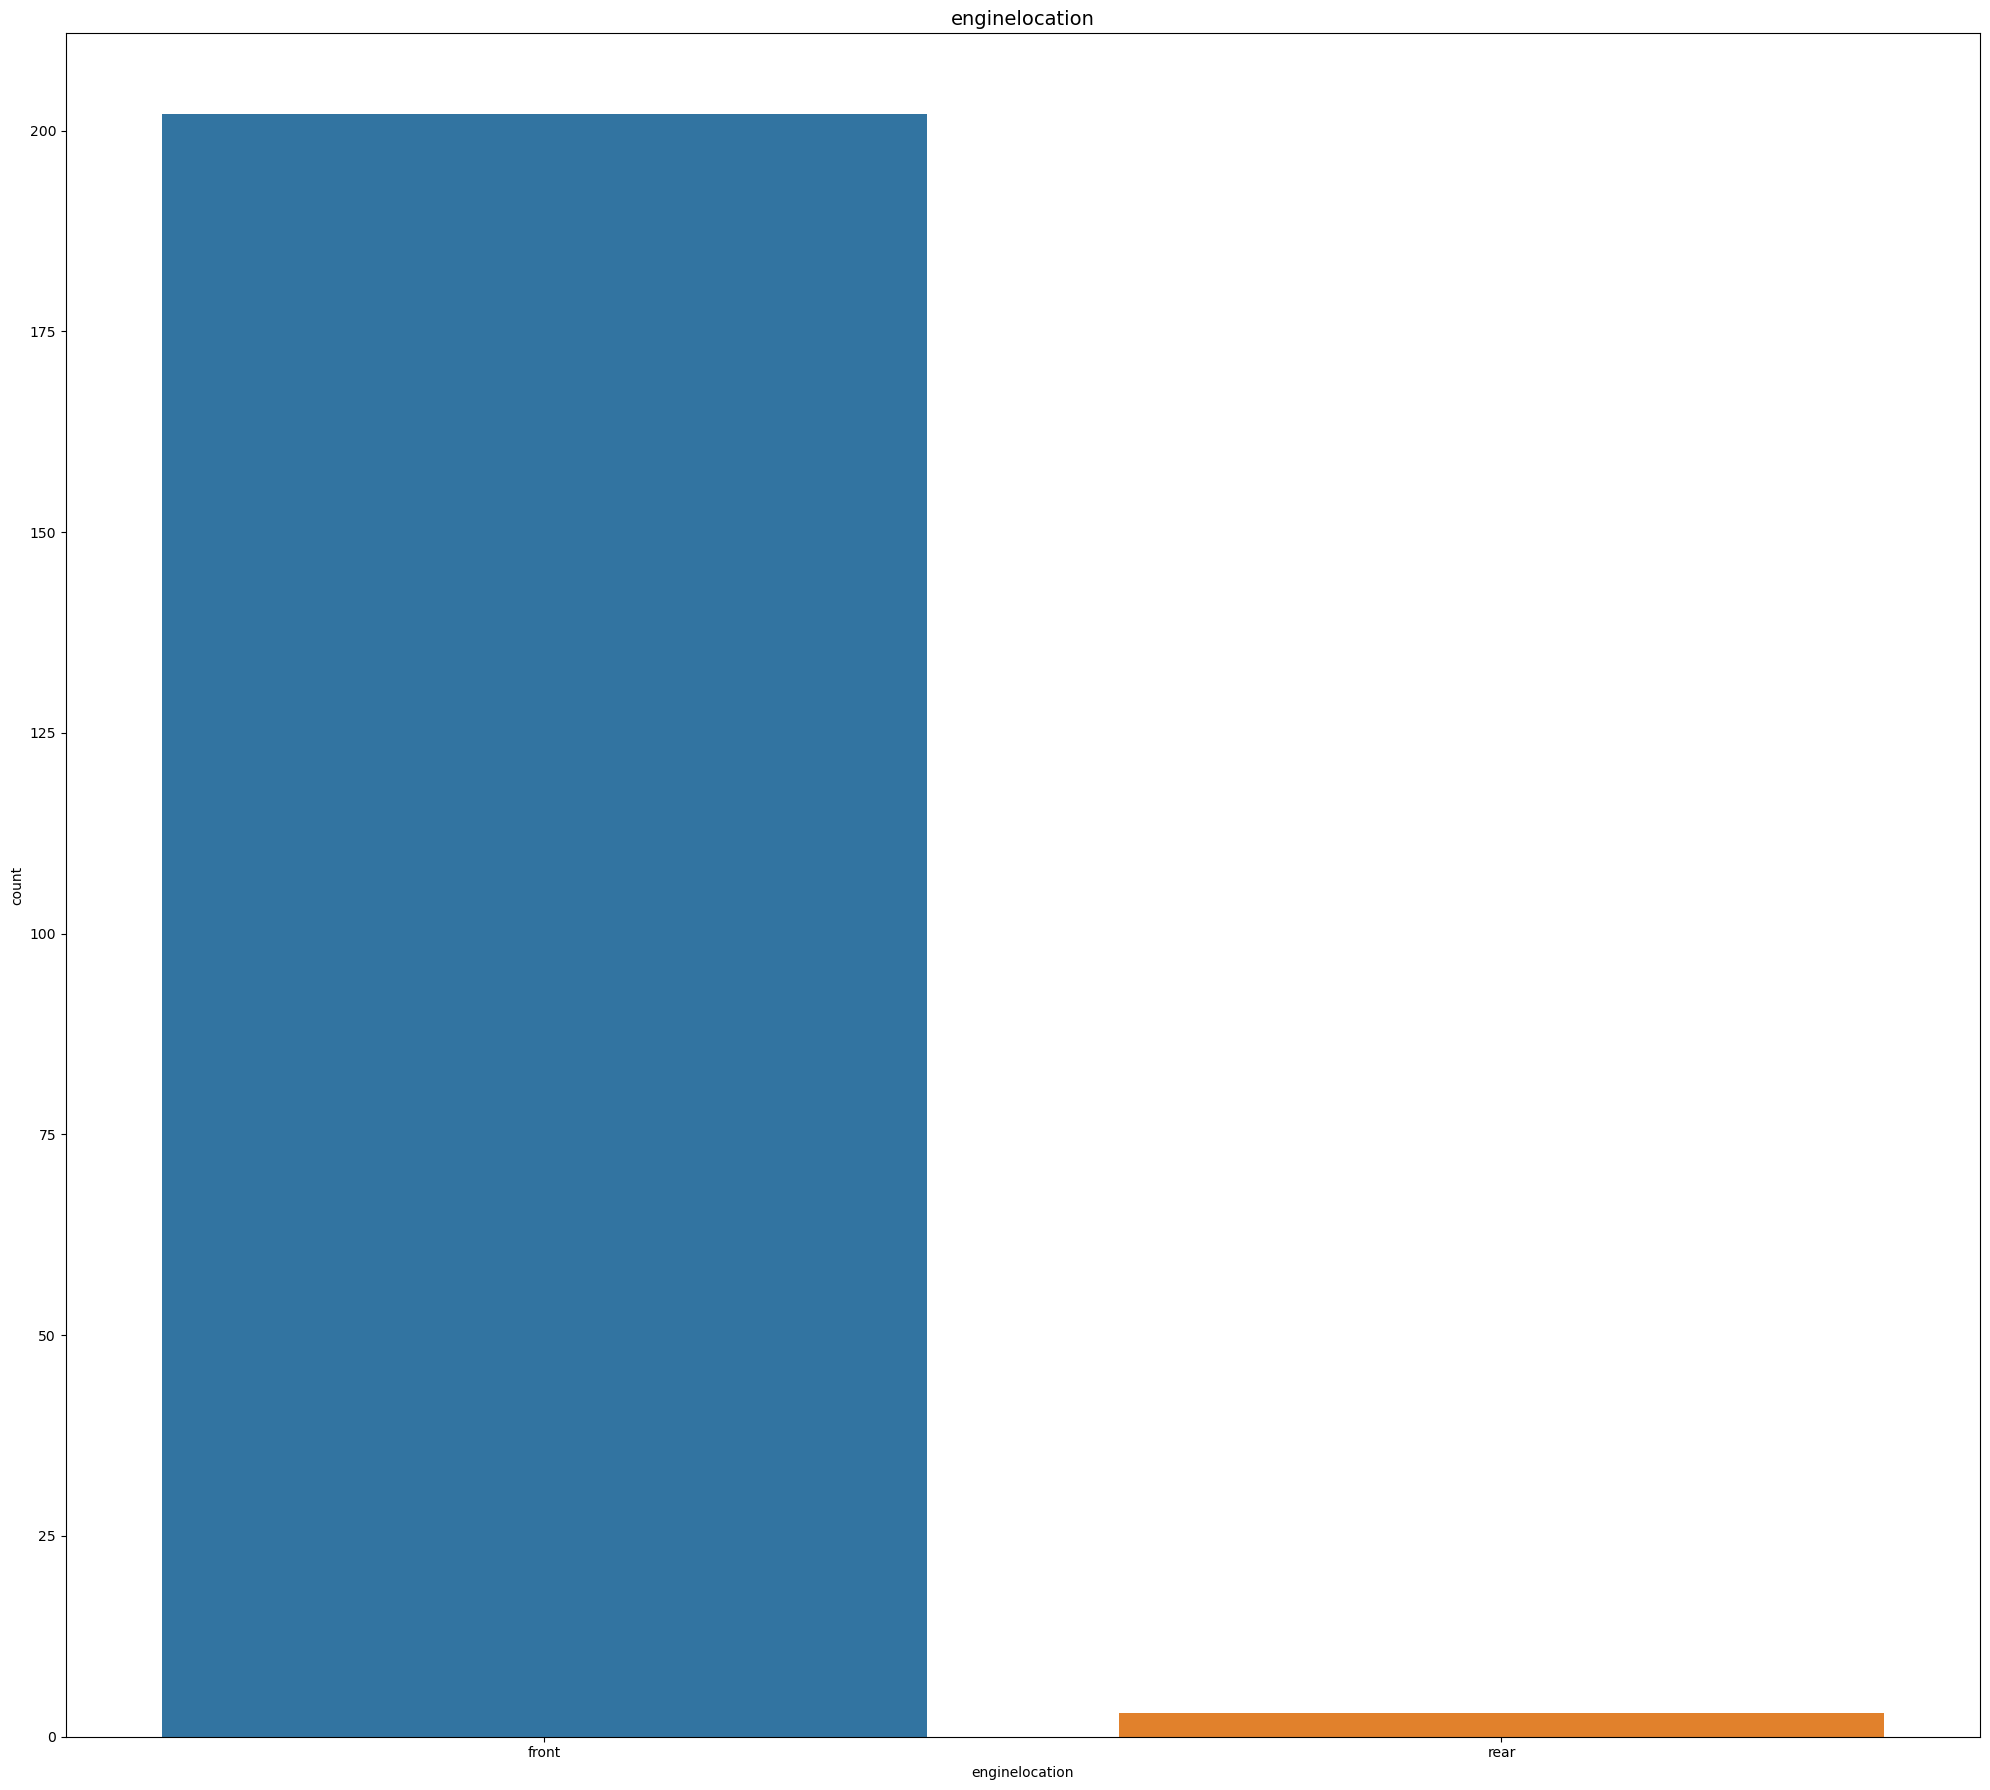

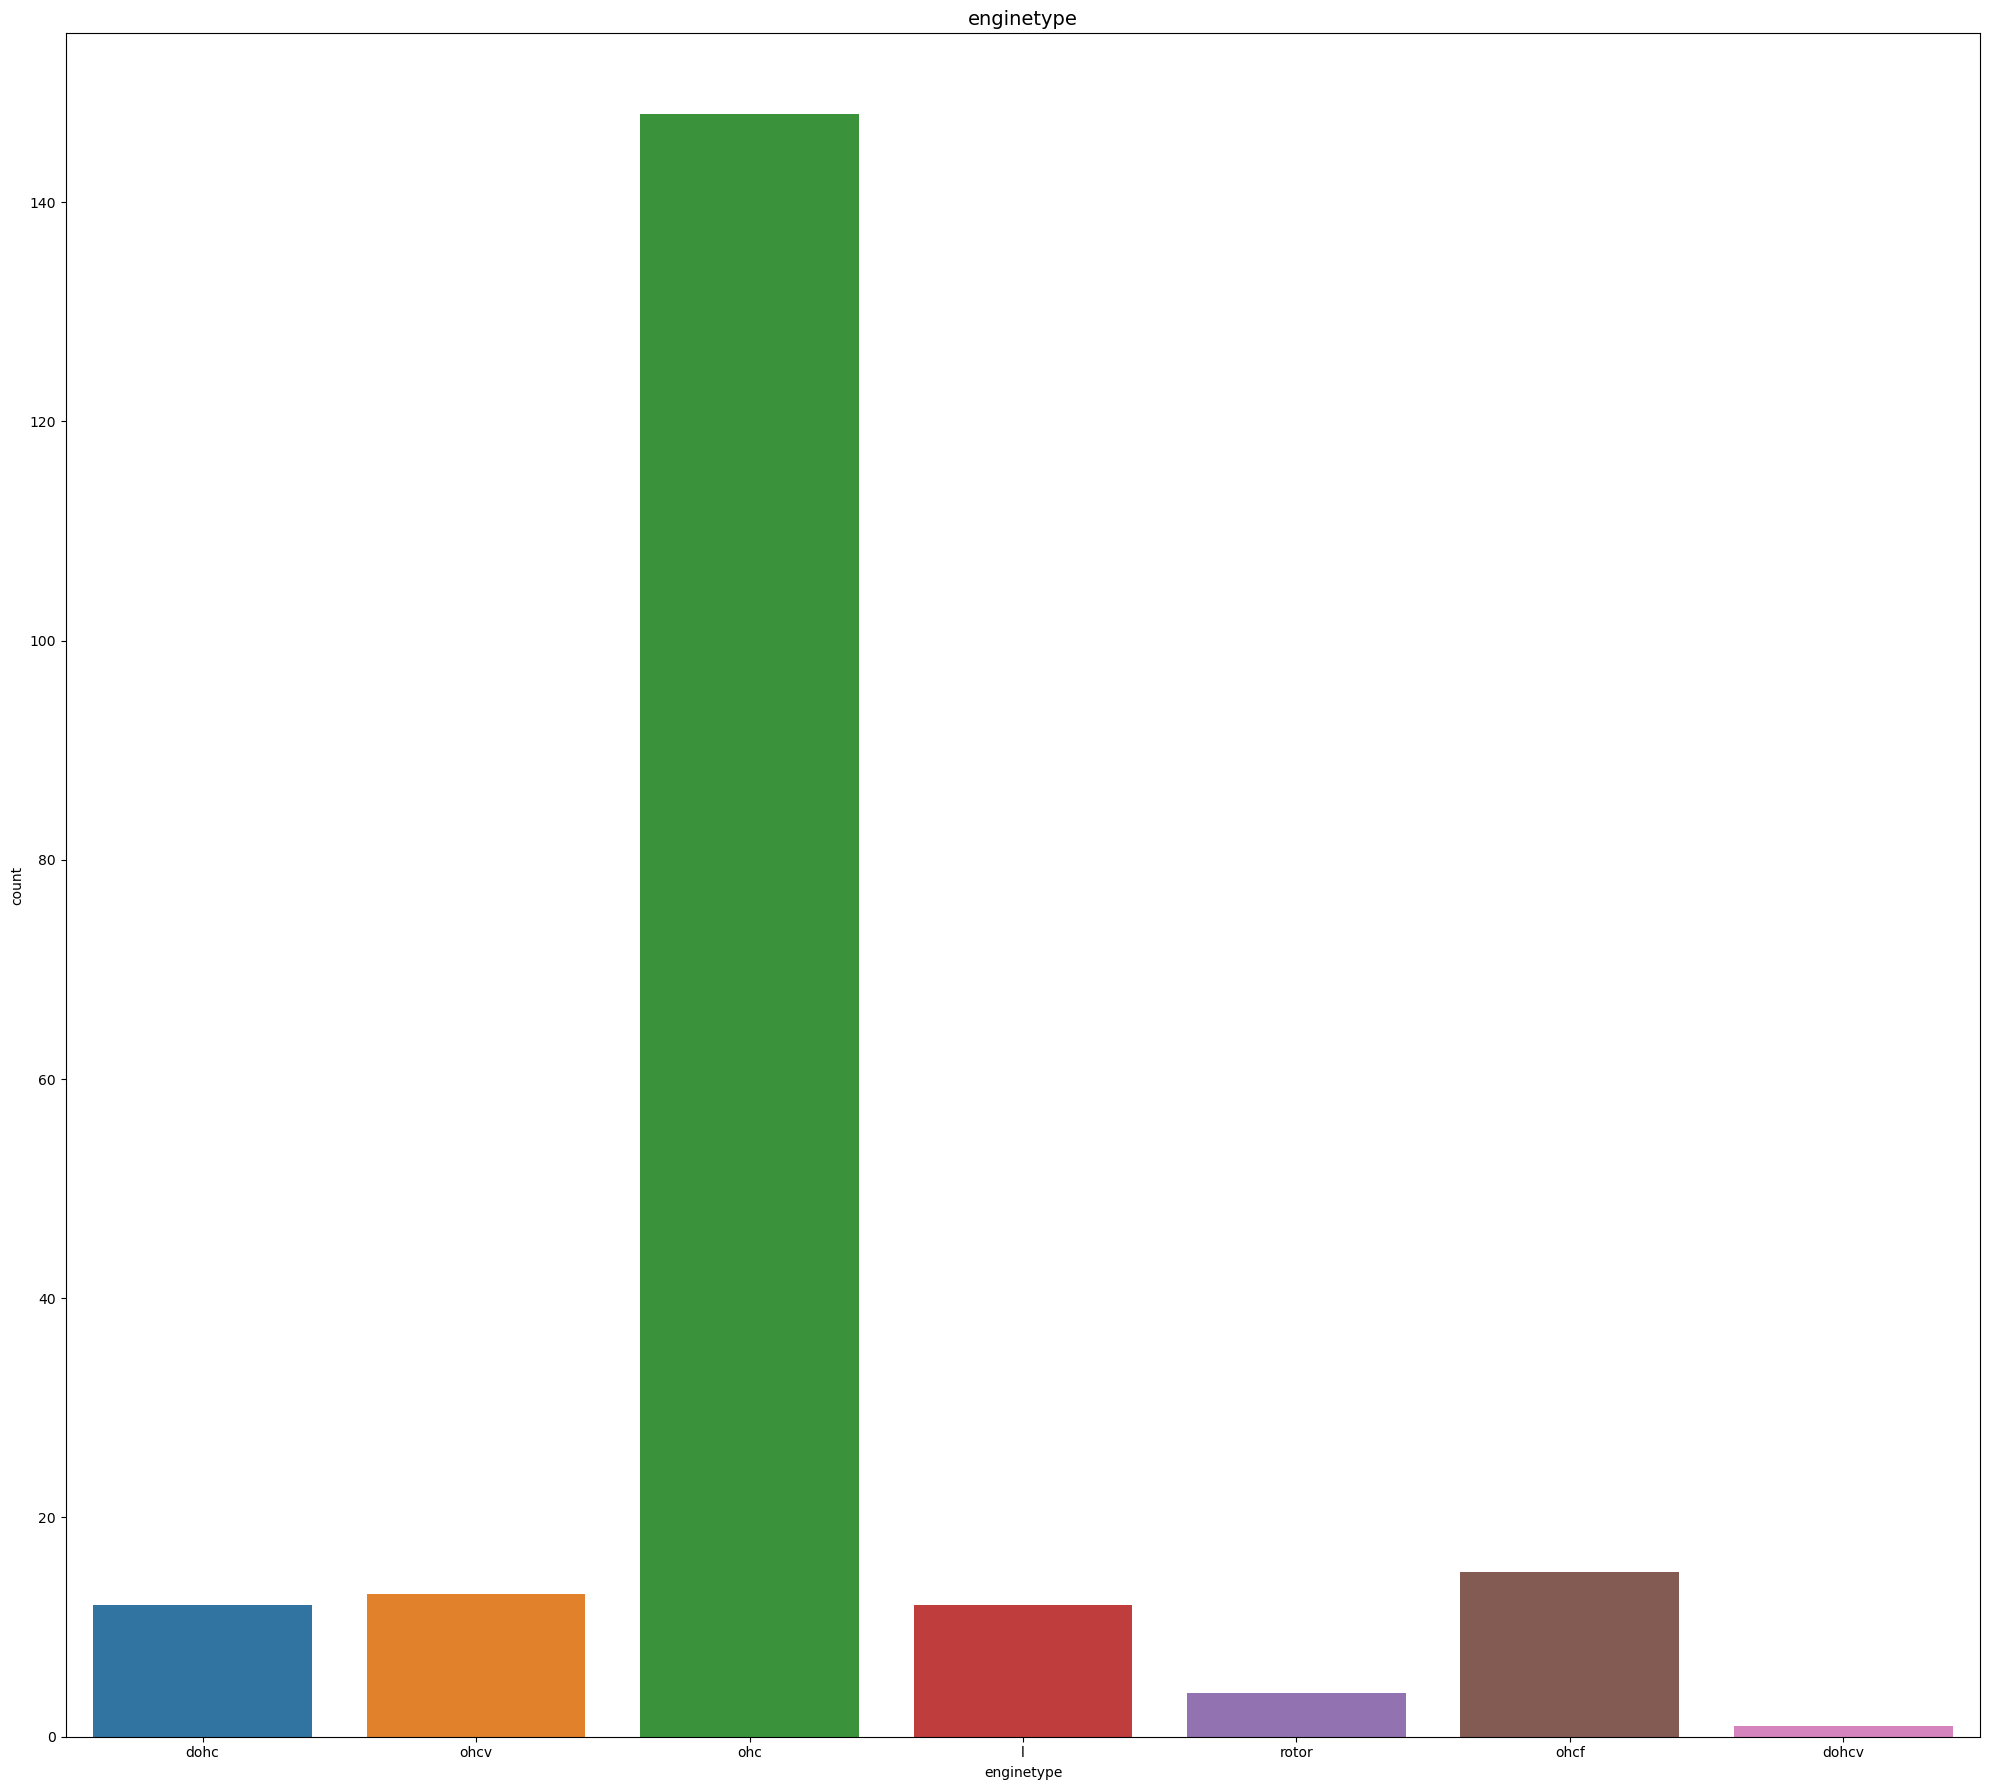

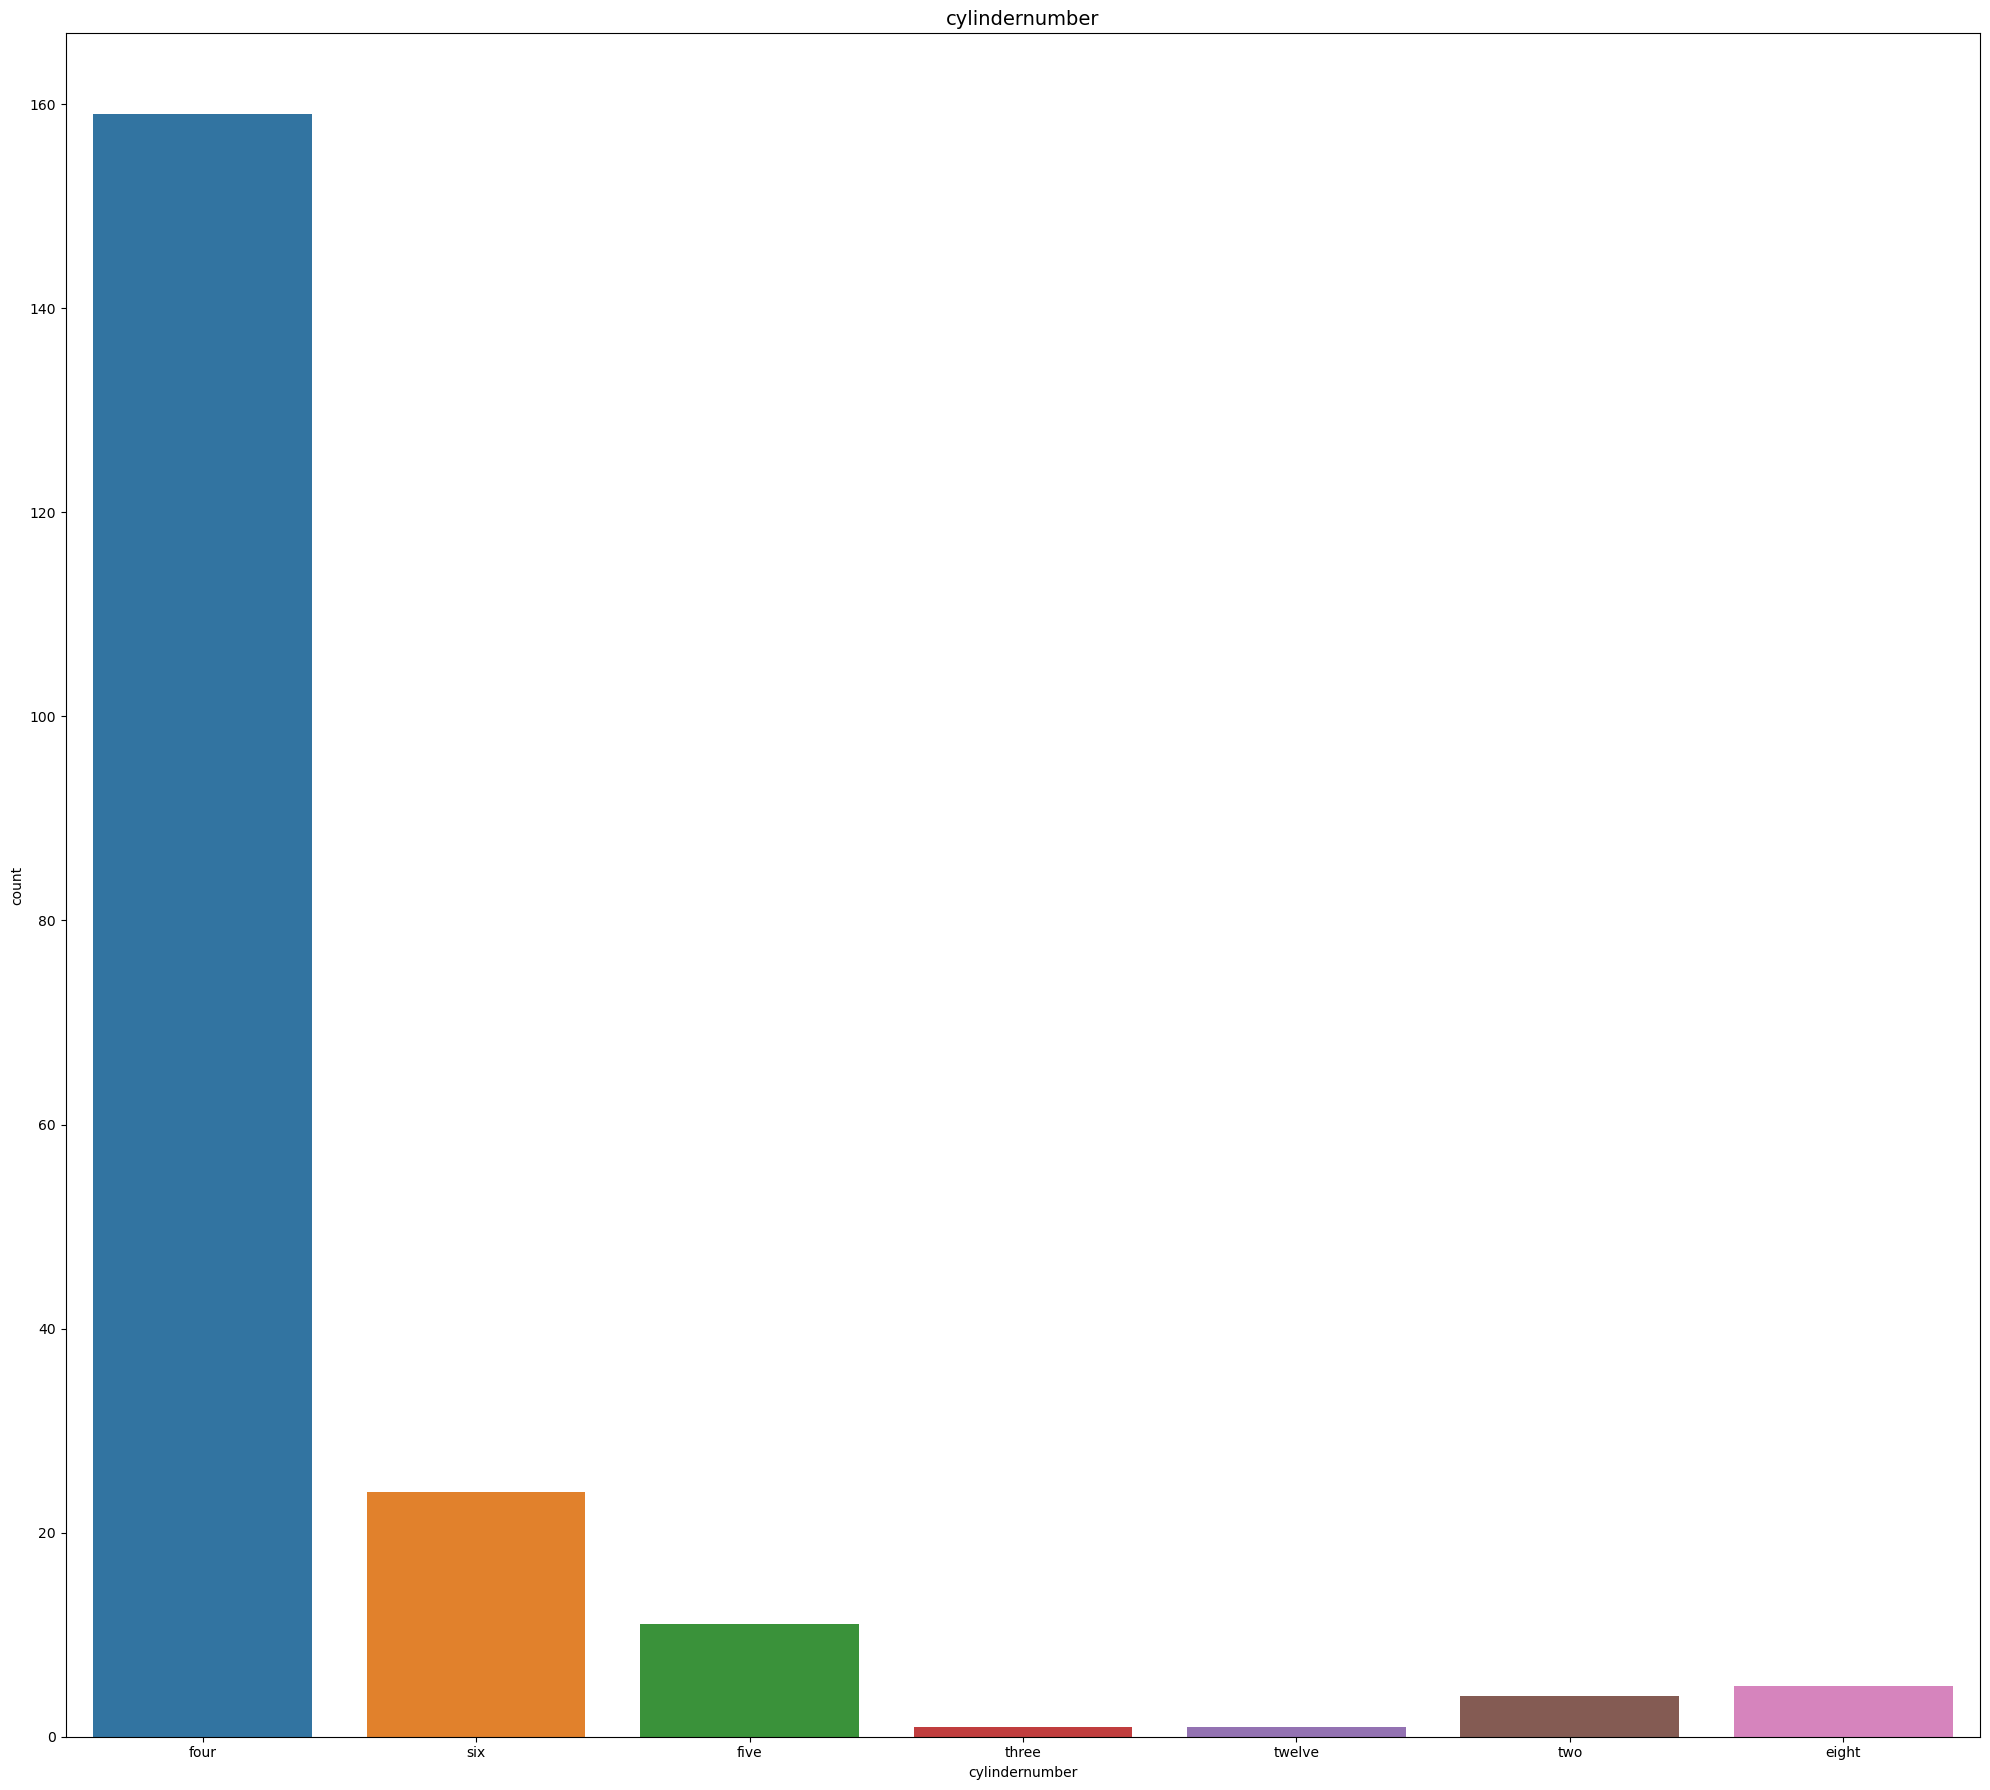

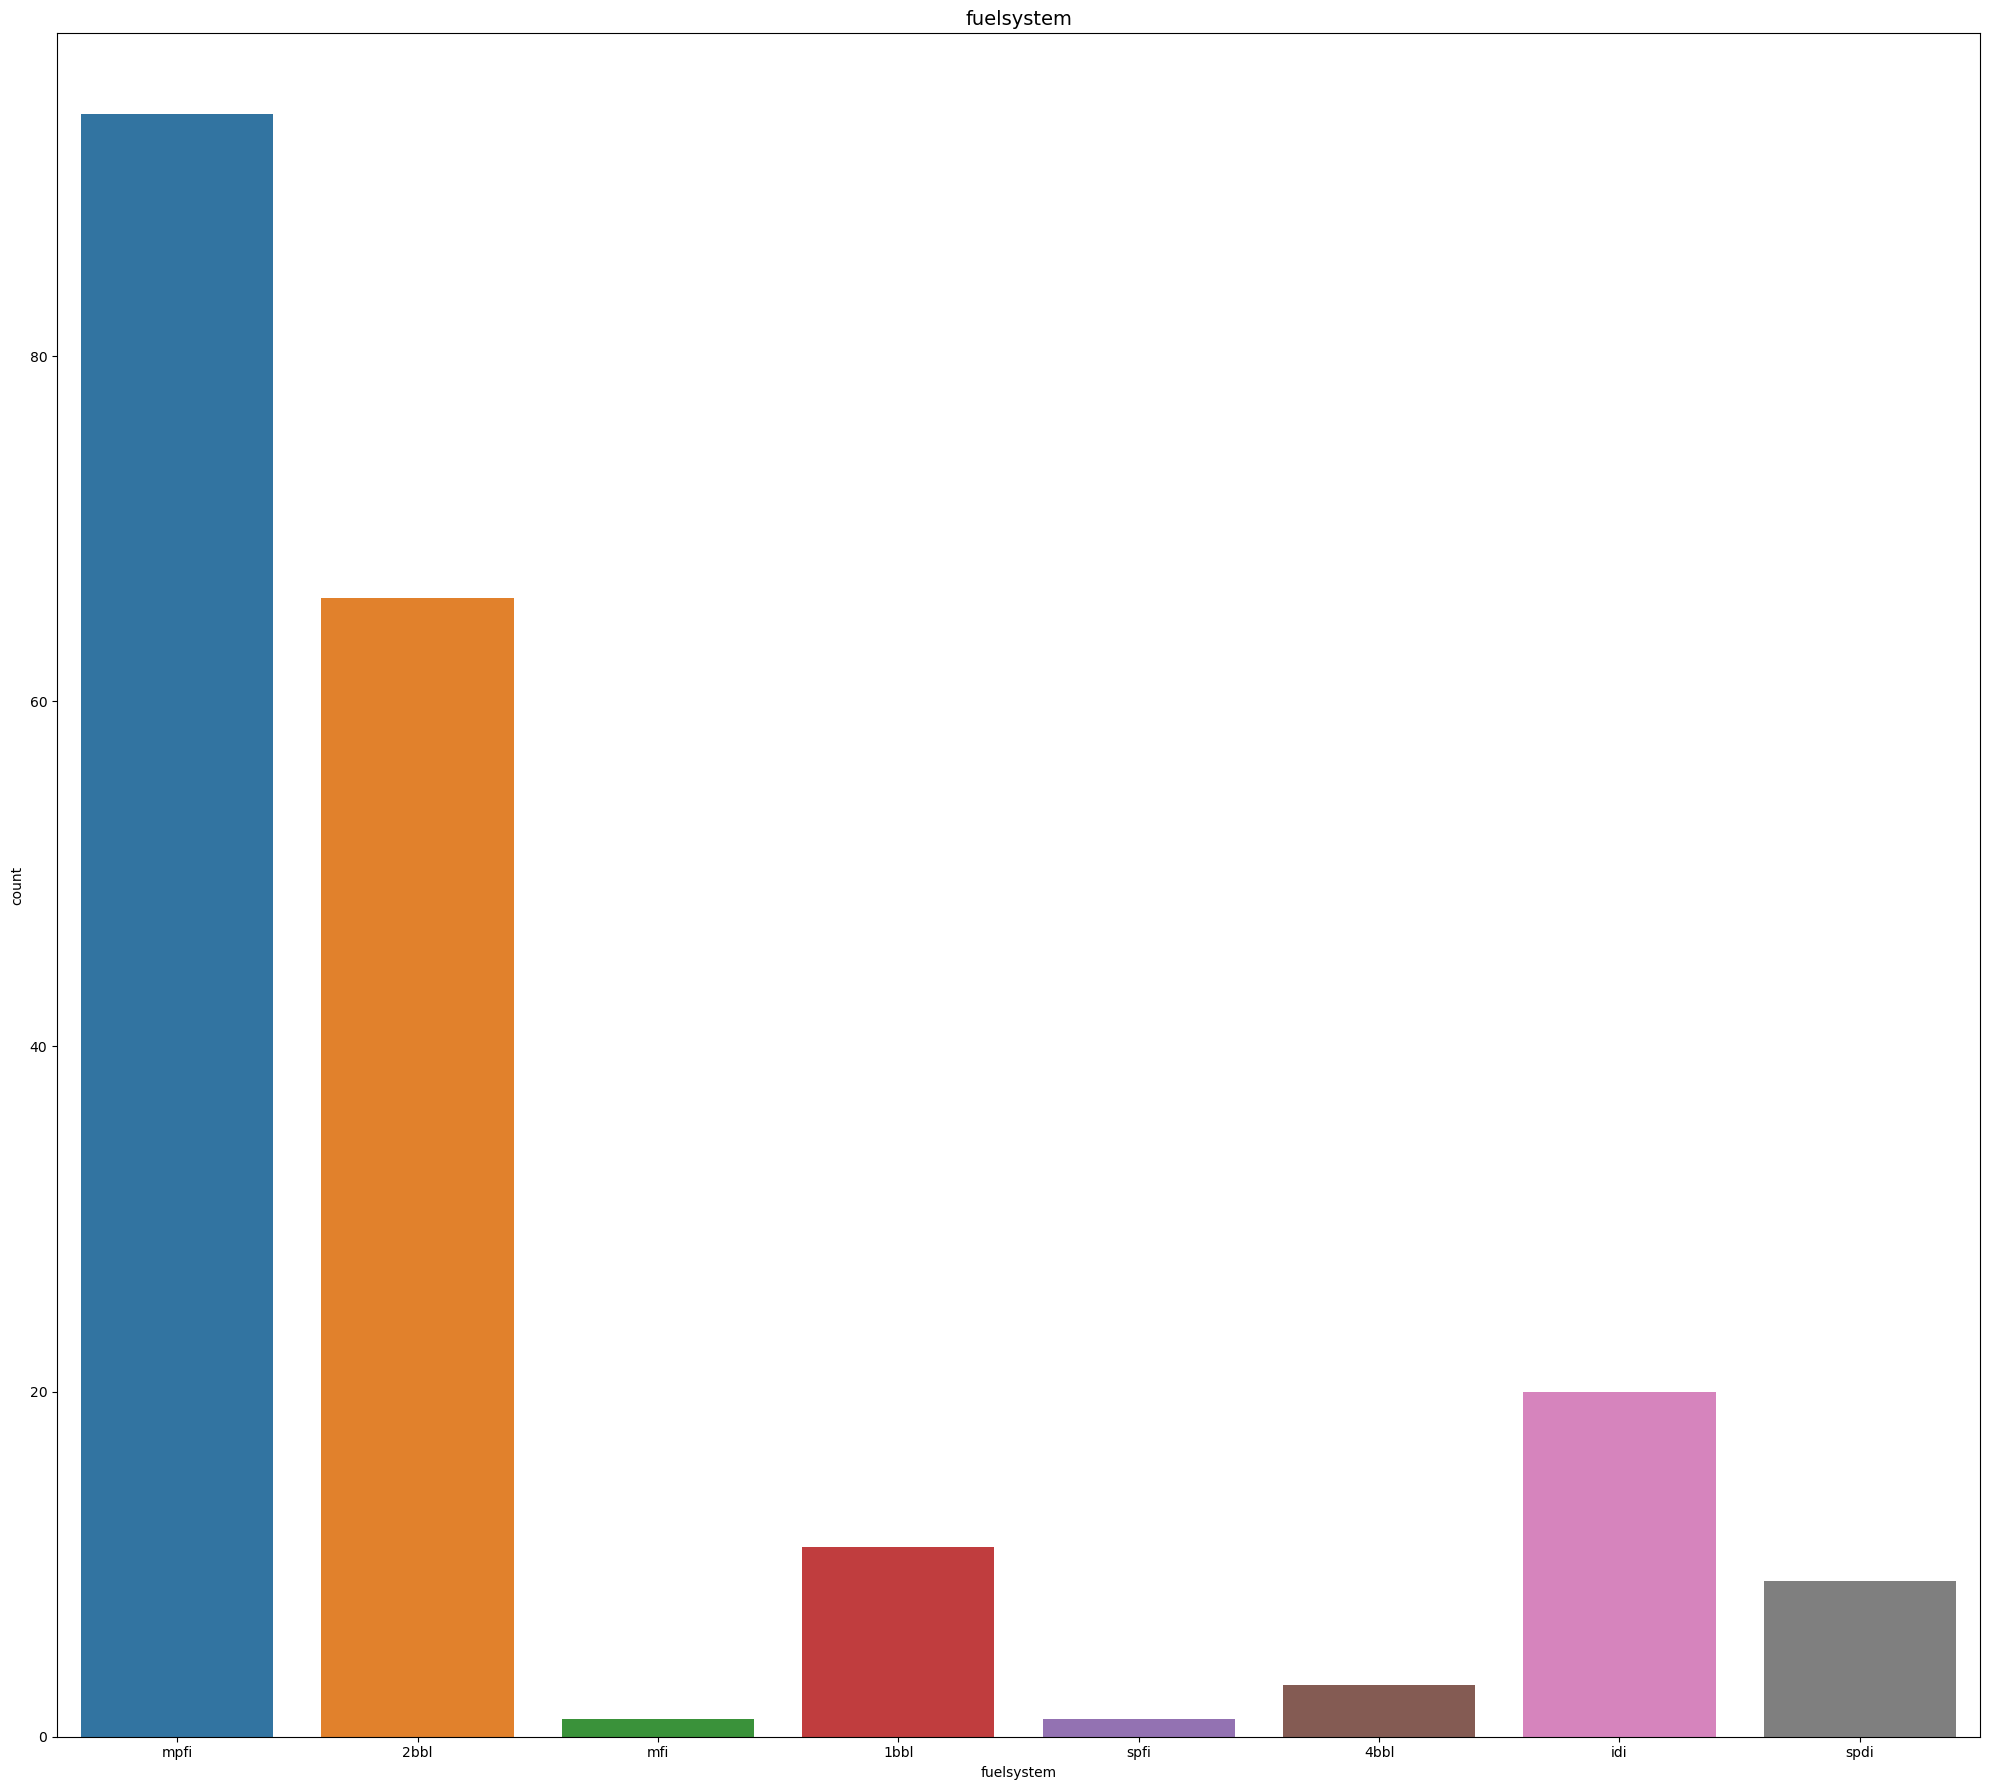

In [18]:
for feature in cat_cols:
    plt.figure(figsize=(20,18))
    plt.title(feature, fontsize=14)
    sns.countplot(data=df, x= df[feature])
    plt.tight_layout()
    plt.show()

Reduce Car's name value

## Numerical Columns Plotting

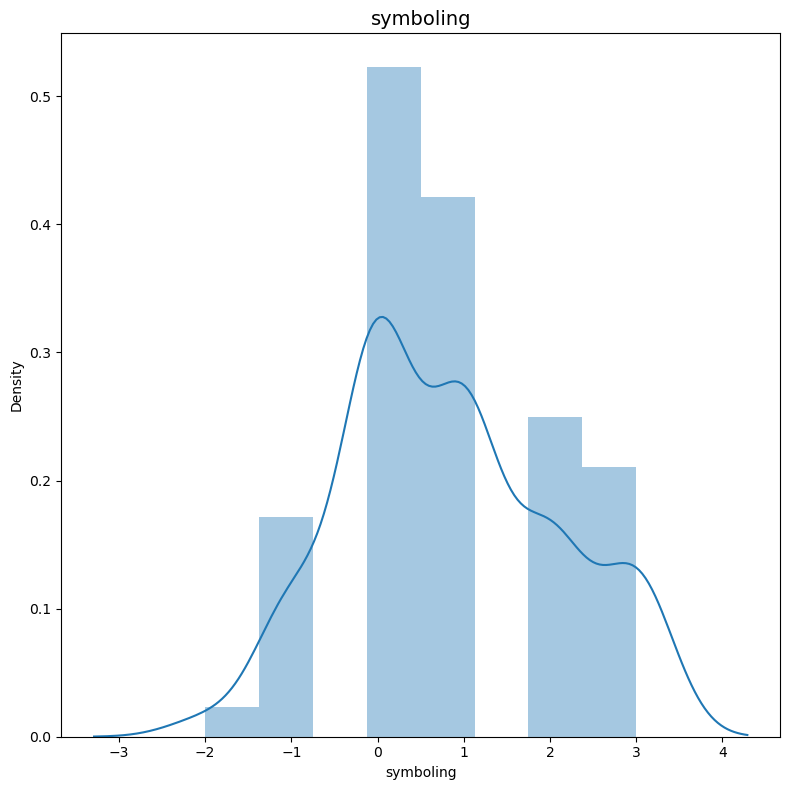

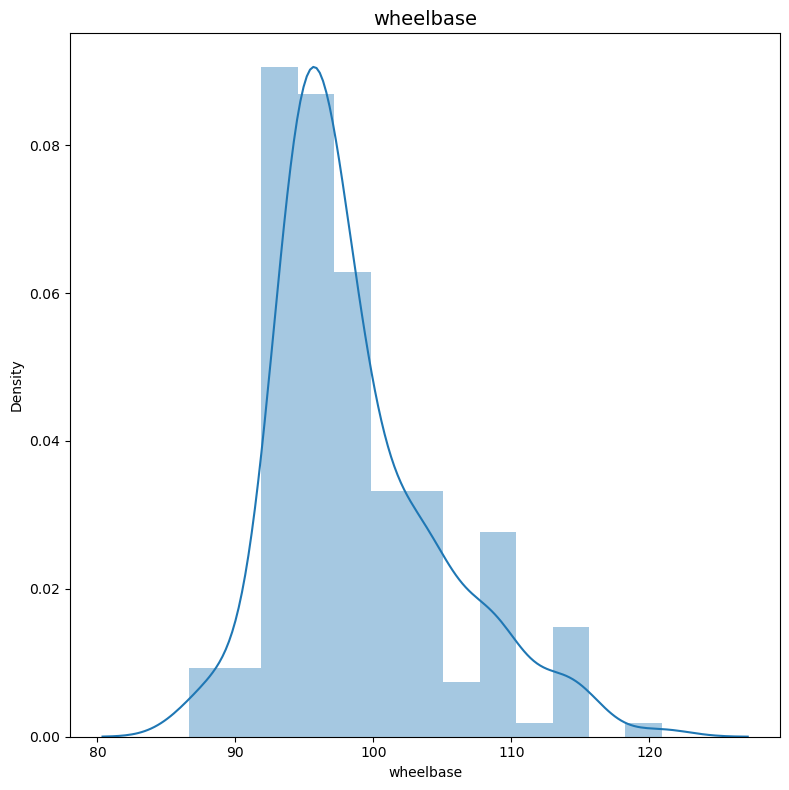

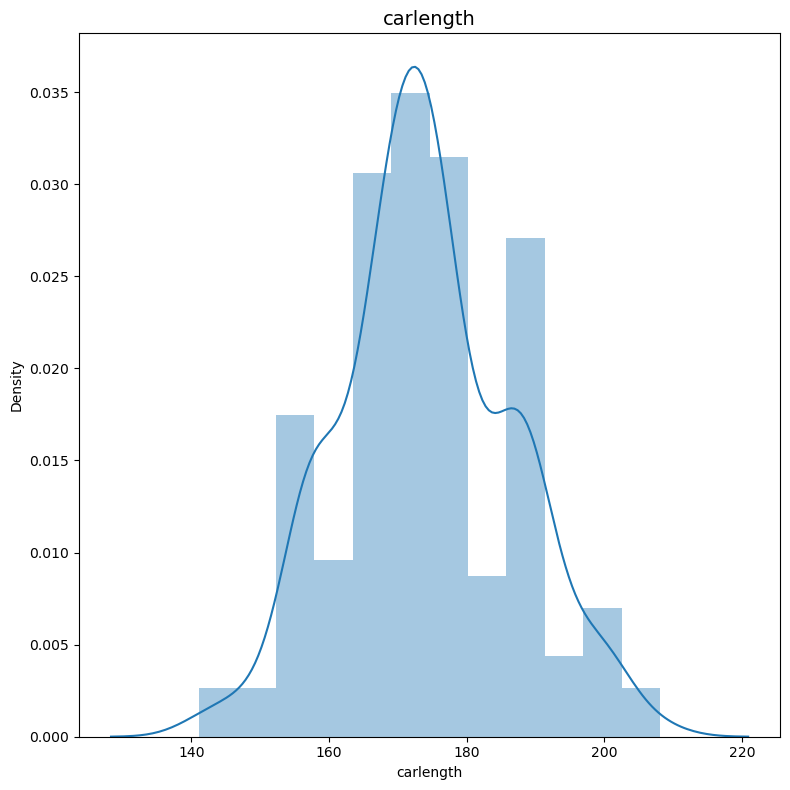

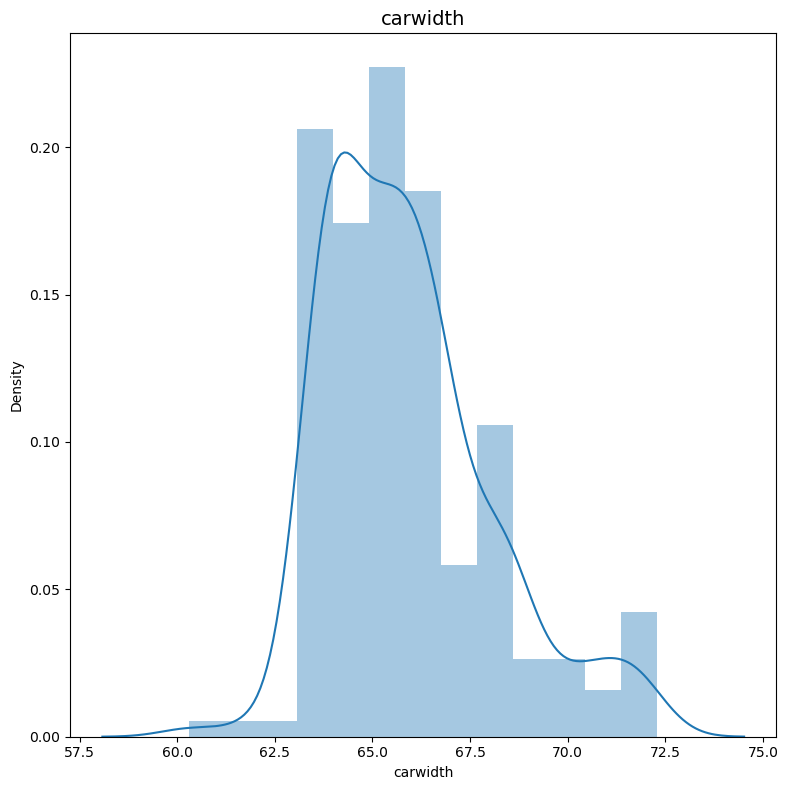

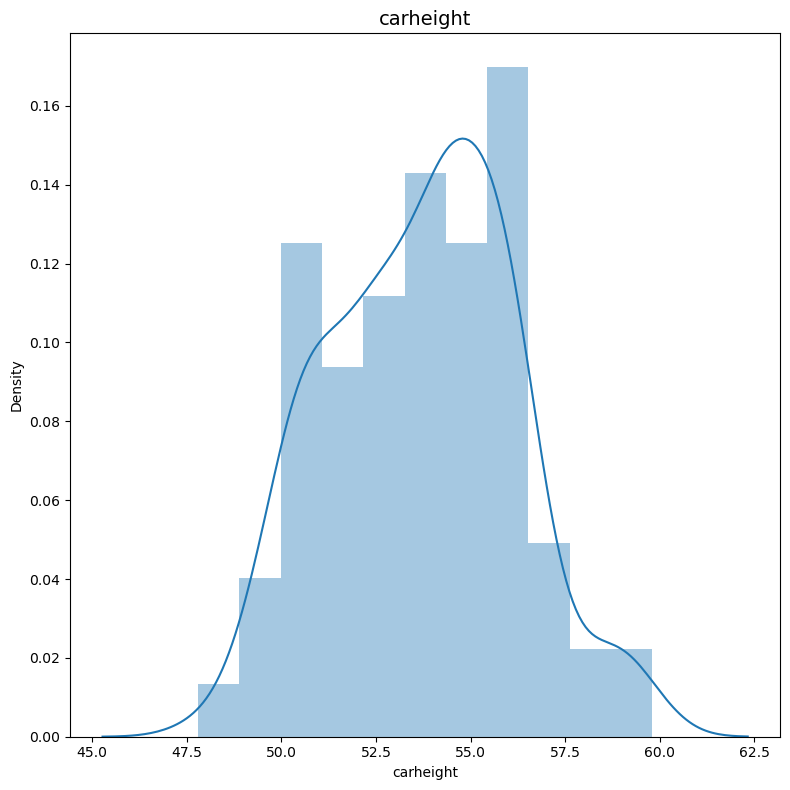

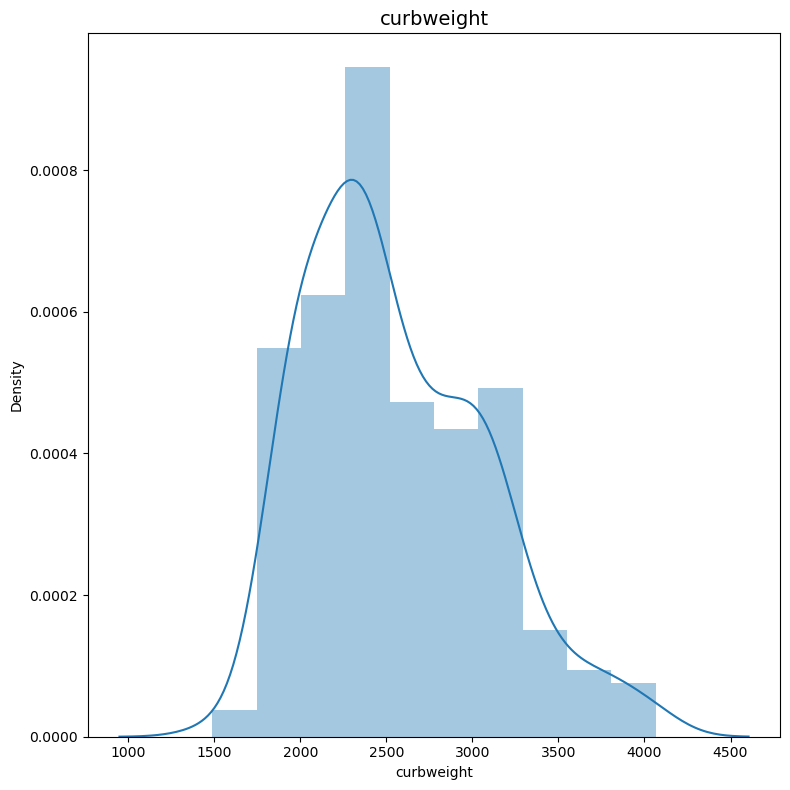

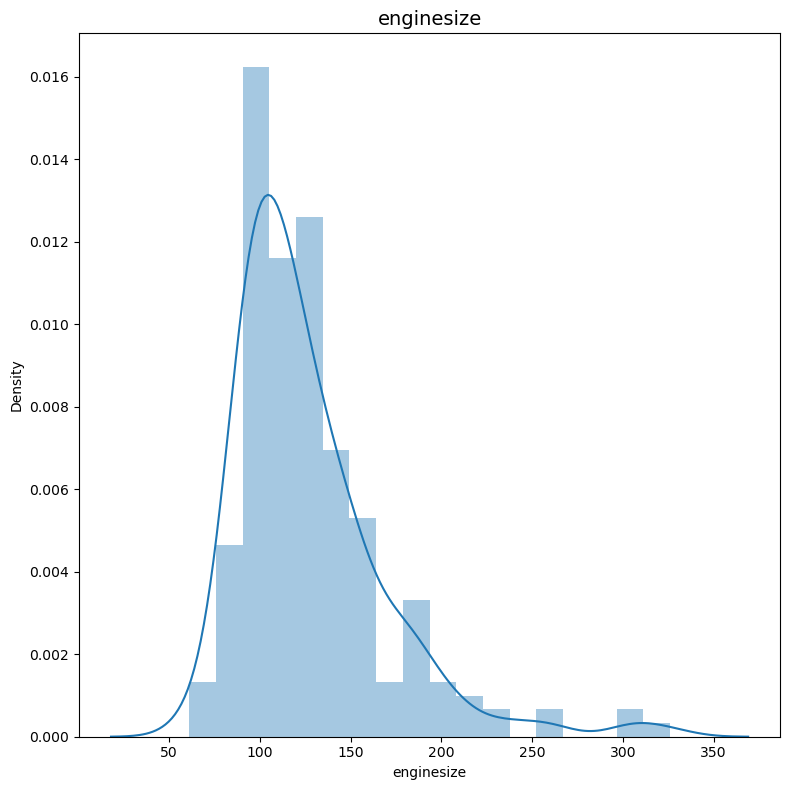

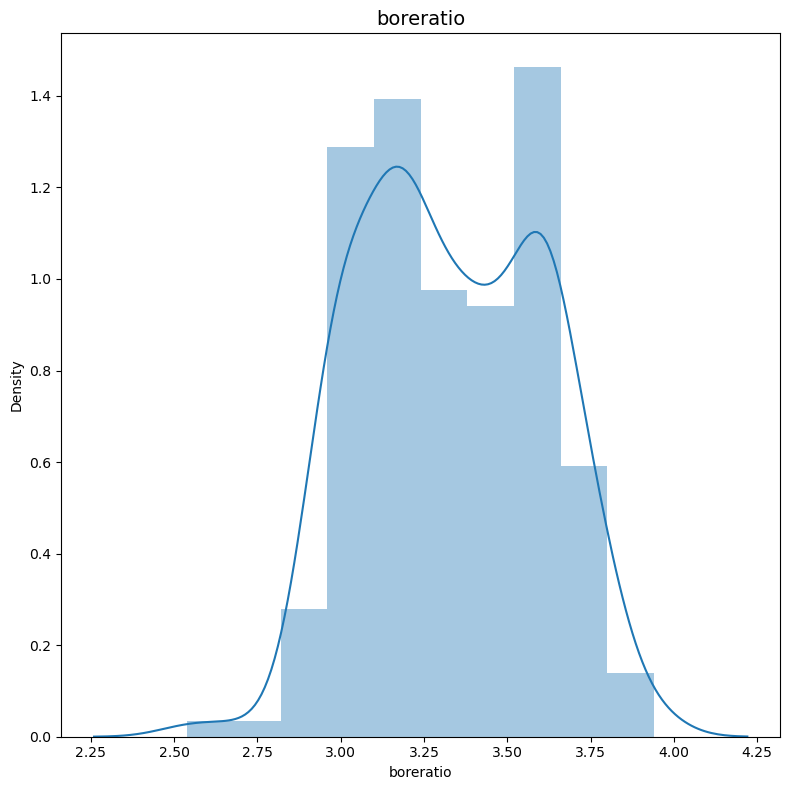

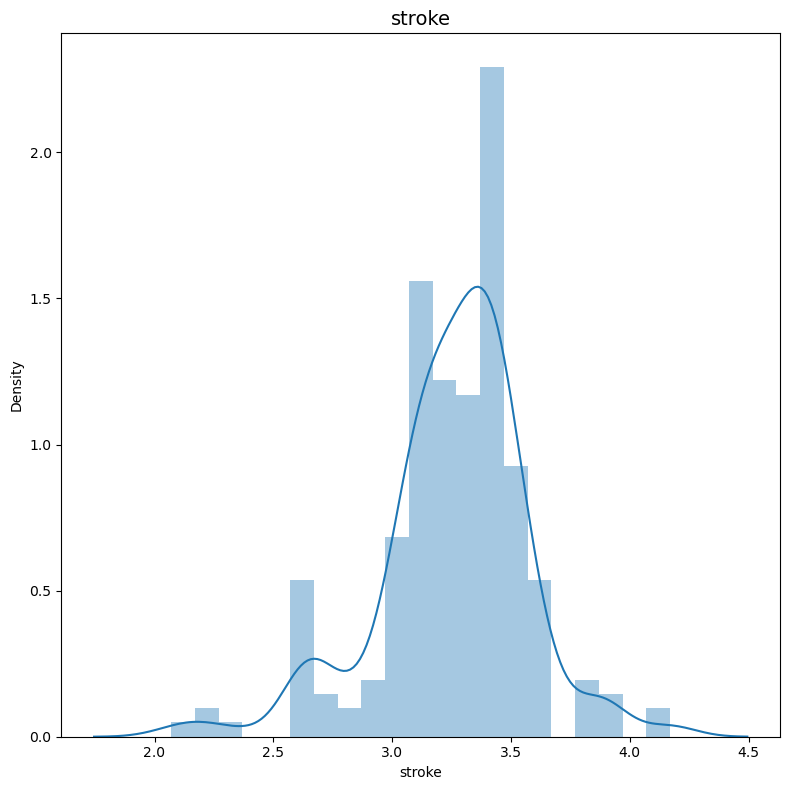

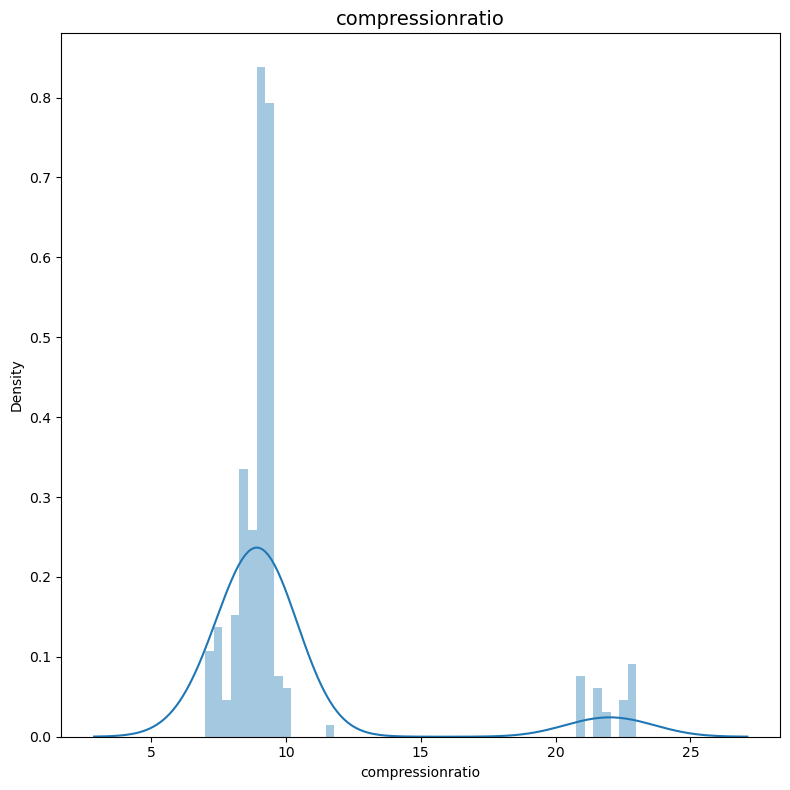

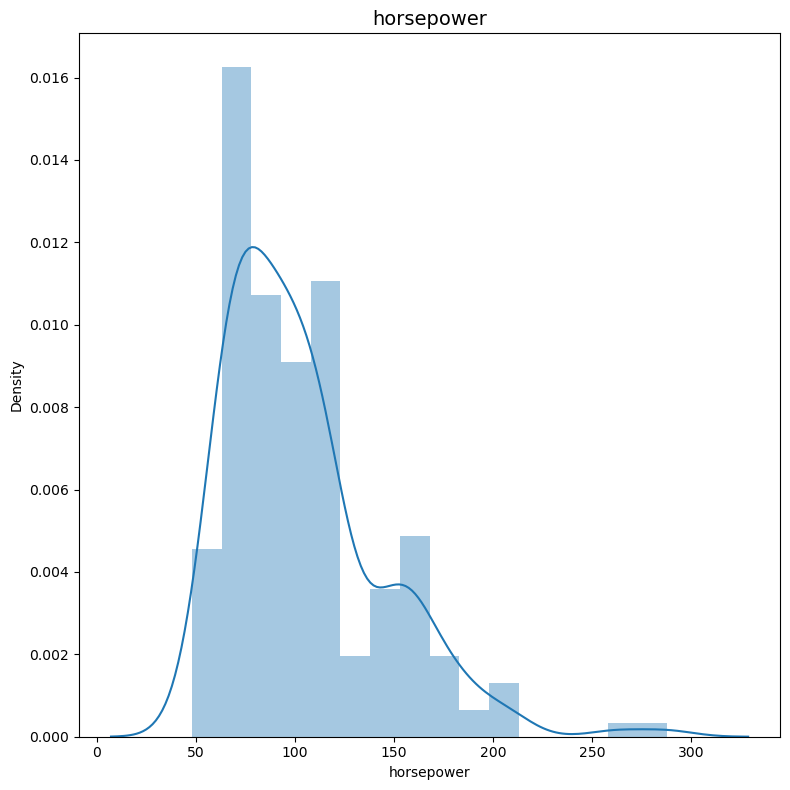

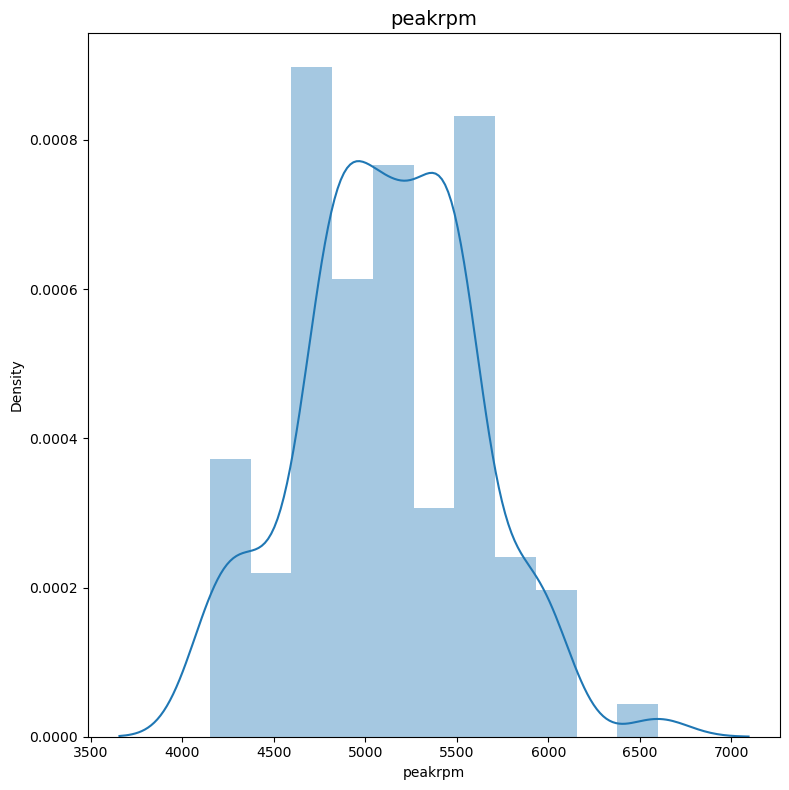

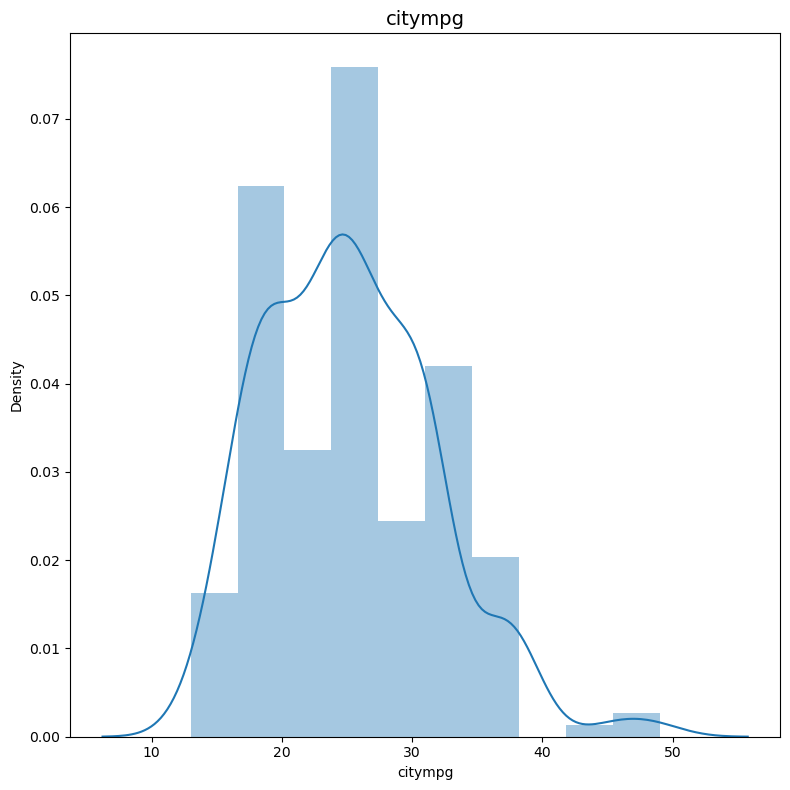

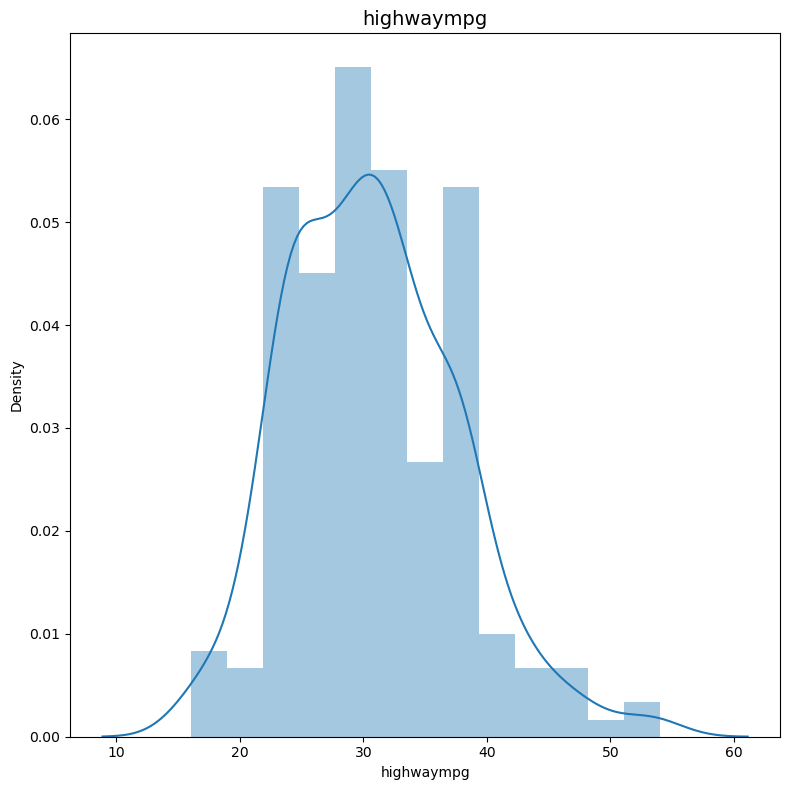

In [19]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Distribution Plot
for feature in num_cols: # There is a "car_ID" feature in num_cols
    if (feature == "price" or feature == 'car_ID'): continue
    plt.figure(figsize=(8, 8))
    plt.title(feature, fontsize=14)
    sns.distplot(df[feature])
    plt.tight_layout()
    plt.show()

## Scatter Plot

symboling vs wheelbase


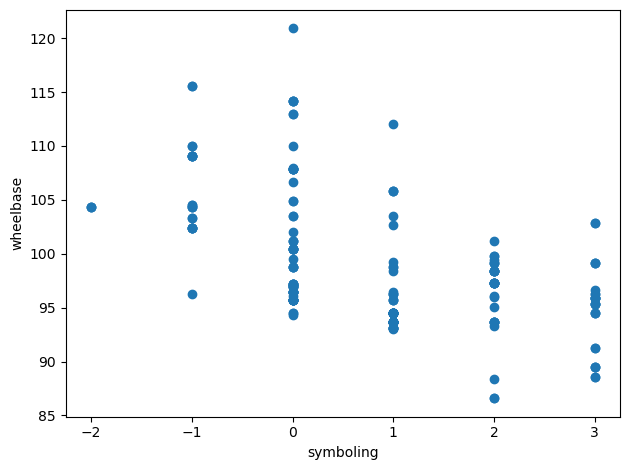



symboling vs carlength


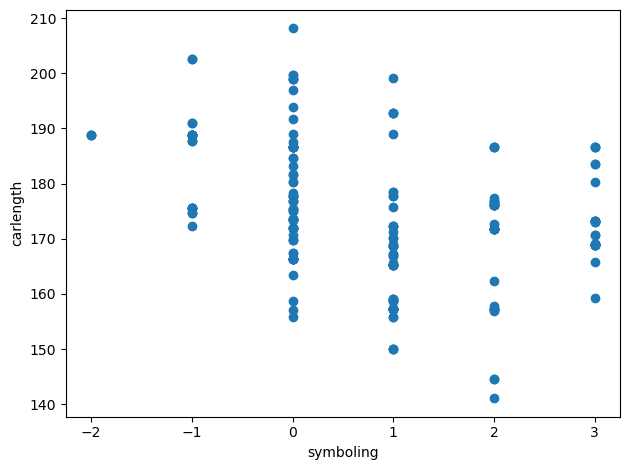



symboling vs carwidth


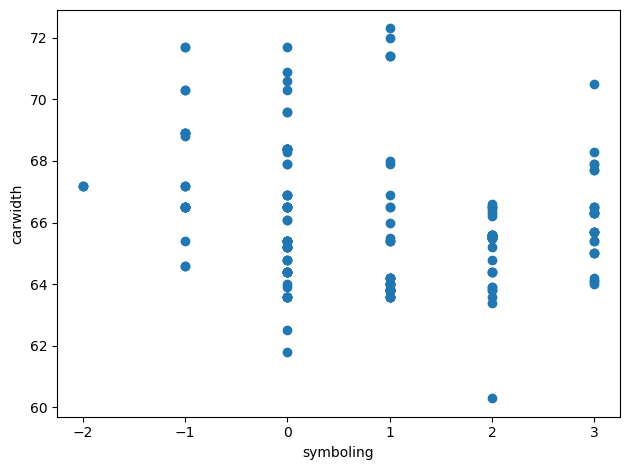



symboling vs carheight


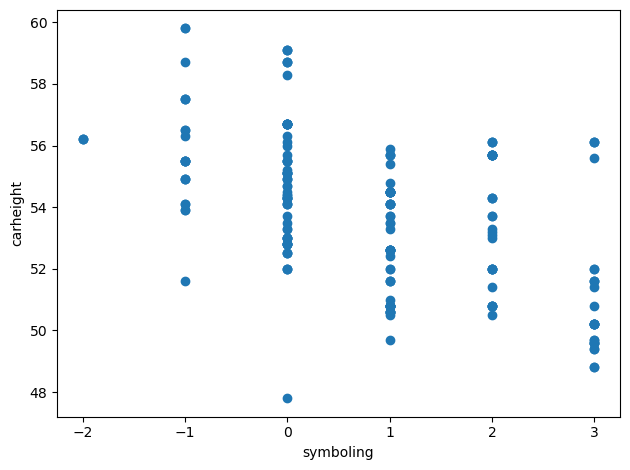



symboling vs curbweight


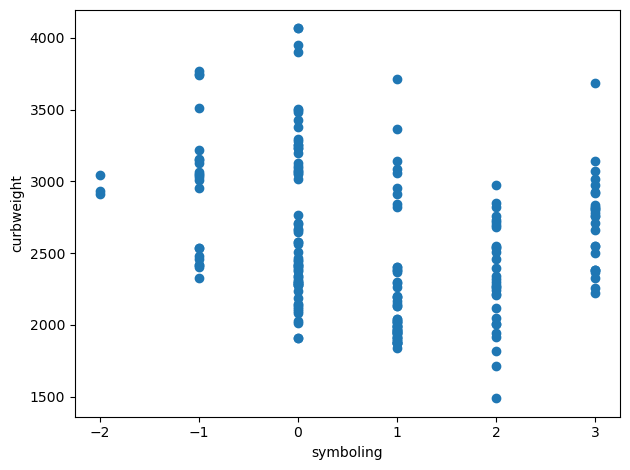



symboling vs enginesize


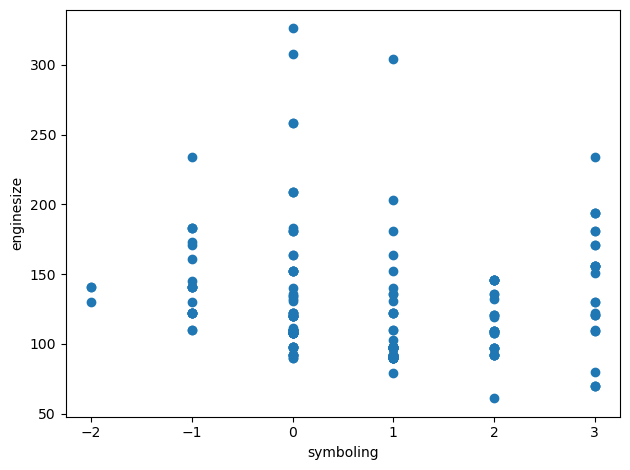



symboling vs boreratio


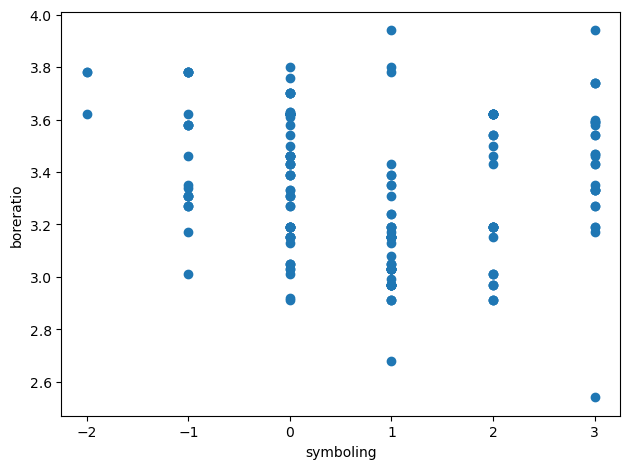



symboling vs stroke


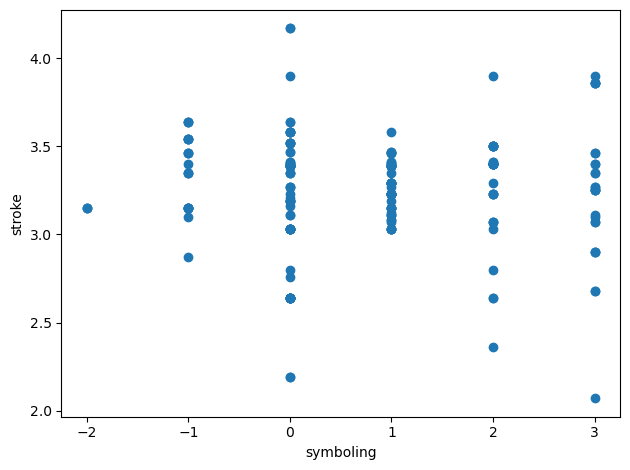



symboling vs compressionratio


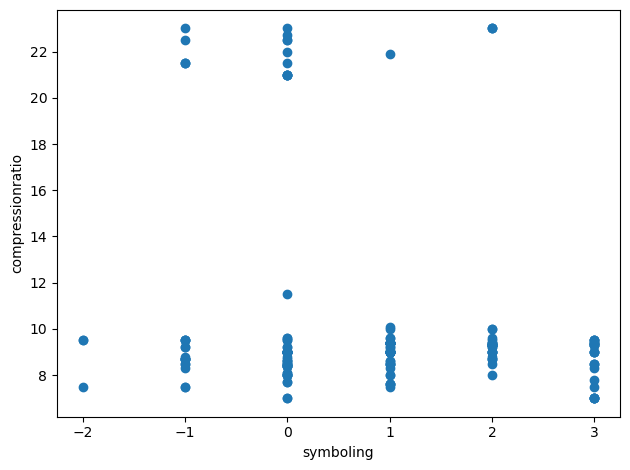



symboling vs horsepower


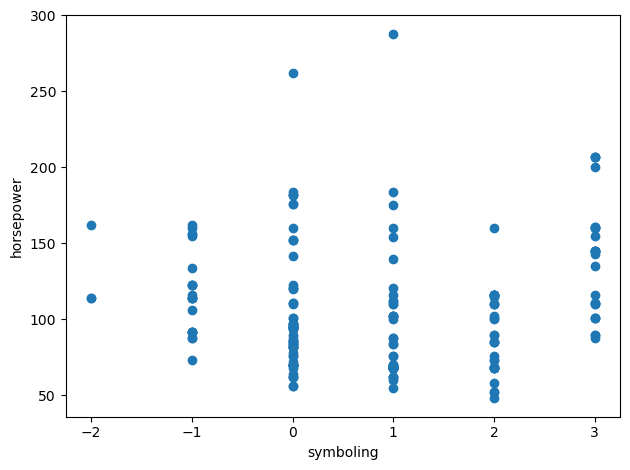



symboling vs peakrpm


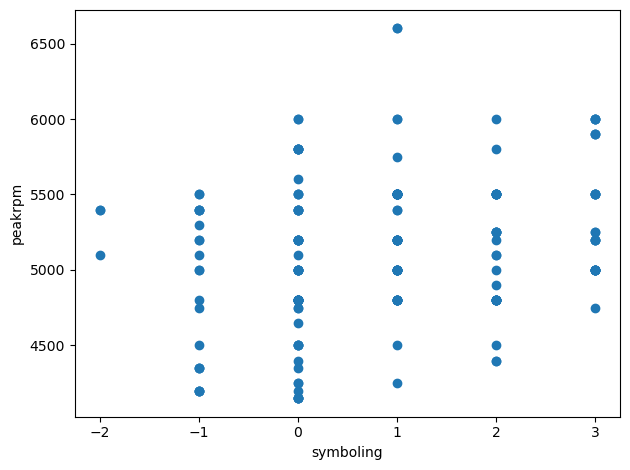



symboling vs citympg


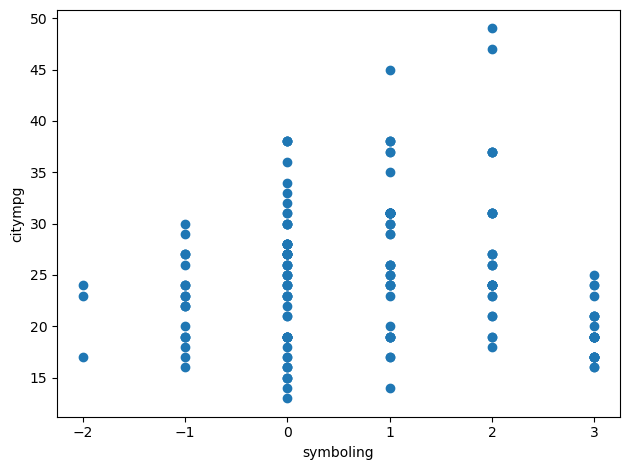



symboling vs highwaympg


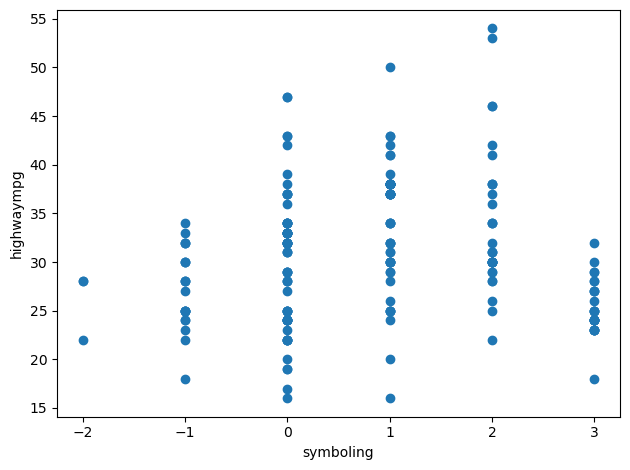



symboling vs price


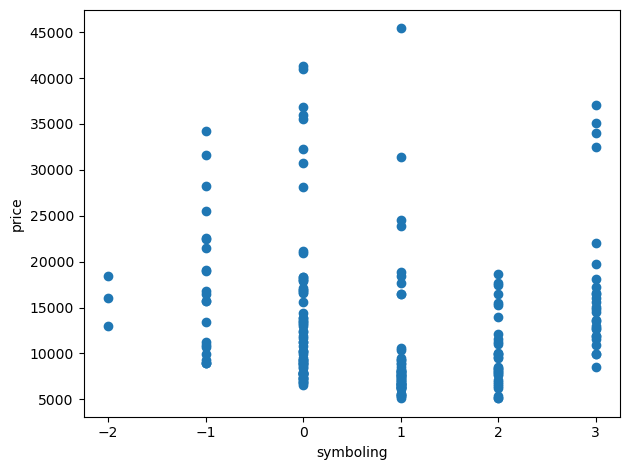



wheelbase vs carlength


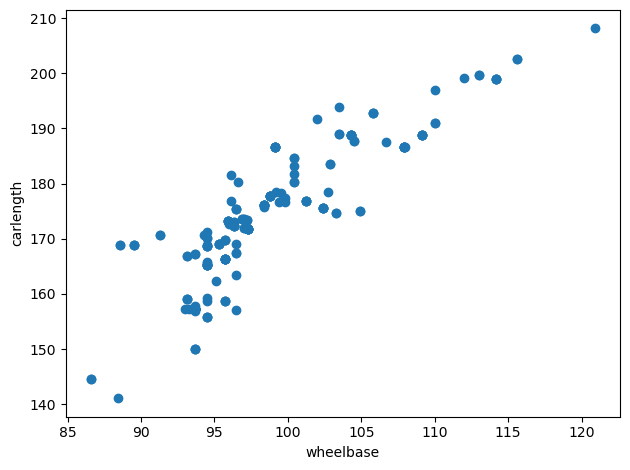



wheelbase vs carwidth


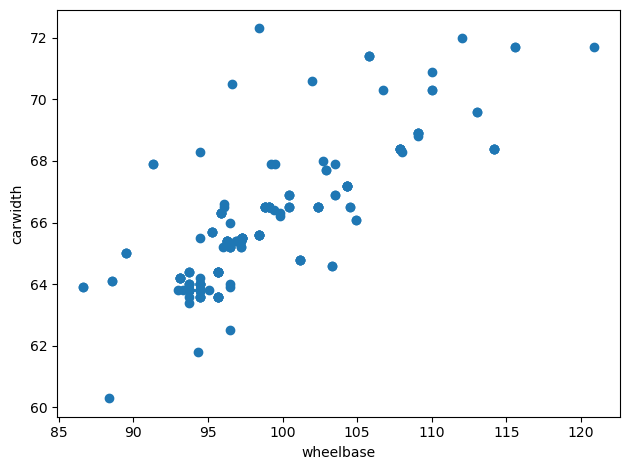



wheelbase vs carheight


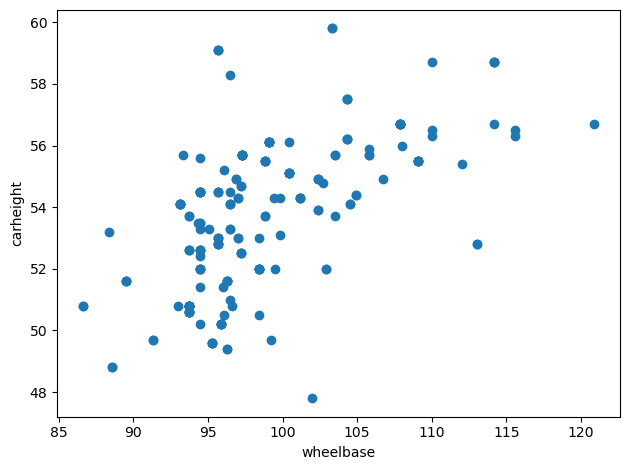



wheelbase vs curbweight


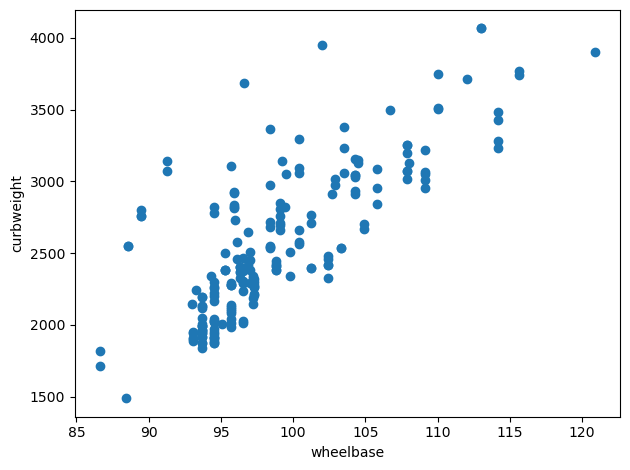



wheelbase vs enginesize


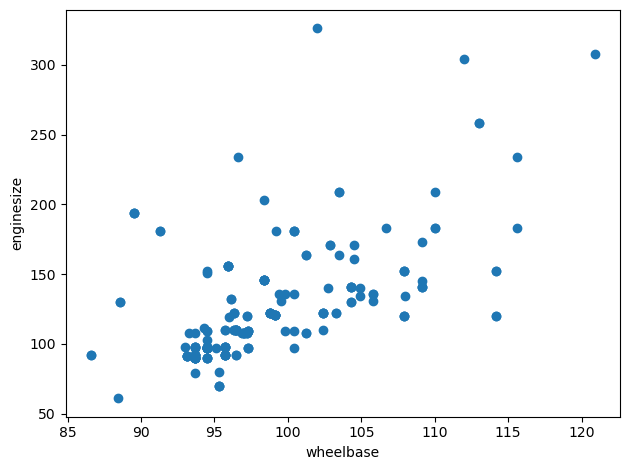



wheelbase vs boreratio


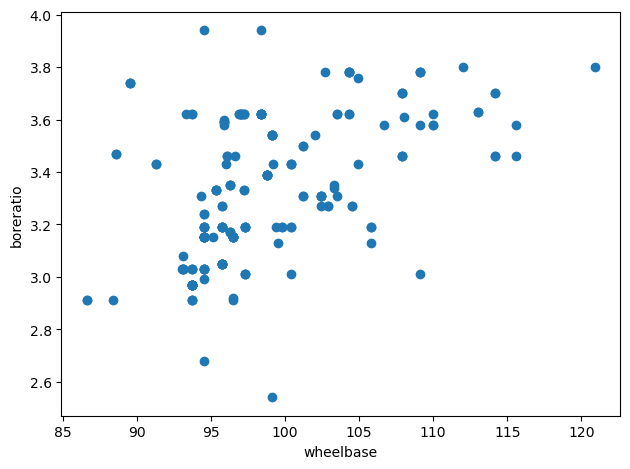



wheelbase vs stroke


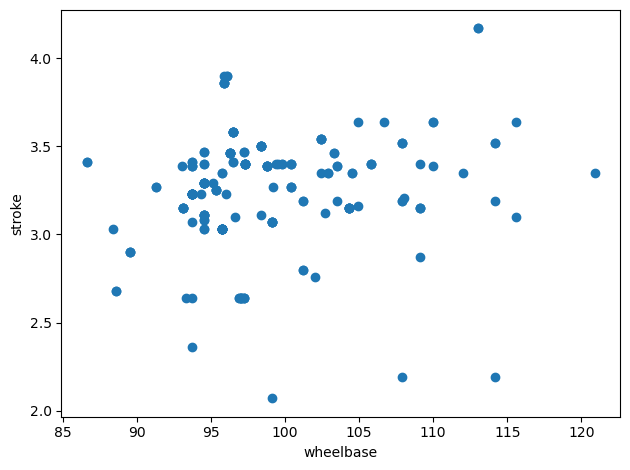



wheelbase vs compressionratio


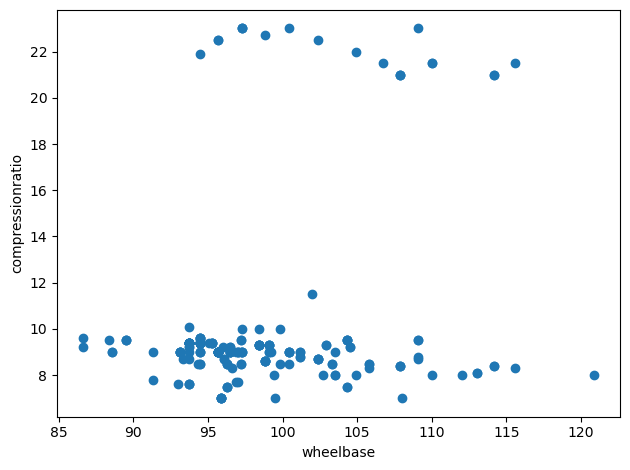



wheelbase vs horsepower


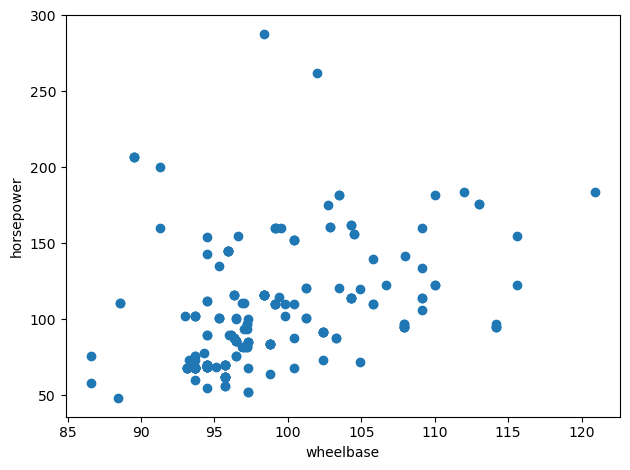



wheelbase vs peakrpm


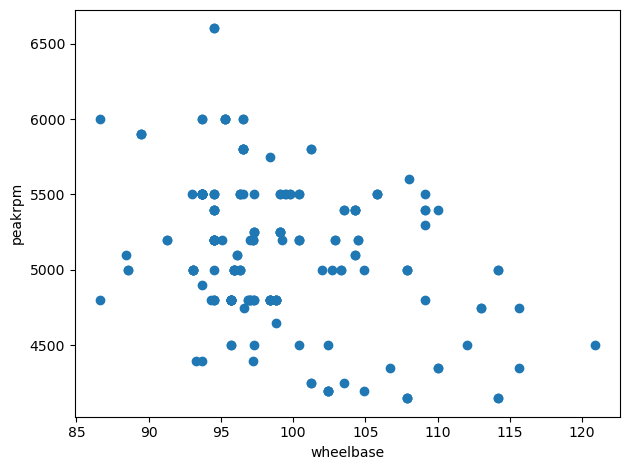



wheelbase vs citympg


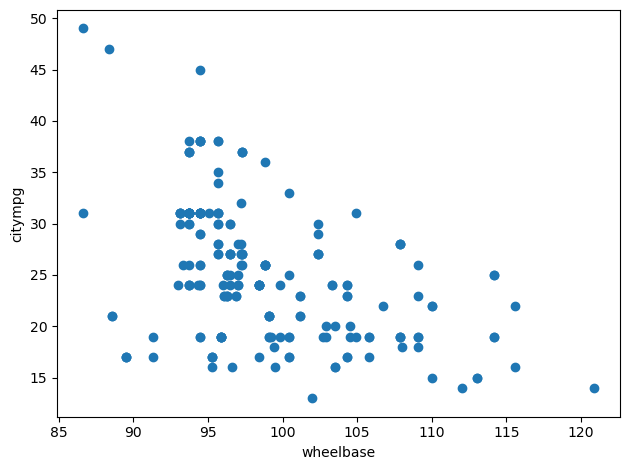



wheelbase vs highwaympg


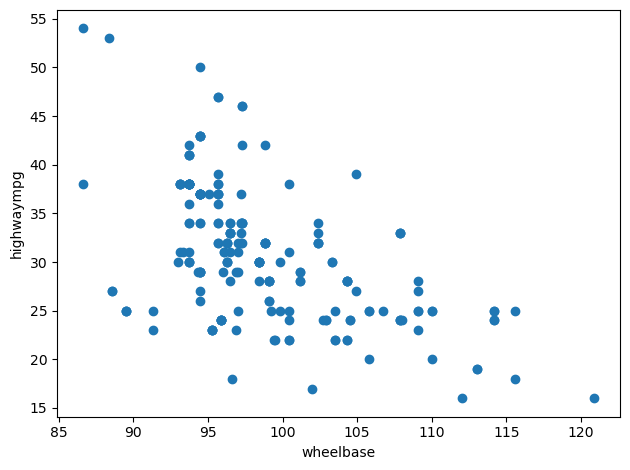



wheelbase vs price


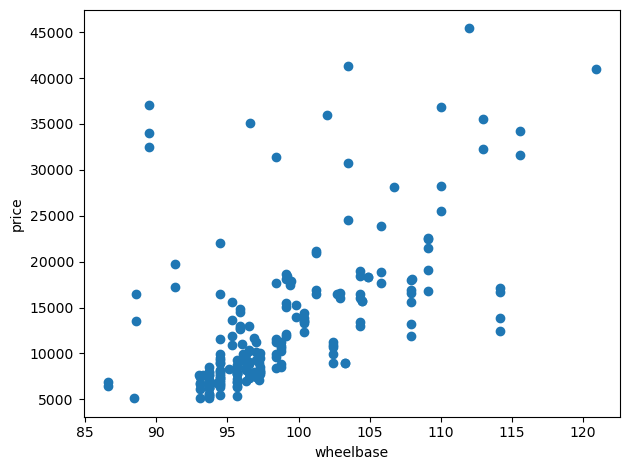



carlength vs carwidth


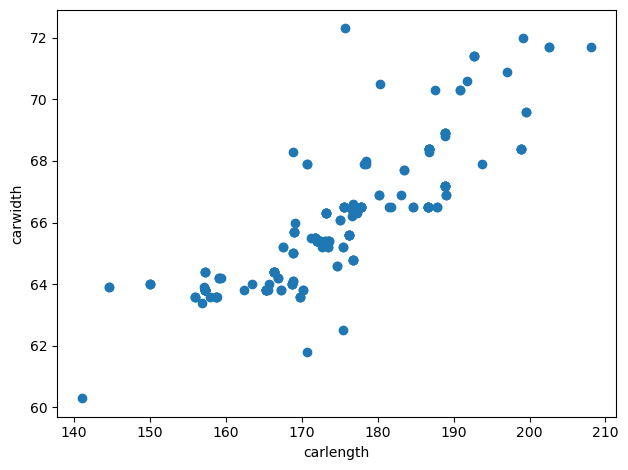



carlength vs carheight


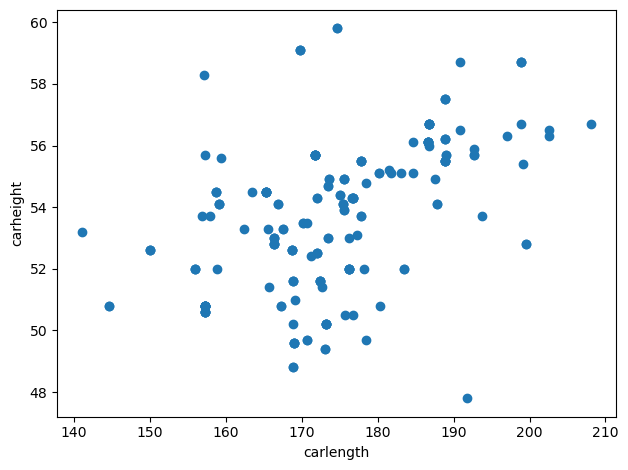



carlength vs curbweight


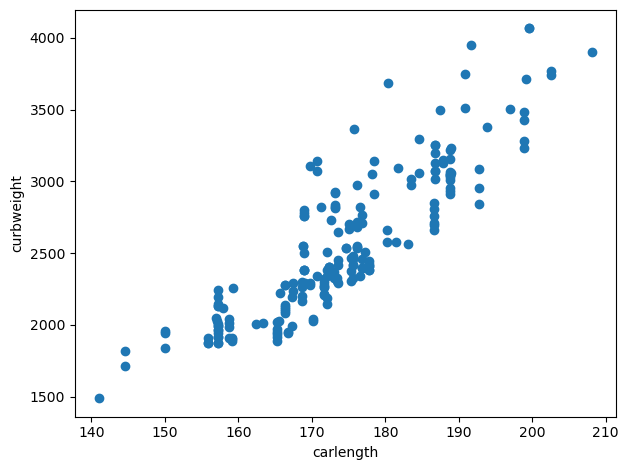



carlength vs enginesize


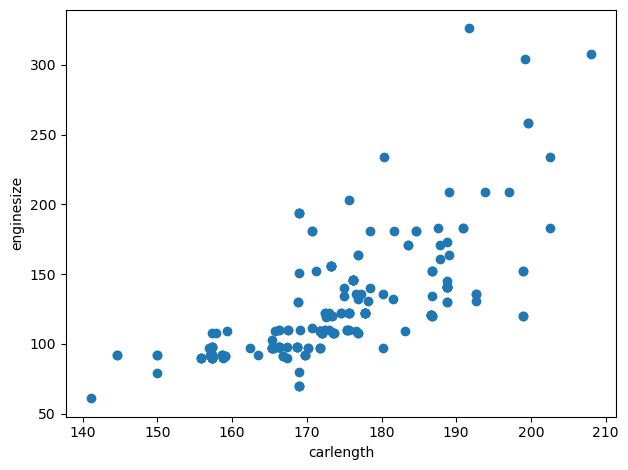



carlength vs boreratio


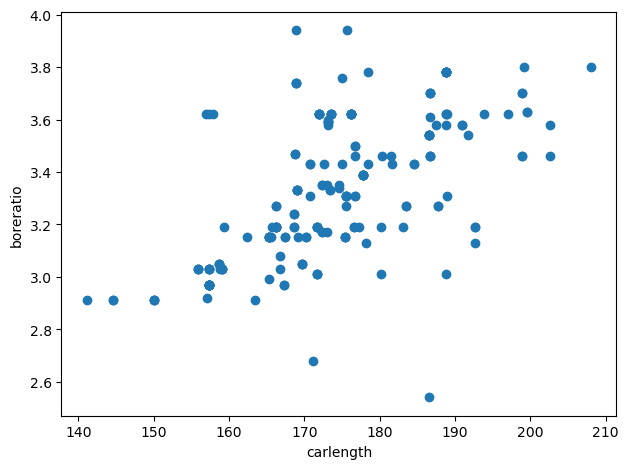



carlength vs stroke


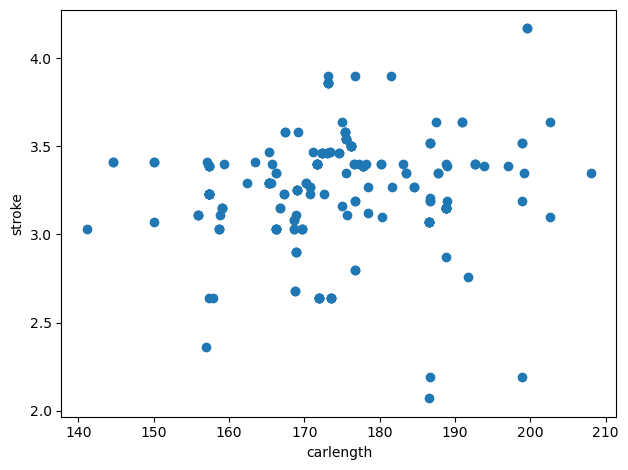



carlength vs compressionratio


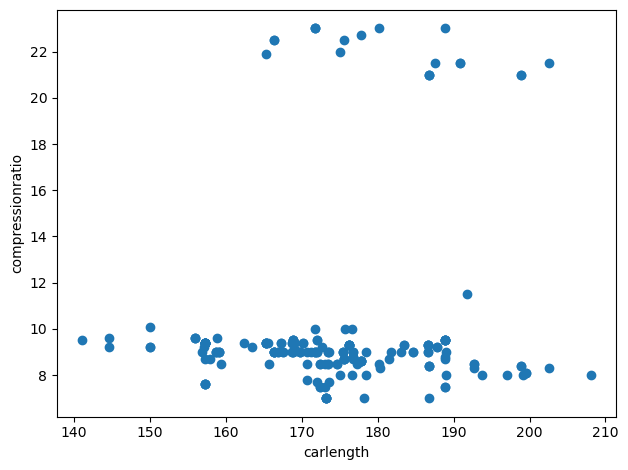



carlength vs horsepower


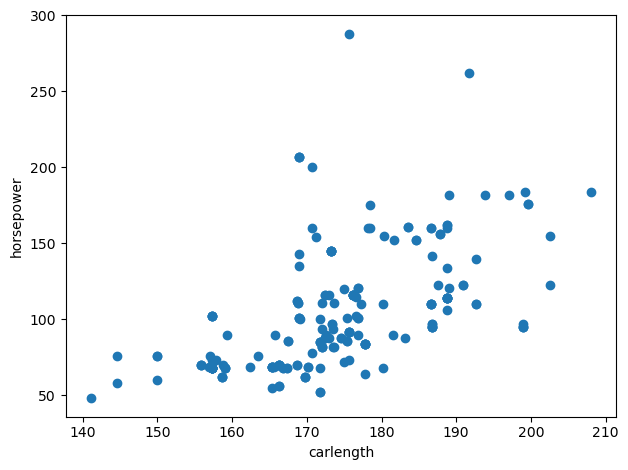



carlength vs peakrpm


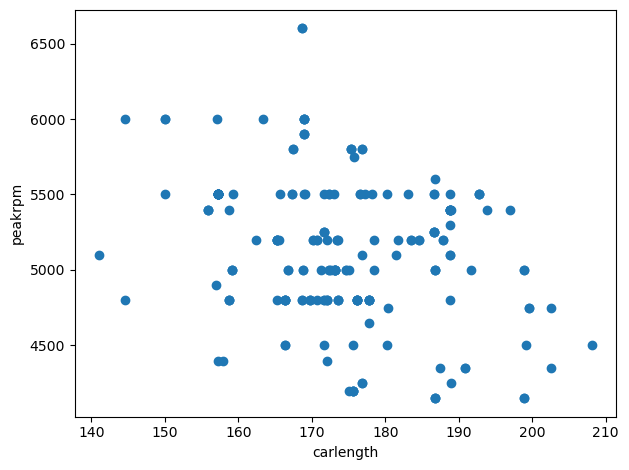



carlength vs citympg


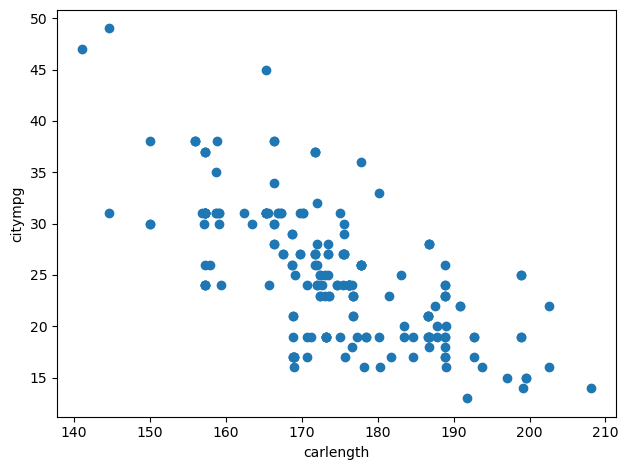



carlength vs highwaympg


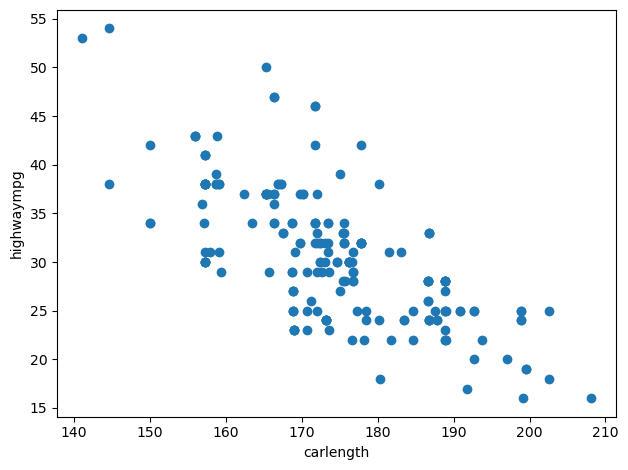



carlength vs price


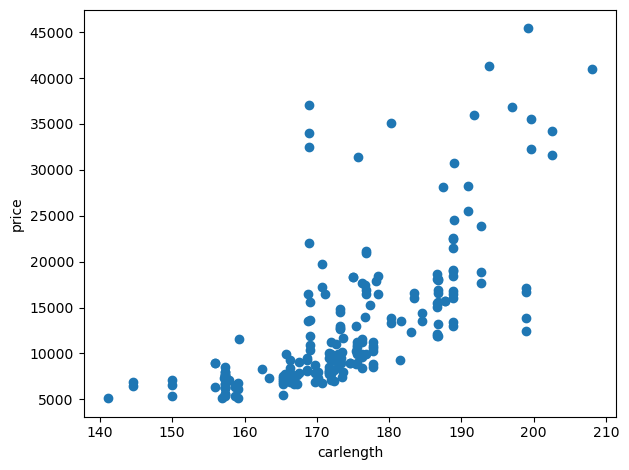



carwidth vs carheight


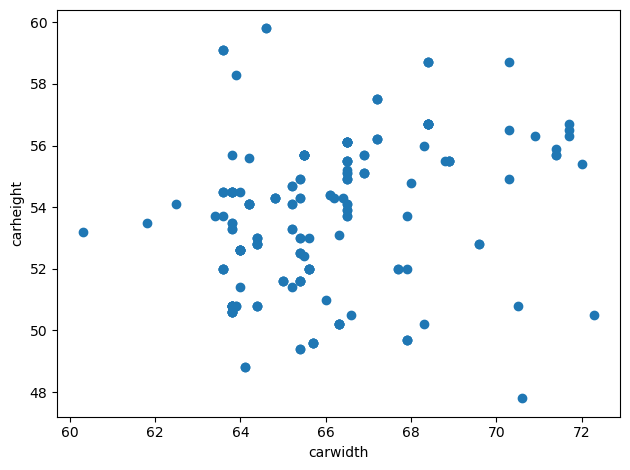



carwidth vs curbweight


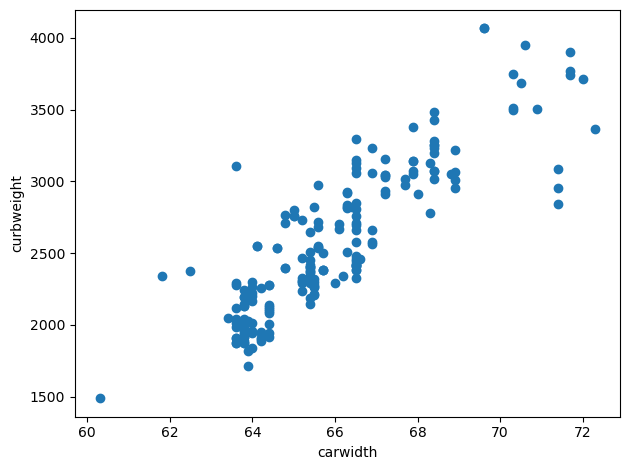



carwidth vs enginesize


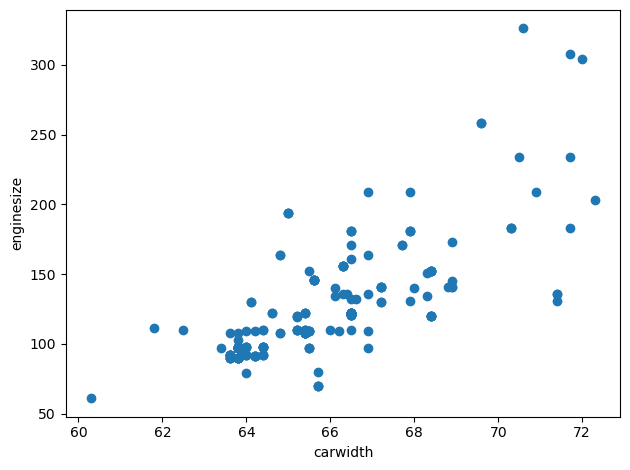



carwidth vs boreratio


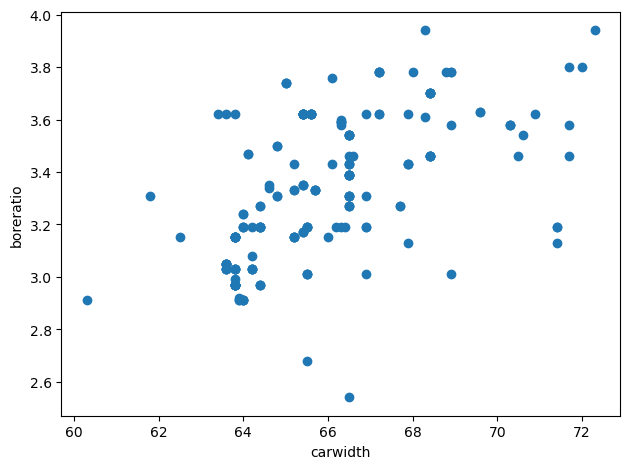



carwidth vs stroke


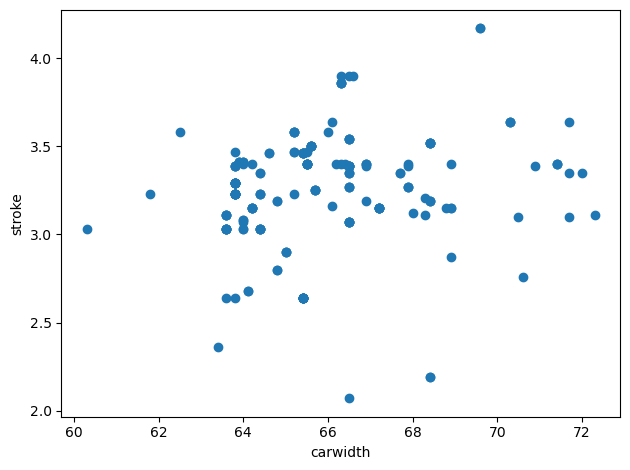



carwidth vs compressionratio


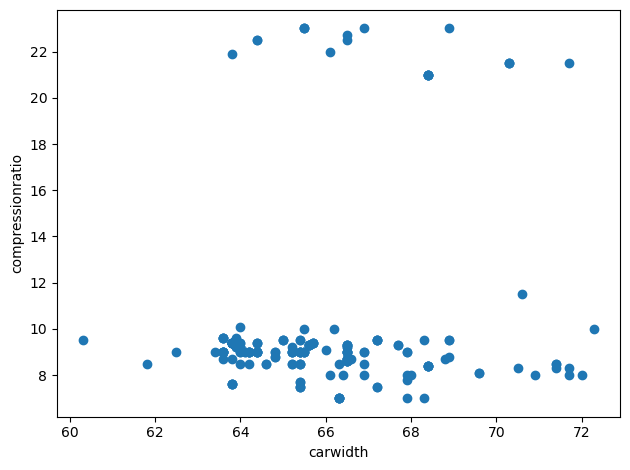



carwidth vs horsepower


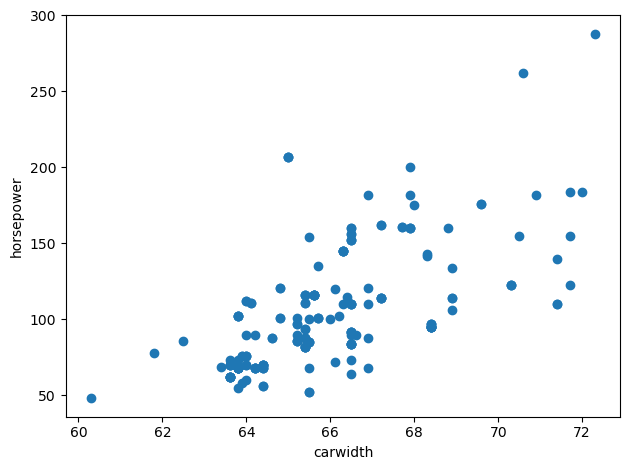



carwidth vs peakrpm


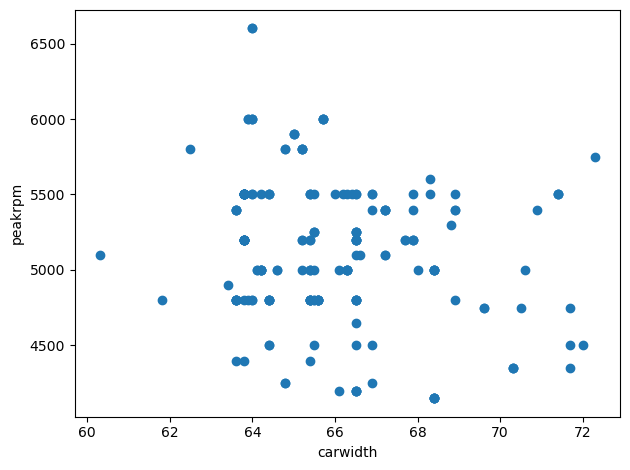



carwidth vs citympg


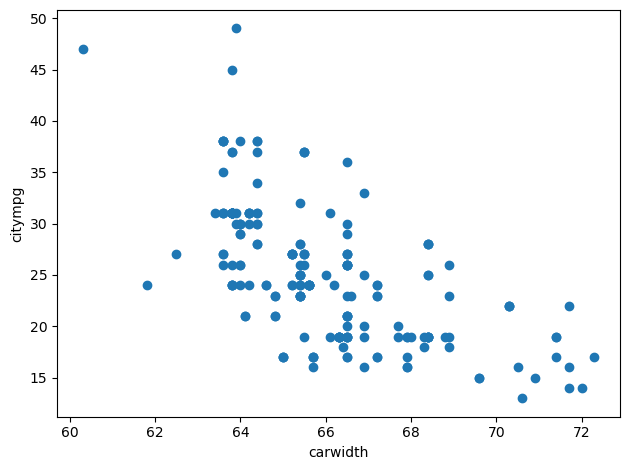



carwidth vs highwaympg


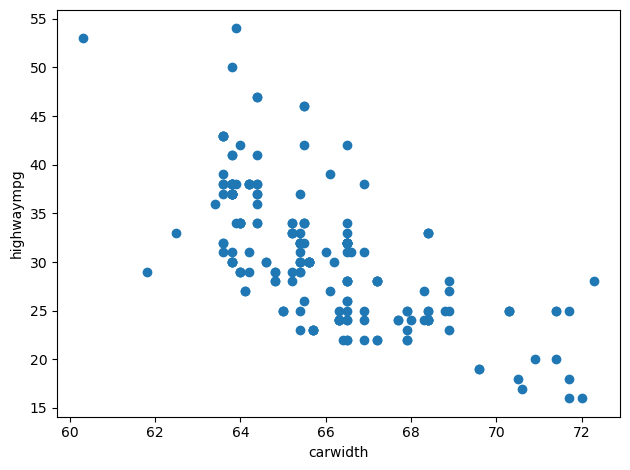



carwidth vs price


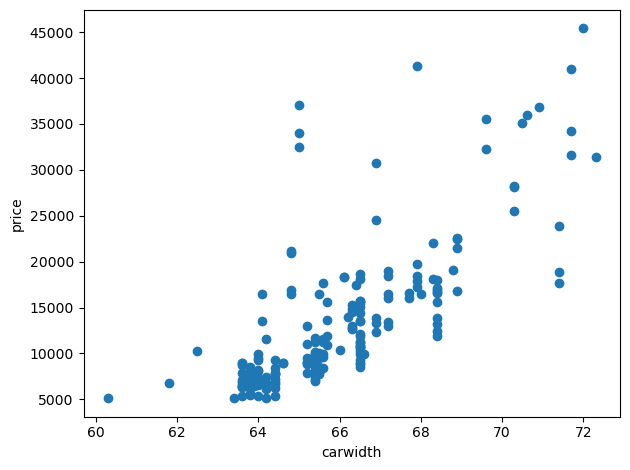



carheight vs curbweight


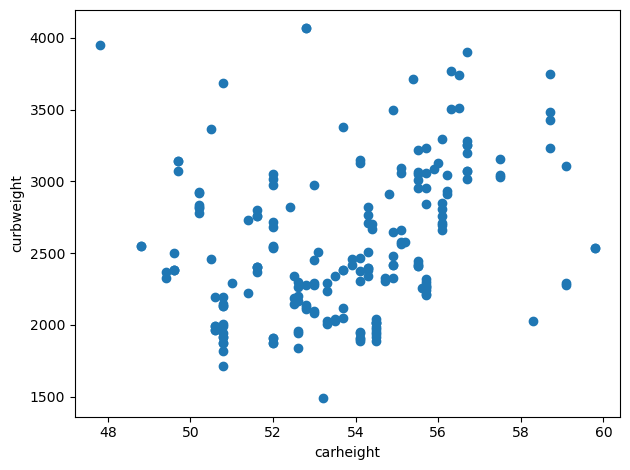



carheight vs enginesize


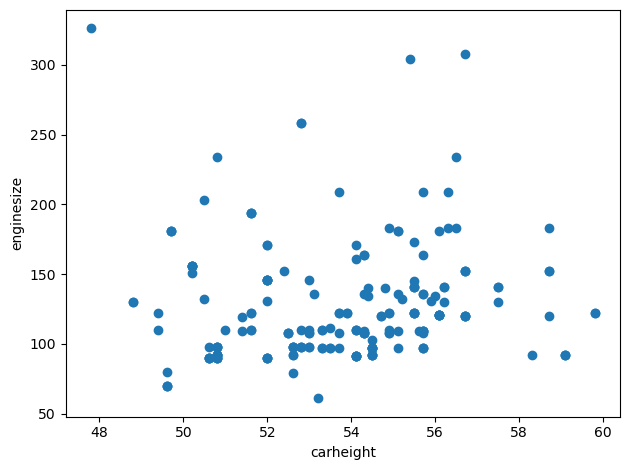



carheight vs boreratio


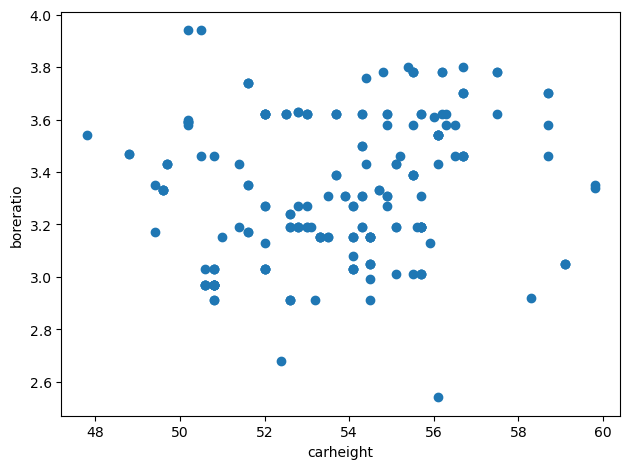



carheight vs stroke


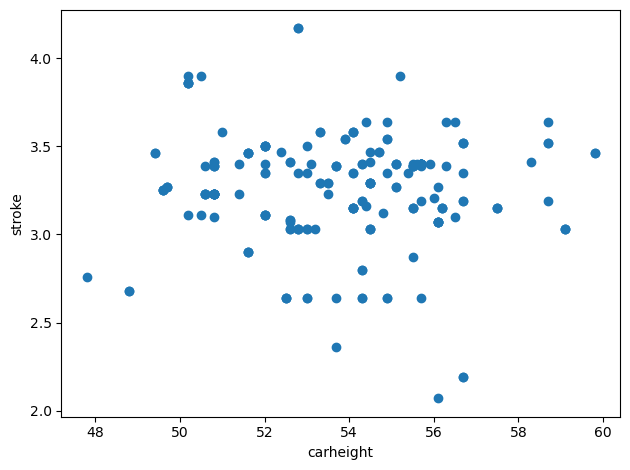



carheight vs compressionratio


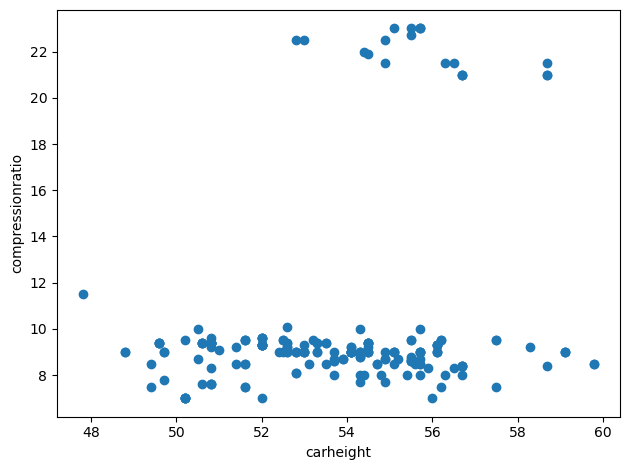



carheight vs horsepower


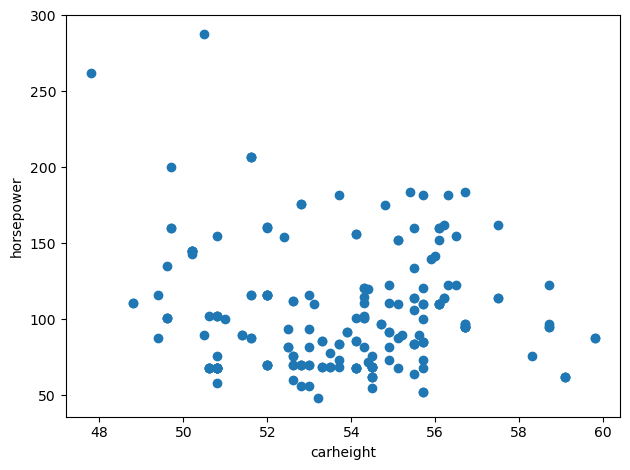



carheight vs peakrpm


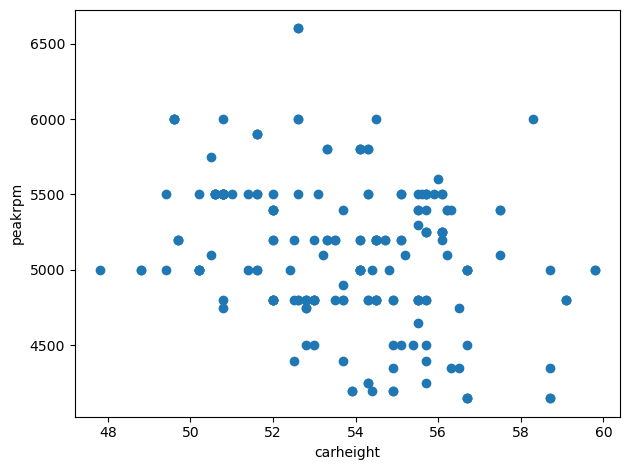



carheight vs citympg


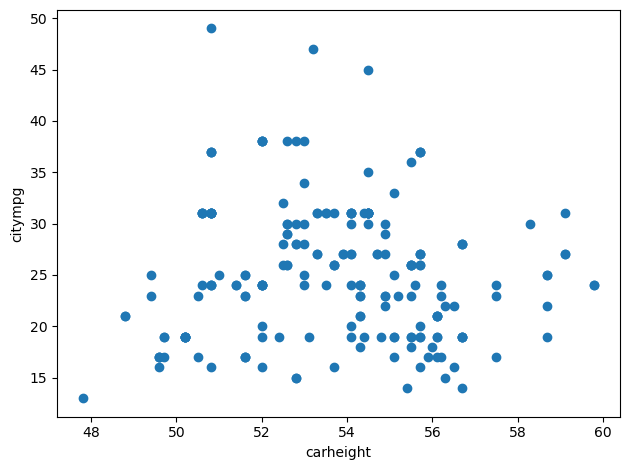



carheight vs highwaympg


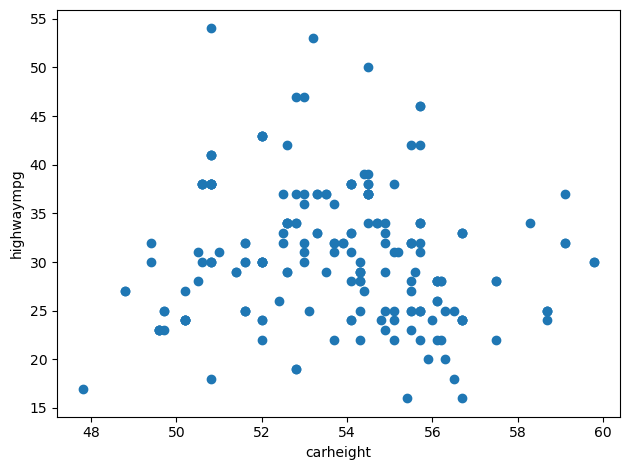



carheight vs price


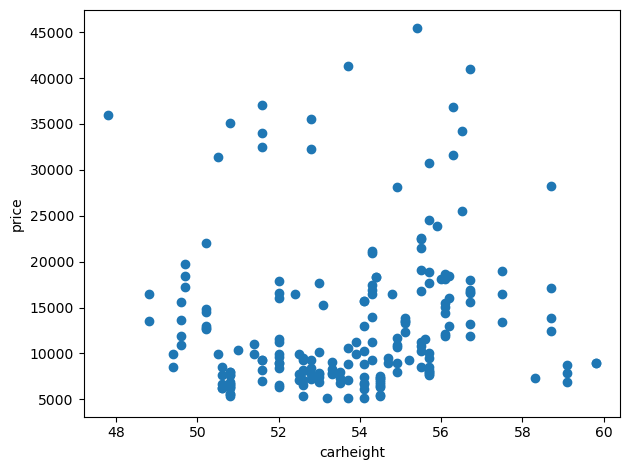



curbweight vs enginesize


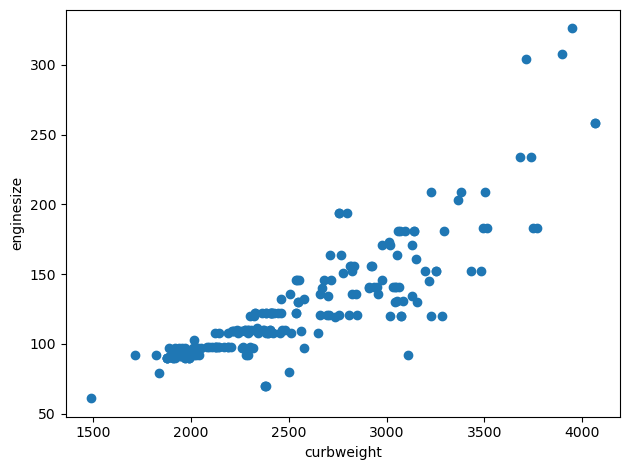



curbweight vs boreratio


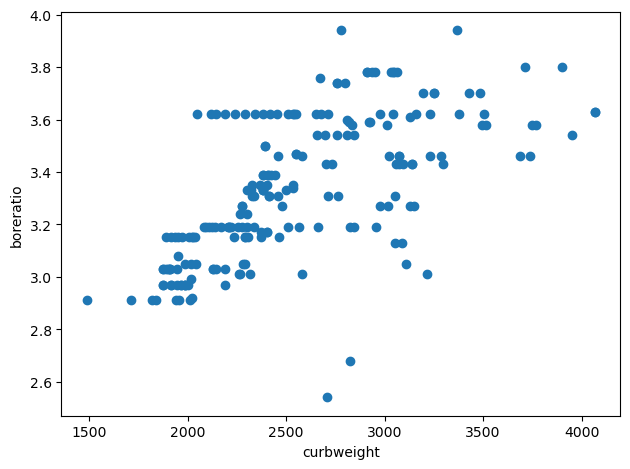



curbweight vs stroke


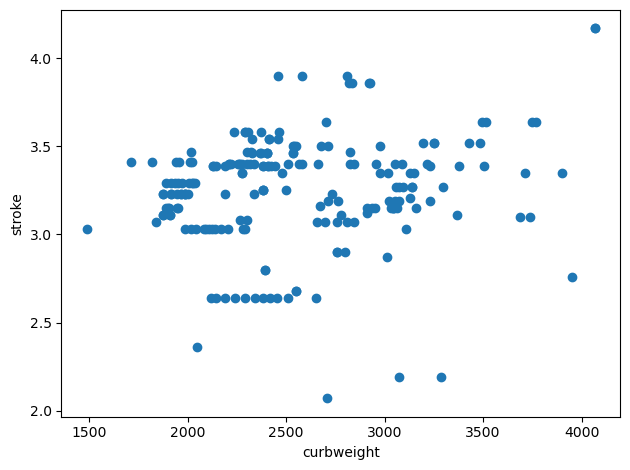



curbweight vs compressionratio


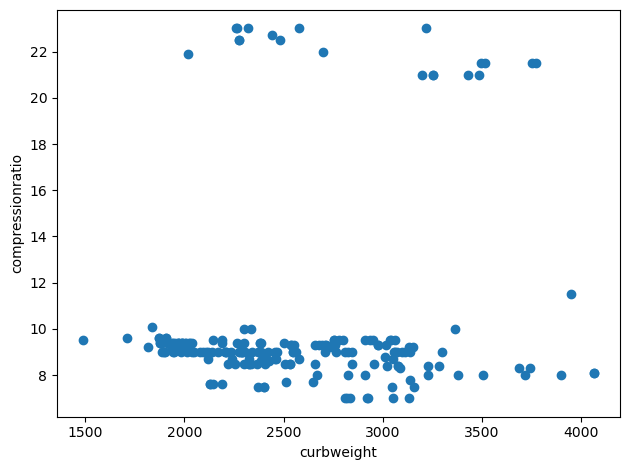



curbweight vs horsepower


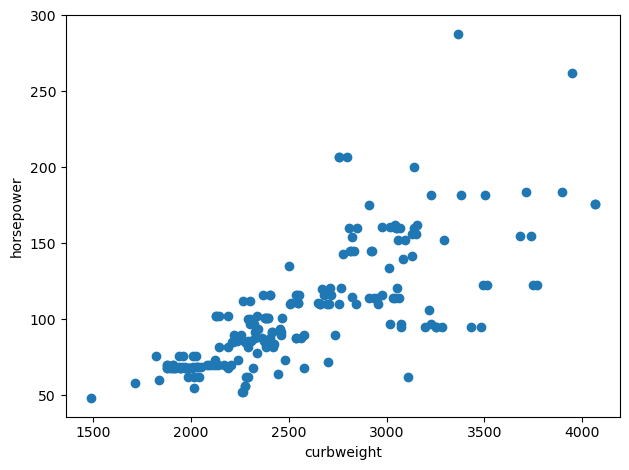



curbweight vs peakrpm


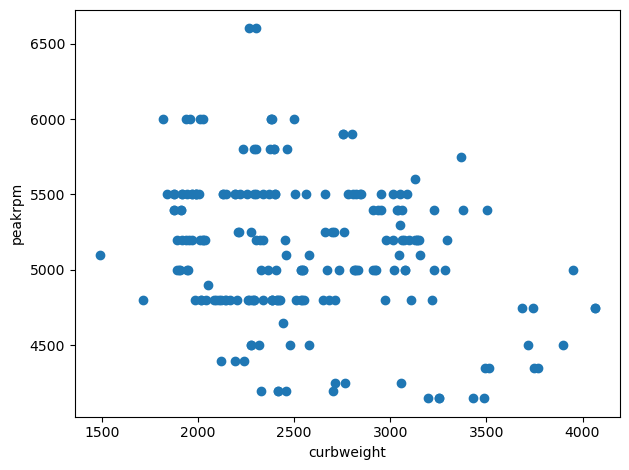



curbweight vs citympg


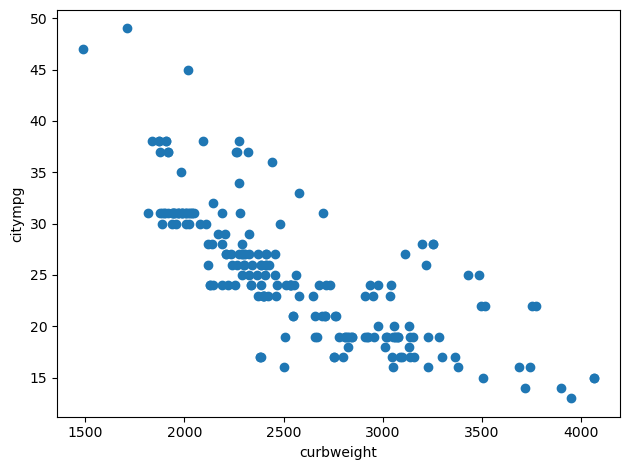



curbweight vs highwaympg


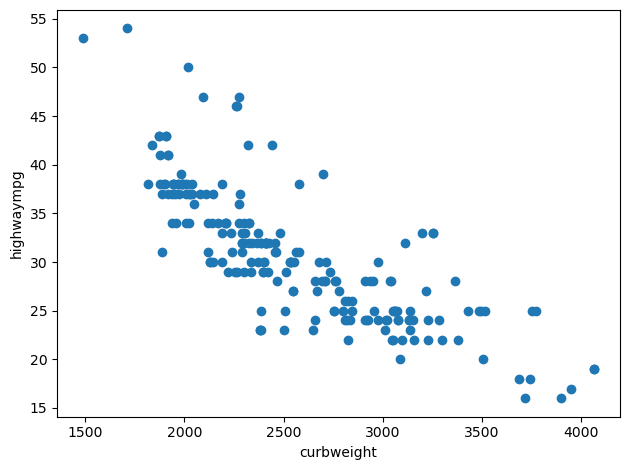



curbweight vs price


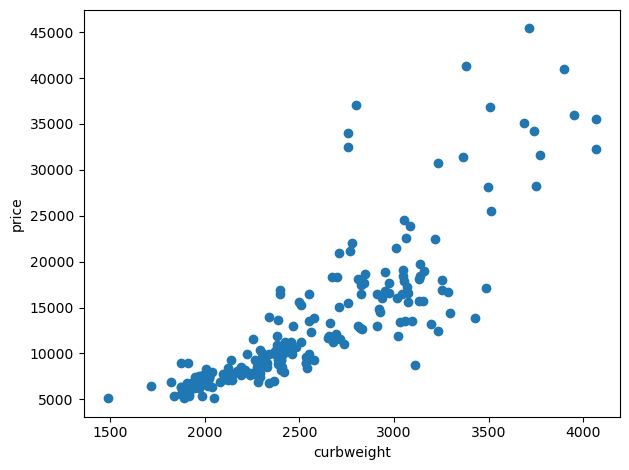



enginesize vs boreratio


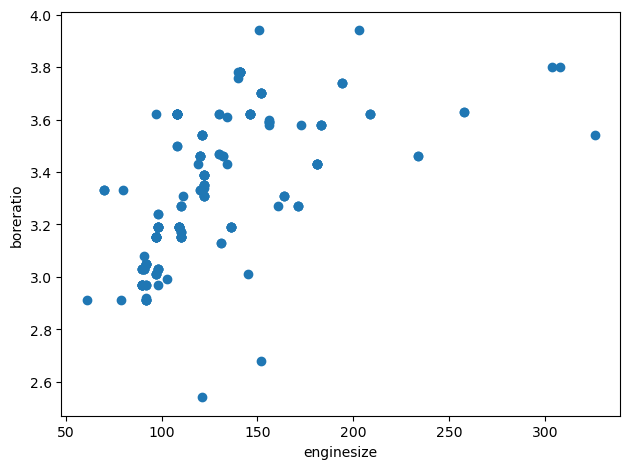



enginesize vs stroke


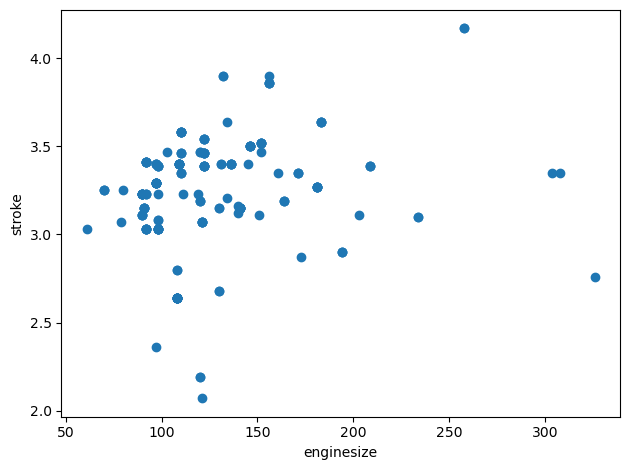



enginesize vs compressionratio


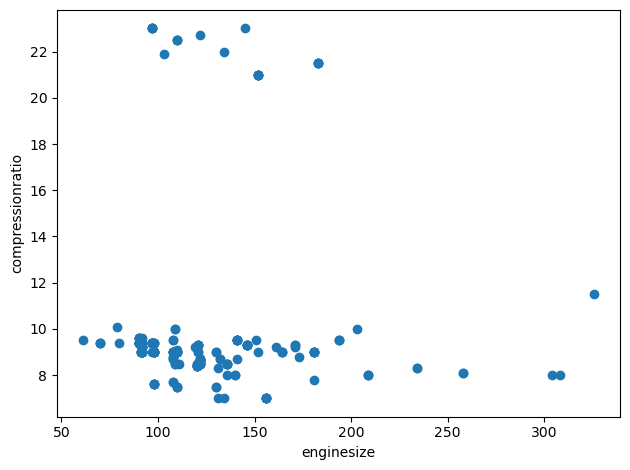



enginesize vs horsepower


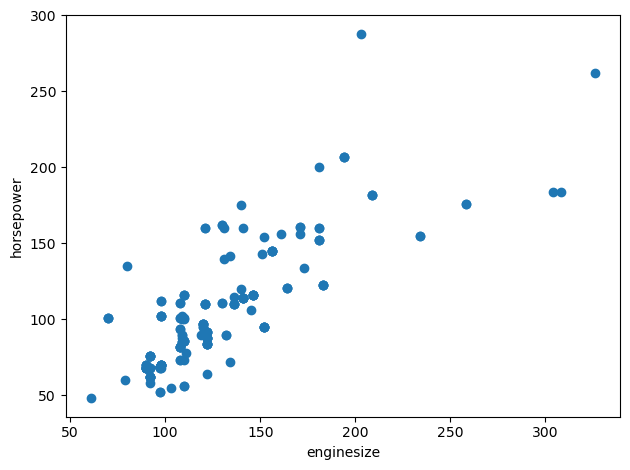



enginesize vs peakrpm


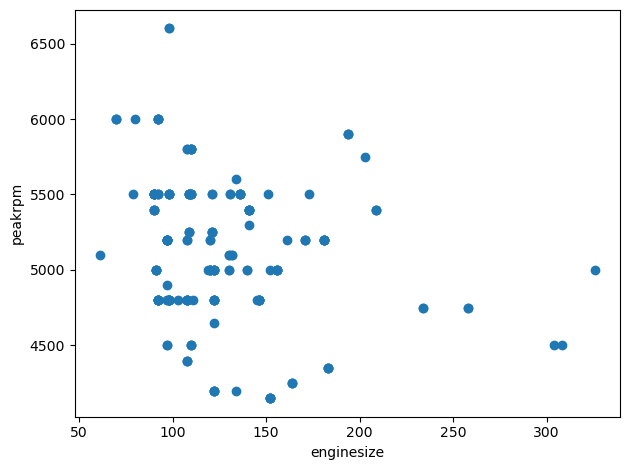



enginesize vs citympg


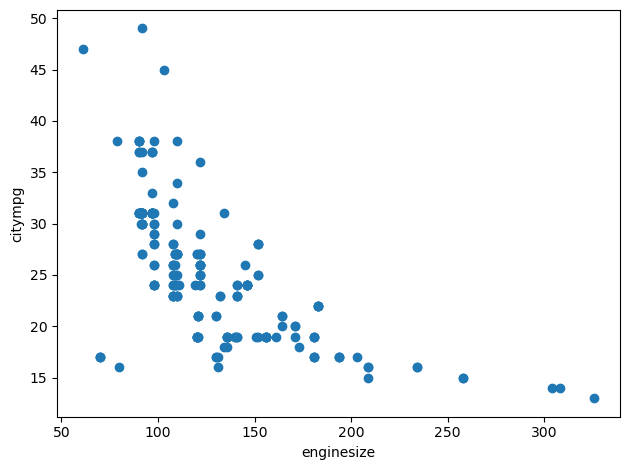



enginesize vs highwaympg


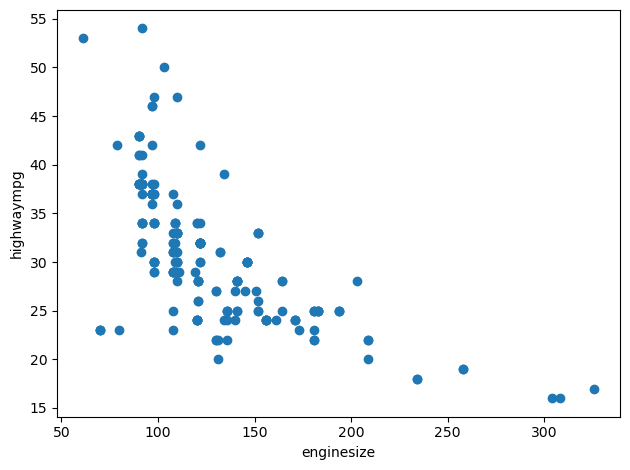



enginesize vs price


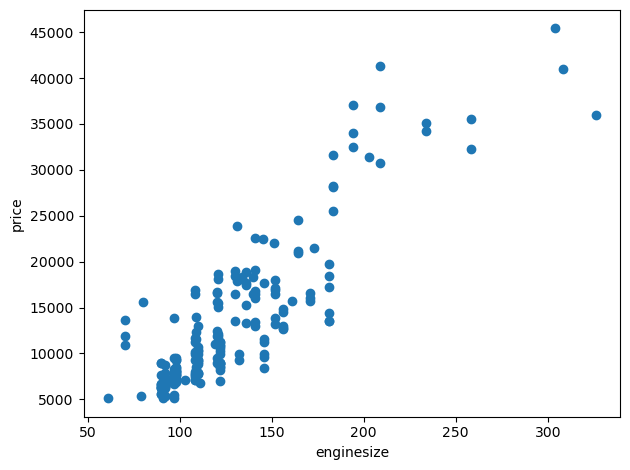



boreratio vs stroke


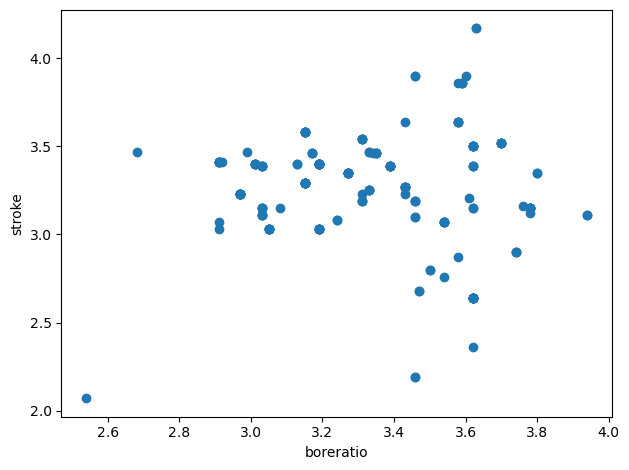



boreratio vs compressionratio


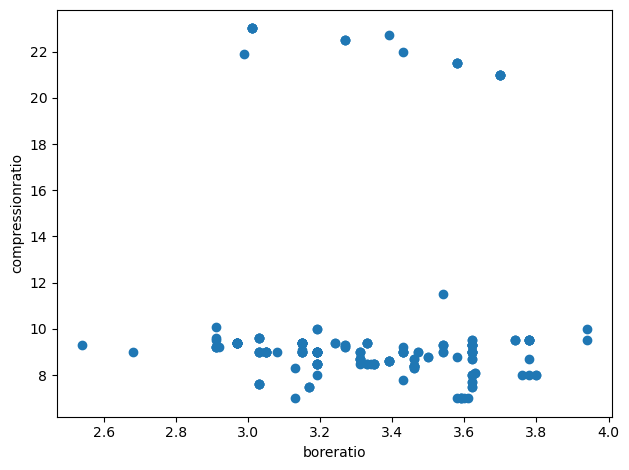



boreratio vs horsepower


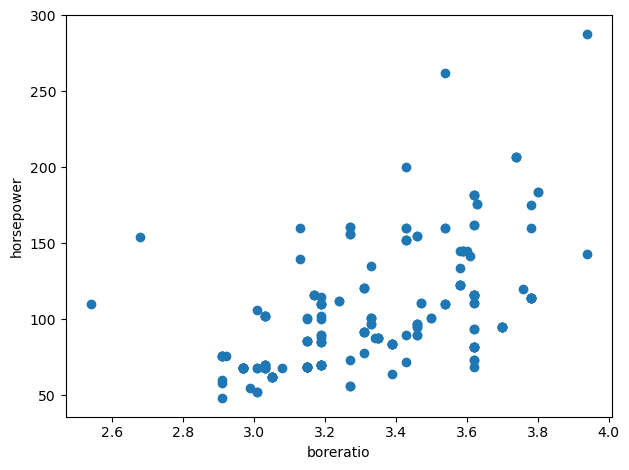



boreratio vs peakrpm


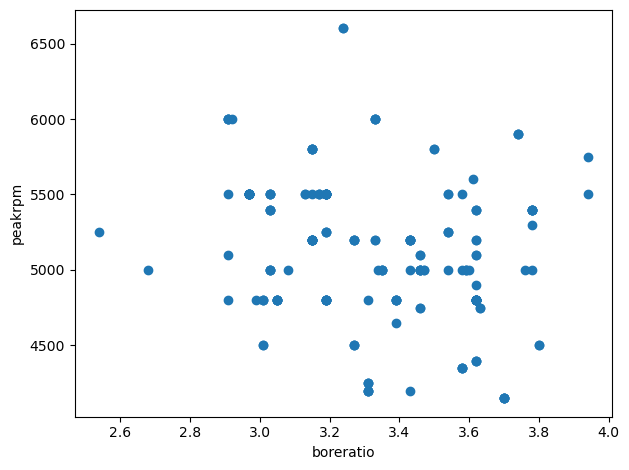



boreratio vs citympg


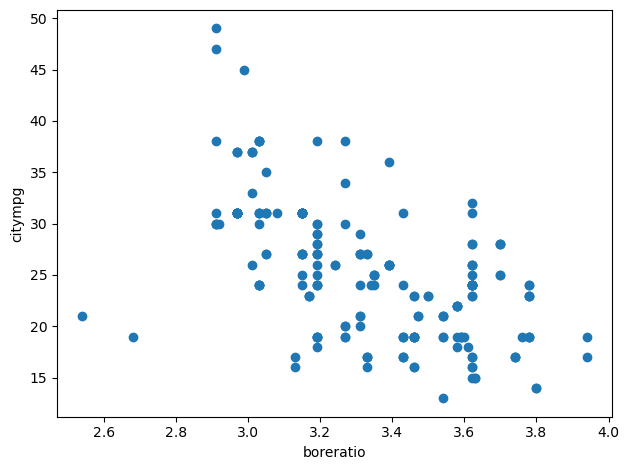



boreratio vs highwaympg


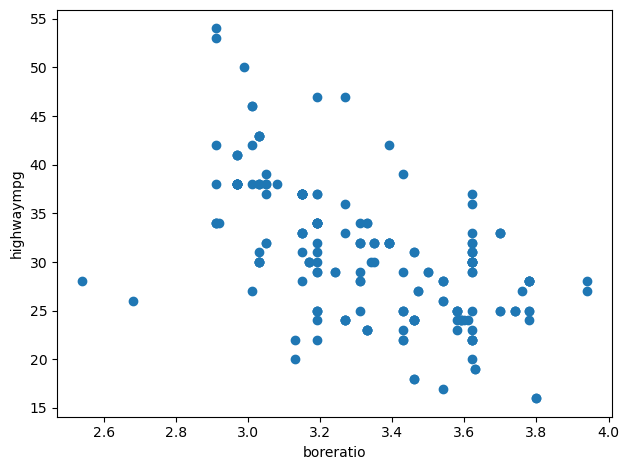



boreratio vs price


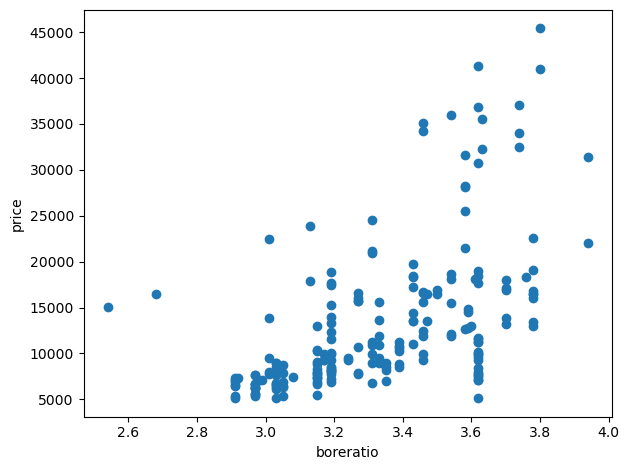



stroke vs compressionratio


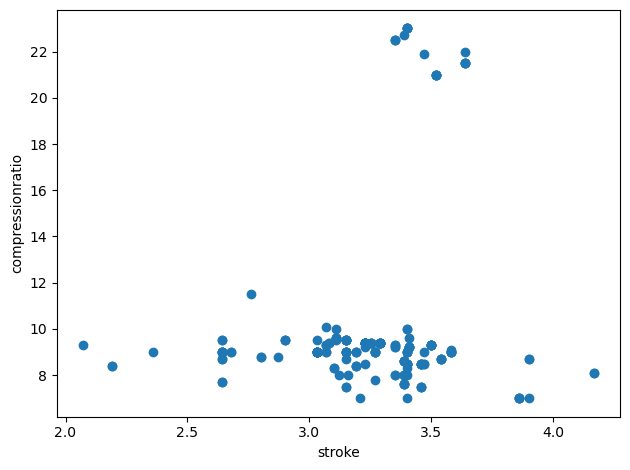



stroke vs horsepower


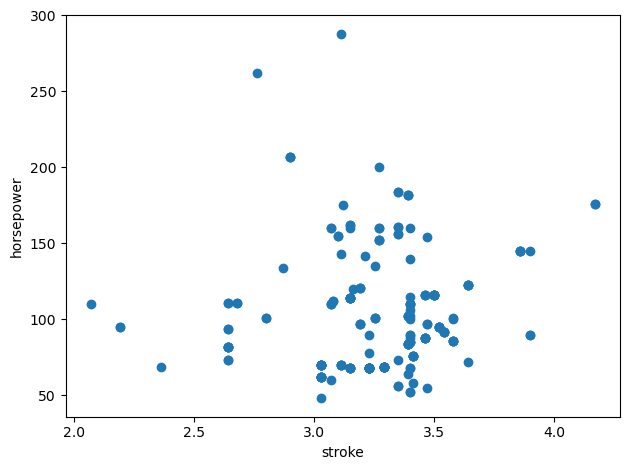



stroke vs peakrpm


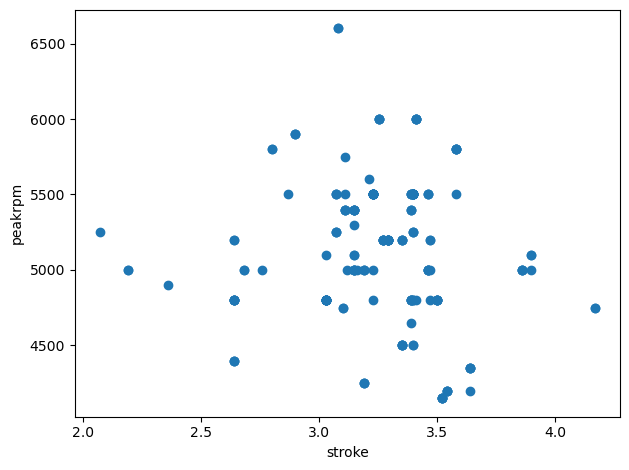



stroke vs citympg


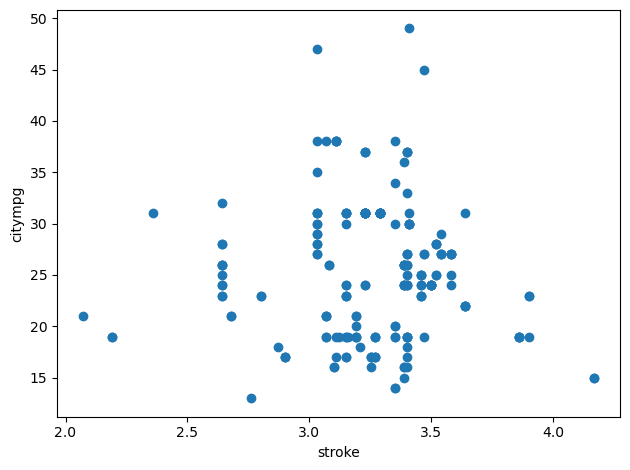



stroke vs highwaympg


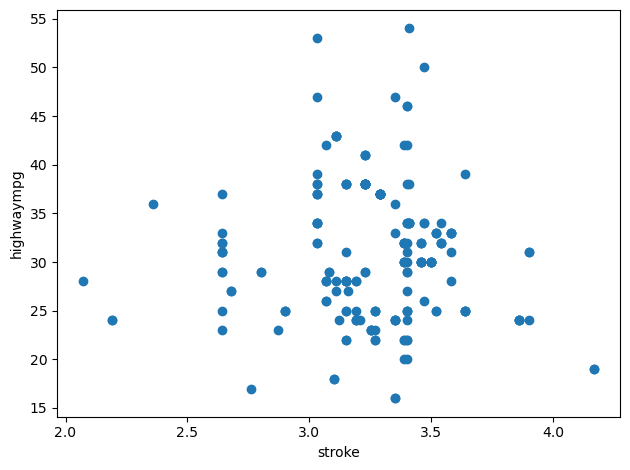



stroke vs price


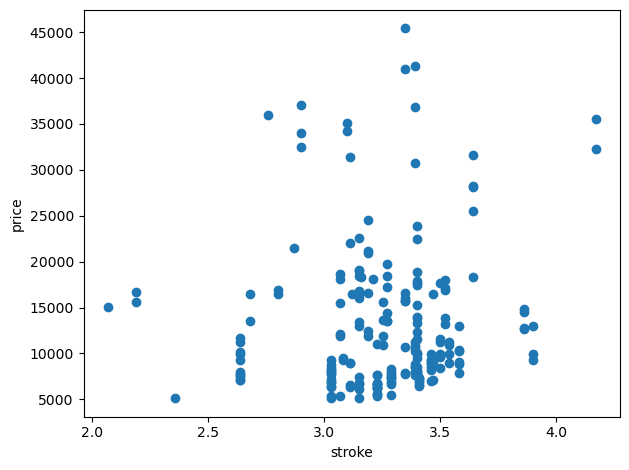



compressionratio vs horsepower


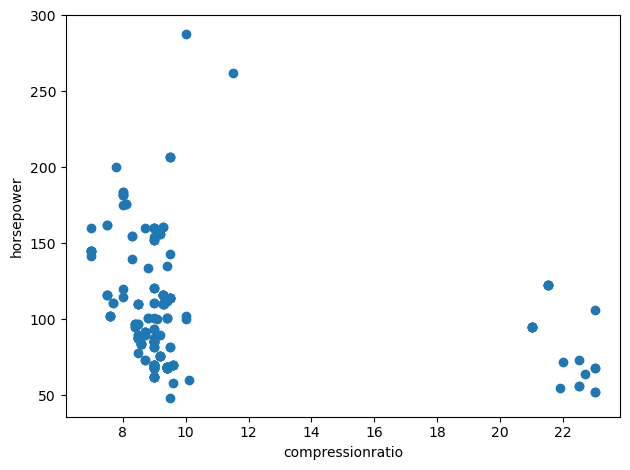



compressionratio vs peakrpm


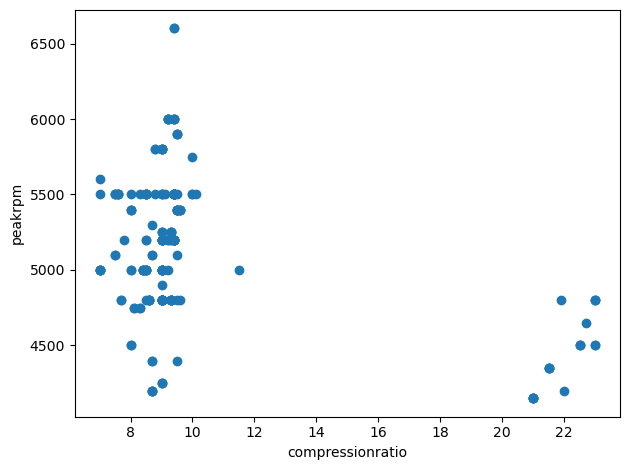



compressionratio vs citympg


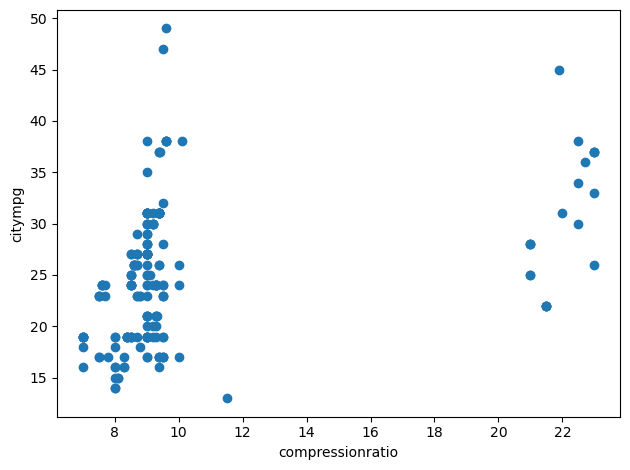



compressionratio vs highwaympg


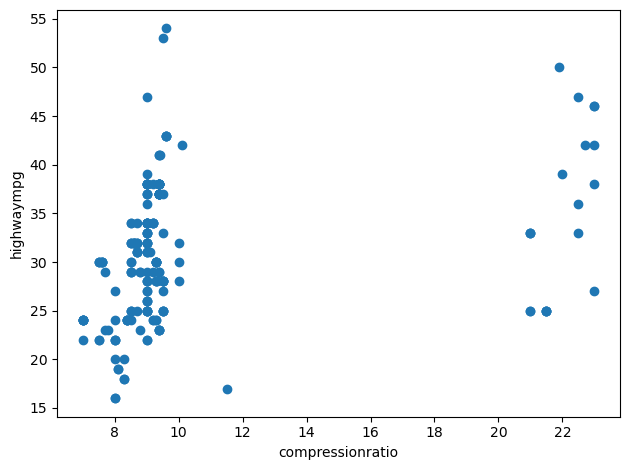



compressionratio vs price


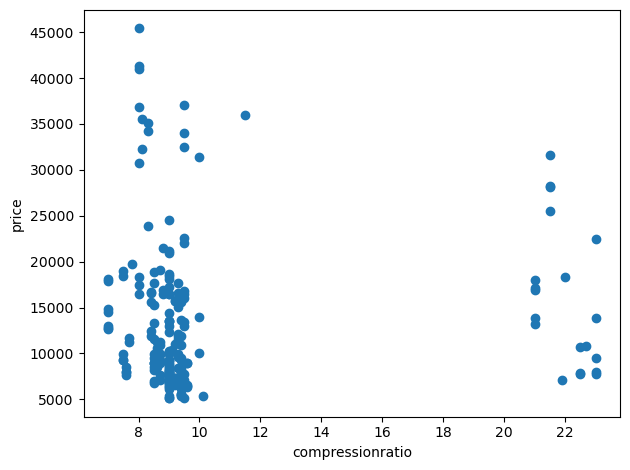



horsepower vs peakrpm


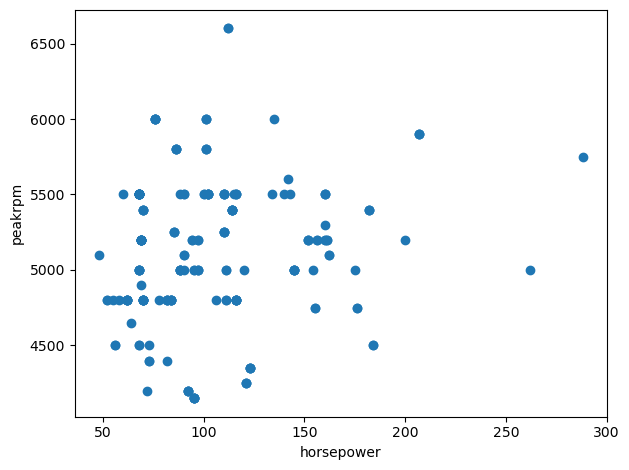



horsepower vs citympg


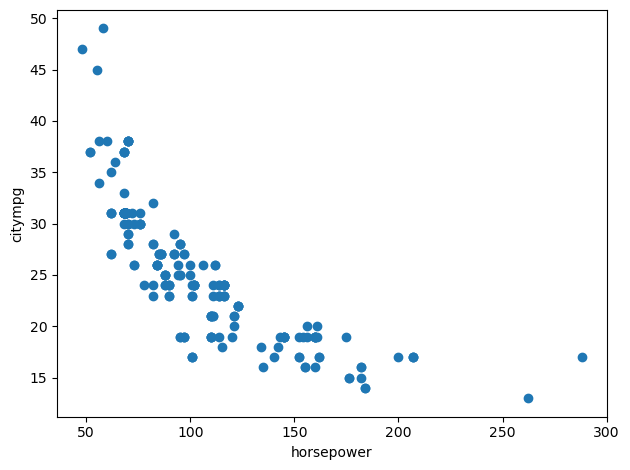



horsepower vs highwaympg


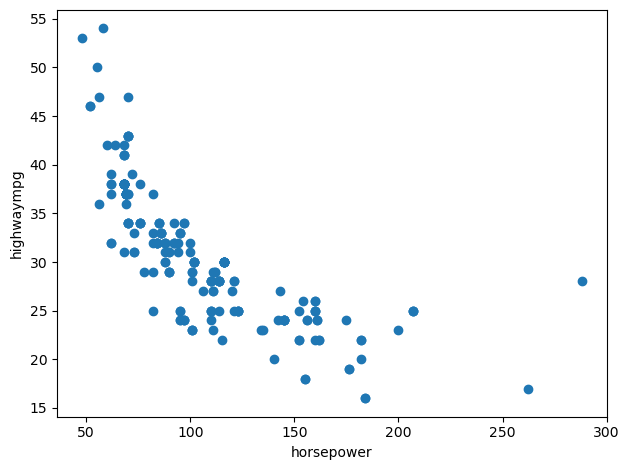



horsepower vs price


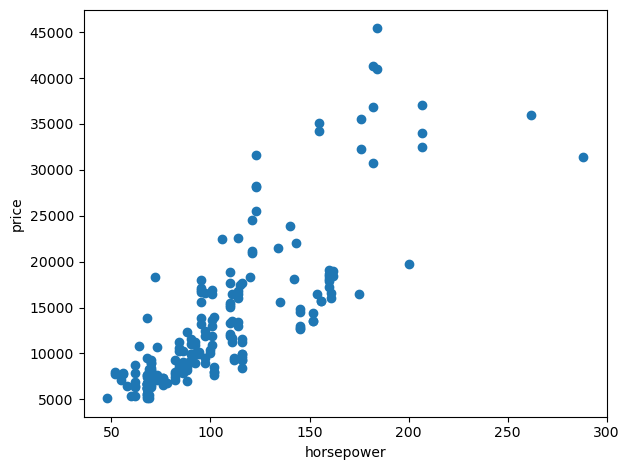



peakrpm vs citympg


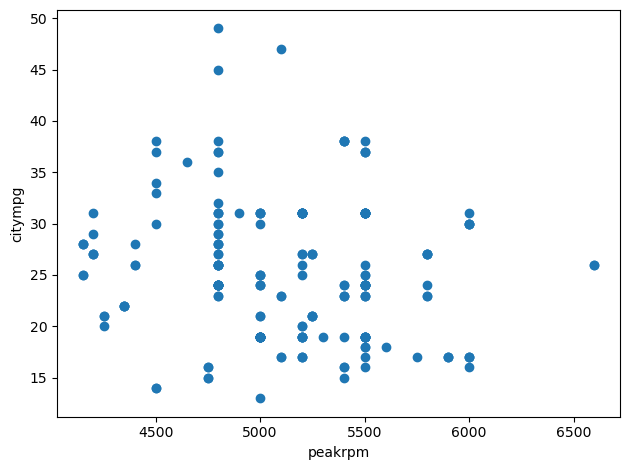



peakrpm vs highwaympg


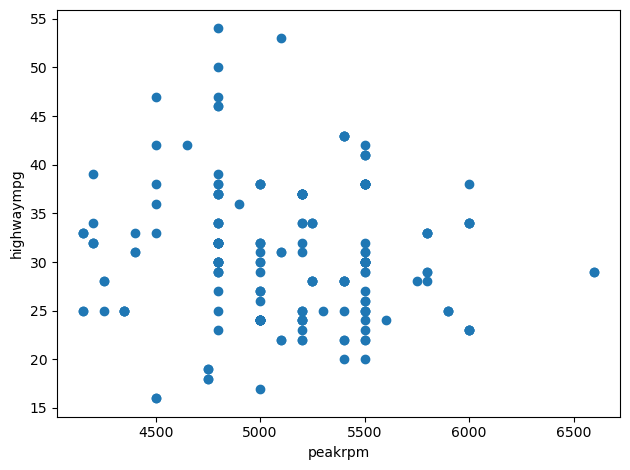



peakrpm vs price


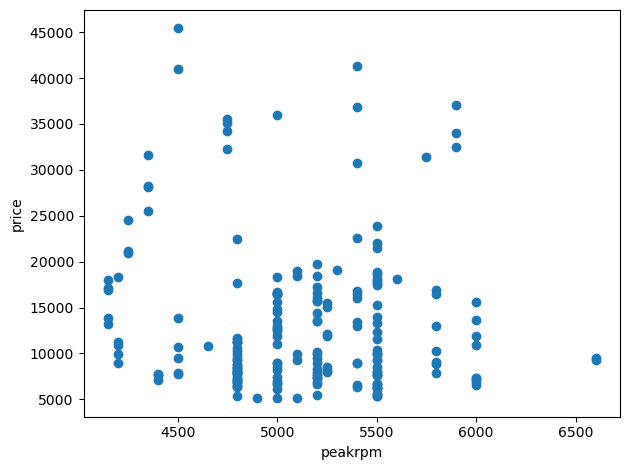



citympg vs highwaympg


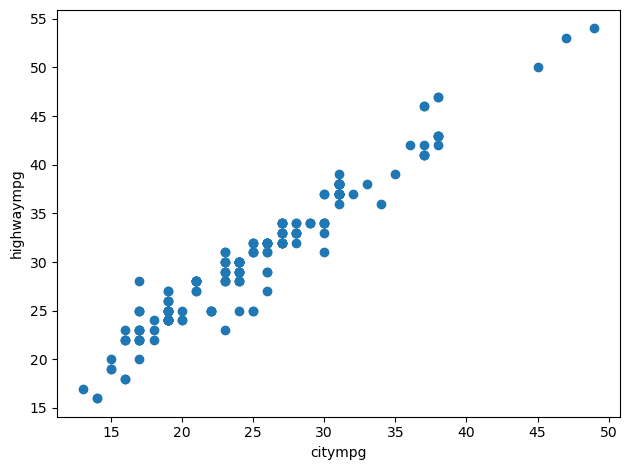



citympg vs price


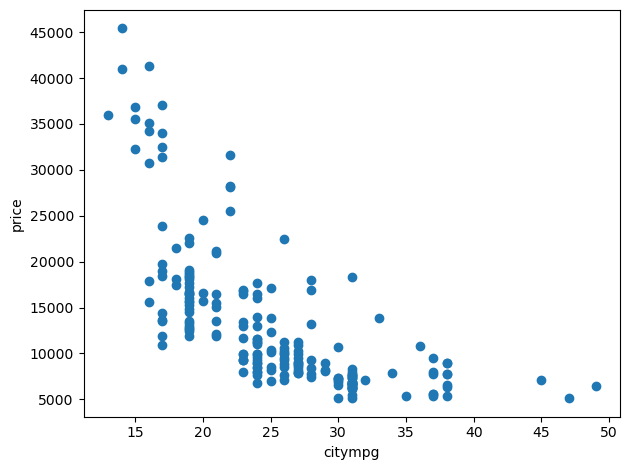



highwaympg vs price


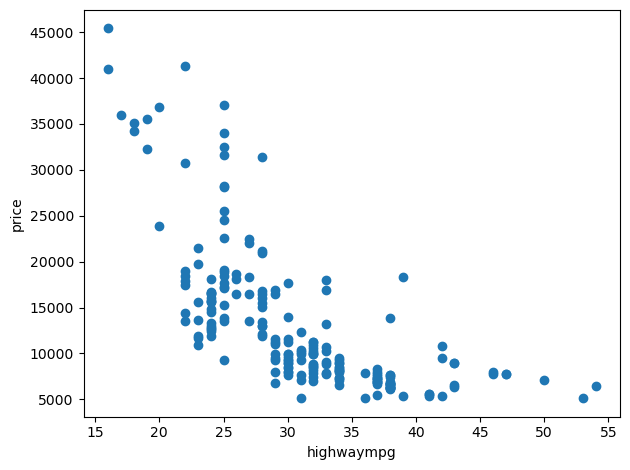

In [20]:
# Scatter Plot
# For each pair of numerical variables, construct a scatter plot of the variables.
temp = []
for i in num_cols:
    if (i == 'car_ID'): continue
    for j in num_cols:
        if (j == 'car_ID'): continue
        if (i == j): continue
        temp.append(i)
        if (j in temp): continue
        print(i, "vs", j)
        plt.xlabel(i)
        plt.ylabel(j)
        plt.scatter(x=df[i], y=df[j])
        plt.tight_layout()
        plt.show()
        print("\n")

<b>Positive Linear Relationship</b>
- wheelbase vs carlength
- wheelbase vs carwidth
- wheelbase vs carheight
- wheelbase vs curbweight
- carlength vs carwidth
- carlength vs curbweight
- carwidth vs curbweight
- curbweight vs enginesize
- curbweight vs price
- enginesize vs price
- horsepower vs price
- citympg vs highwaympg

<b>Negative Linear Relationship</b>
- carlength vs citympg
- carlength vs highwaympg
- carwidth vs citympg
- carwidth vs highwaympg
- curbweight vs citympg
- curbweight vs highwaympg
- horsepower vs highwaympg
- citympg vs price
- highwaympg vs price

### reduce the car name length

In [21]:
df['CarName'] = df['CarName'].str[:5]

df.CarName.head(50)

0     alfa-
1     alfa-
2     alfa-
3     audi 
4     audi 
5     audi 
6     audi 
7     audi 
8     audi 
9     audi 
10    bmw 3
11    bmw 3
12    bmw x
13    bmw x
14    bmw z
15    bmw x
16    bmw x
17    bmw x
18    chevr
19    chevr
20    chevr
21    dodge
22    dodge
23    dodge
24    dodge
25    dodge
26    dodge
27    dodge
28    dodge
29    dodge
30    honda
31    honda
32    honda
33    honda
34    honda
35    honda
36    honda
37    honda
38    honda
39    honda
40    honda
41    honda
42    honda
43    isuzu
44    isuzu
45    isuzu
46    isuzu
47    jagua
48    jagua
49    jagua
Name: CarName, dtype: object

In [22]:
df.CarName.nunique()

31

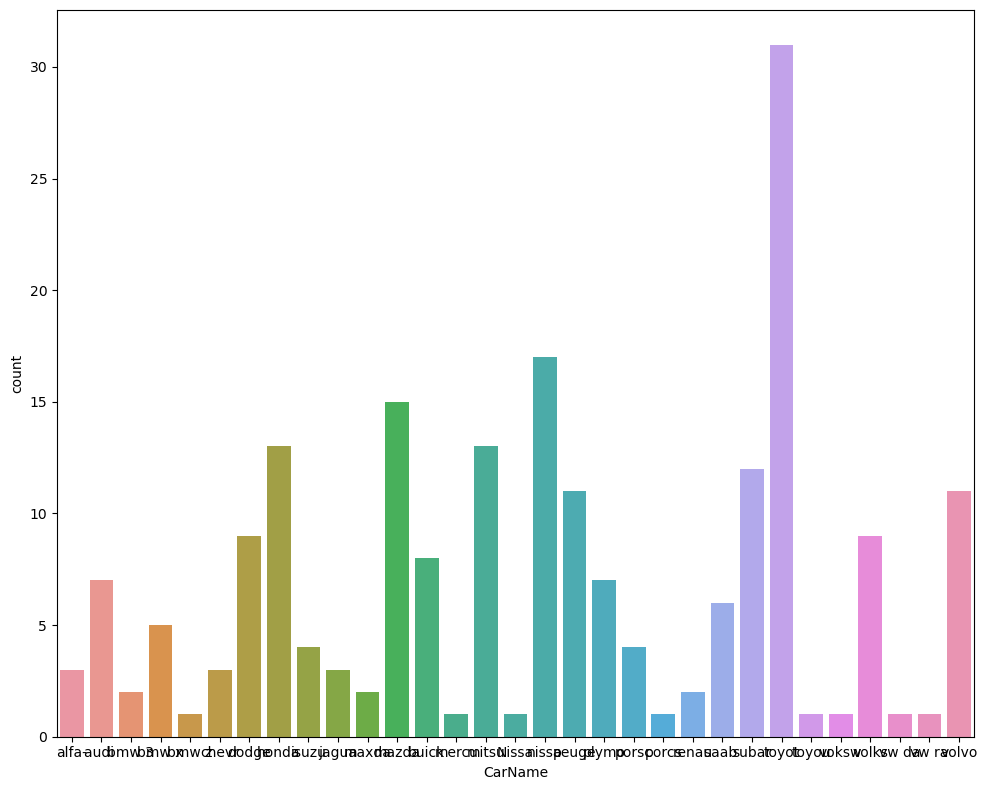

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x=df['CarName'])
plt.tight_layout()
plt.show()

## Transforming Categorical Values into Numerical Values

In [24]:
df1 = df.copy()

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for feature in cat_cols: df1[feature] = encoder.fit_transform(df1[feature])

In [25]:
df1.head(5)

symboling  CarName  fueltype  aspiration  doornumber  carbody  drivewheel  \
0          3        1         1           0           1        0           2   
1          3        1         1           0           1        0           2   
2          1        1         1           0           1        2           2   
3          2        2         1           0           0        3           1   
4          2        2         1           0           0        3           0   

   enginelocation  wheelbase  carlength  ...  enginesize  fuelsystem  \
0               0       88.6      168.8  ...         130           5   
1               0       88.6      168.8  ...         130           5   
2               0       94.5      171.2  ...         152           5   
3               0       99.8      176.6  ...         109           5   
4               0       99.4      176.6  ...         136           5   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 25 columns]

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    int32  
 2   fueltype          205 non-null    int32  
 3   aspiration        205 non-null    int32  
 4   doornumber        205 non-null    int32  
 5   carbody           205 non-null    int32  
 6   drivewheel        205 non-null    int32  
 7   enginelocation    205 non-null    int32  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int32  
 14  cylindernumber    205 non-null    int32  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int32  
 1

# 3) Building Models

## 3.1) Splitting the Dataset into Features and Label

In [27]:
X = df1.iloc[:, :-1]
Y = df1['price']

In [28]:
X

symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0            3        1         1           0           1        0   
1            3        1         1           0           1        0   
2            1        1         1           0           1        2   
3            2        2         1           0           0        3   
4            2        2         1           0           0        3   
..         ...      ...       ...         ...         ...      ...   
200         -1       28         1           0           0        3   
201         -1       28         1           1           0        3   
202         -1       28         1           0           0        3   
203         -1       28         0           1           0        3   
204         -1       28         1           1           0        3   

     drivewheel  enginelocation  wheelbase  carlength  ...  cylindernumber  \
0             2               0       88.6      168.8  ...               2   
1             2               0       88.6      168.8  ...               2   
2             2               0       94.5      171.2  ...               3   
3             1               0       99.8      176.6  ...               2   
4             0               0       99.4      176.6  ...               1   
..          ...             ...        ...        ...  ...             ...   
200           2               0      109.1      188.8  ...               2   
201           2               0      109.1      188.8  ...               2   
202           2               0      109.1      188.8  ...               3   
203           2               0      109.1      188.8  ...               3   
204           2               0      109.1      188.8  ...               2   

     enginesize  fuelsystem  boreratio  stroke  compressionratio  horsepower  \
0           130           5       3.47    2.68               9.0         111   
1           130           5       3.47    2.68               9.0         111   
2           152           5       2.68    3.47               9.0         154   
3           109           5       3.19    3.40              10.0         102   
4           136           5       3.19    3.40               8.0         115   
..          ...         ...        ...     ...               ...         ...   
200         141           5       3.78    3.15               9.5         114   
201         141           5       3.78    3.15               8.7         160   
202         173           5       3.58    2.87               8.8         134   
203         145           3       3.01    3.40              23.0         106   
204         141           5       3.78    3.15               9.5         114   

     peakrpm  citympg  highwaympg  
0       5000       21          27  
1       5000       21          27  
2       5000       19          26  
3       5500       24          30  
4       5500       18          22  
..       ...      ...         ...  
200     5400       23          28  
201     5300       19          25  
202     5500       18          23  
203     4800       26          27  
204     5400       19          25  

[205 rows x 24 columns]

In [29]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

## 3.2) Feature Scaling using StandardScaler

In [30]:
# Feature Scaling on Training Set & Test Set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

In [31]:
X

array([[ 1.74347043, -1.97896052,  0.32879797, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [ 1.74347043, -1.97896052,  0.32879797, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [ 0.133509  , -1.97896052,  0.32879797, ..., -0.26296022,
        -0.95301169, -0.69162706],
       ...,
       [-1.47645244,  1.50831948,  0.32879797, ...,  0.78785546,
        -1.10624102, -1.12833203],
       [-1.47645244,  1.50831948, -3.04138127, ..., -0.68328649,
         0.11959362, -0.54605874],
       [-1.47645244,  1.50831948,  0.32879797, ...,  0.57769233,
        -0.95301169, -0.83719538]])

## 3.3) Train Evalute Test Split

In [32]:
(X.shape, Y.shape)

((205, 24), (205,))

In [33]:
from sklearn.model_selection import train_test_split
# Training and Testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)

# Training and Evaluation data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=69)

In [34]:
(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

((131, 24), (41, 24), (131,), (41,))

In [35]:
(X_val.shape, Y_val.shape)

((33, 24), (33,))

In [36]:
(X_train, X_test, X_val)

(array([[ 0.133509  ,  0.9916854 ,  0.32879797, ..., -0.68328649,
          0.88574028,  1.05519283],
        [-0.67147172,  0.86252689,  0.32879797, ..., -1.52393903,
          0.42605228,  0.32735121],
        [ 0.133509  , -1.46232644,  0.32879797, ..., -1.83918373,
         -0.79978236, -0.83719538],
        ...,
        [ 1.74347043, -1.07485089,  0.32879797, ..., -0.26296022,
         -0.95301169, -0.98276371],
        [-0.67147172, -0.81653385,  0.32879797, ...,  0.57769233,
          1.95834559,  1.78303445],
        [ 0.133509  , -0.94569237,  0.32879797, ...,  0.78785546,
         -0.03363571,  0.03621456]]),
 array([[-6.71471721e-01, -6.87375334e-01,  3.28797975e-01,
         -4.69295318e-01, -8.84651737e-01,  4.49677322e-01,
          1.21333041e+00, -1.21866670e-01,  2.37110830e+00,
          2.07608661e+00,  1.72535284e+00, -3.79428606e-01,
          2.90798777e+00, -2.86510549e+00,  1.11220997e+00,
          3.15574198e+00,  8.69567500e-01,  1.11126413e+00,
          2.9

In [37]:
(Y_train, Y_test, Y_val)

(152     6488.0
 142     7775.0
 14     24565.0
 117    18150.0
 140     7603.0
         ...   
 12     20970.0
 165     9298.0
 29     12964.0
 45      8916.5
 42     10345.0
 Name: price, Length: 131, dtype: float64,
 47     32250.0
 68     28248.0
 181    15750.0
 57     13645.0
 89      5499.0
 58     15645.0
 126    32528.0
 32      5399.0
 95      7799.0
 162     9258.0
 31      6855.0
 86      8189.0
 153     6918.0
 178    16558.0
 23      7957.0
 8      23875.0
 13     21105.0
 15     30760.0
 132    11850.0
 135    15510.0
 136    18150.0
 199    18950.0
 161     8358.0
 99      8949.0
 155     8778.0
 160     7738.0
 62     10245.0
 166     9538.0
 102    14399.0
 26      7609.0
 202    21485.0
 6      17710.0
 139     7053.0
 81      8499.0
 36      7295.0
 59      8845.0
 21      5572.0
 143     9960.0
 1      16500.0
 85      6989.0
 158     7898.0
 Name: price, dtype: float64,
 84     14489.0
 39      8845.0
 55     10945.0
 69     28176.0
 37      7895.0
 110    13860.0

## 3.4) Model Selection and Evaluation

We are going to build 4 models.

- Decision Tree Regressor
- Random Forest Regressor
- XGB Regressor
- Linear Regression

### 3.4.1) Create a function to get metrics

In [38]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

'''
The Following function calculate the following metrics:
- Mean Absolute Error (MAE): should be low
- Mean Squared Error (MSE): should be low
- R-squared (R²) Score: Best possible score is 1.0, lower values are worse.
- Root Mean Squared Error (RMSE): should be low
'''

# For Prediction Task
def get_metrics_pred(y_true, y_pred):
    dict_metrics = {
        'Mean_Absolute_Error': round(mean_absolute_error(y_true, y_pred), 2),
        'R2_Score': round(r2_score(y_true, y_pred), 2),
        'Mean_Squared_Error': round(mean_squared_error(y_true, y_pred), 2),
        'Root Mean Squared Error': round(np.sqrt(mean_squared_error(y_true, y_pred)), 2),
    }
    
    return dict_metrics

## > DecisionTreeRegressor
The Decision Regressor Model yields a better result of MAE, MSE, and RMSE when performing a prediction on testing data

<b> testing data </b>

{'Mean_Absolute_Error': 1880.98, 'R2_Score': 0.87, 'Mean_Squared_Error': 7209595.02, 'Root Mean Squared Error': 2685.07}


In [39]:
# Training and validation 

from sklearn.tree import DecisionTreeRegressor

# Creating pipeline with PCA analysis and balanced class
pip_model_no_pca = Pipeline(steps=[
    ('model', DecisionTreeRegressor(random_state=69))
])

# Fit piepline without PCA
weights = class_weight.compute_sample_weight(class_weight='balanced', y=Y_train)
pip_model_no_pca.fit(X_train, Y_train, model__sample_weight=weights)

# Generate Predictions using the correctly fitted pipeline
Y_pred = pip_model_no_pca.predict(X_val)

# Evaluate Metrics
metrics = get_metrics_pred(Y_val, Y_pred)

# View Results
print(metrics)

# Plot Results
fig = px.scatter(x=Y_val, y=Y_pred, labels={'x': 'Actual Price', 'y': 'Predicted Price'}, title='Decision Tree Regressor Model Prediction')
fig.show()

{'Mean_Absolute_Error': 2144.33, 'R2_Score': 0.87, 'Mean_Squared_Error': 9493036.21, 'Root Mean Squared Error': 3081.08}


In [40]:
# Training and testing

from sklearn.tree import DecisionTreeRegressor

# Creating pipeline with PCA analysis and balanced class
pip_model_no_pca = Pipeline(steps=[
    ('model', DecisionTreeRegressor(random_state=69))
])

# Fit piepline without PCA
weights = class_weight.compute_sample_weight(class_weight='balanced', y=Y_train)
pip_model_no_pca.fit(X_train, Y_train, model__sample_weight=weights)

# Generate Predictions using the correctly fitted pipeline
Y_pred = pip_model_no_pca.predict(X_test)

# Evaluate Metrics
metrics = get_metrics_pred(Y_test, Y_pred)

# View Results
print(metrics)

# Plot Results
fig = px.scatter(x=Y_test, y=Y_pred, labels={'x': 'Actual Price', 'y': 'Predicted Price'}, title='Decision Tree Regressor Model Prediction')
fig.show()

{'Mean_Absolute_Error': 1880.98, 'R2_Score': 0.87, 'Mean_Squared_Error': 7209595.02, 'Root Mean Squared Error': 2685.07}


## > Random Forest Regressor

<b> (testing data) </b>

{'Mean_Absolute_Error': 1341.46, 'R2_Score': 0.94, 'Mean_Squared_Error': 3379454.46, 'Root Mean Squared Error': 1838.33}

The R2_score for Random Forest is higher than both Decision Tree Regressor and XGBoost

In [41]:
# Training and validation 

from sklearn.ensemble import RandomForestRegressor

# Creating pipeline with PCA analysis and balanced class
pip_model_no_pca = Pipeline(steps=[
    ('model', RandomForestRegressor(random_state=69))
])

# Fit piepline without PCA
weights = class_weight.compute_sample_weight(class_weight='balanced', y=Y_train)
pip_model_no_pca.fit(X_train, Y_train, model__sample_weight=weights)

# Generate Predictions using the correctly fitted pipeline
Y_pred = pip_model_no_pca.predict(X_val)

# Evaluate Metrics
metrics = get_metrics_pred(Y_val, Y_pred)

# View Results
print(metrics)

# Plot Results
fig = px.scatter(x=Y_val, y=Y_pred, labels={'x': 'Actual Price', 'y': 'Predicted Price'}, title='Random Forest Regressor Model Prediction')
fig.show()

{'Mean_Absolute_Error': 1559.21, 'R2_Score': 0.93, 'Mean_Squared_Error': 4978560.26, 'Root Mean Squared Error': 2231.27}


In [42]:
# Training and testing
from sklearn.ensemble import RandomForestRegressor

# Creating pipeline with PCA analysis and balanced class
pip_model_no_pca = Pipeline(steps=[
    ('model', RandomForestRegressor(random_state=69))
])

# Fit piepline without PCA
weights = class_weight.compute_sample_weight(class_weight='balanced', y=Y_train)
pip_model_no_pca.fit(X_train, Y_train, model__sample_weight=weights)

# Generate Predictions using the correctly fitted pipeline
Y_pred = pip_model_no_pca.predict(X_test)

# Evaluate Metrics
metrics = get_metrics_pred(Y_test, Y_pred)

# View Results
print(metrics)

# Plot Results
fig = px.scatter(x=Y_test, y=Y_pred, labels={'x': 'Actual Price', 'y': 'Predicted Price'}, title='Random Forest Regressor Model Prediction')
fig.show()

{'Mean_Absolute_Error': 1341.46, 'R2_Score': 0.94, 'Mean_Squared_Error': 3379454.46, 'Root Mean Squared Error': 1838.33}


## > XGB Regressor

<b> (testing data) </b>

{'Mean_Absolute_Error': 1496.39, 'R2_Score': 0.92, 'Mean_Squared_Error': 4301285.08, 'Root Mean Squared Error': 2073.95}

<b> The R2_Score for XGBoost is higher than Decision Tree Regressor </b>

In [43]:
!pip install xgboost

In [44]:
# Training and validation 

from xgboost import XGBRegressor

# Creating pipeline with PCA analysis and balanced class
pip_model_no_pca = Pipeline(steps=[
    ('model', XGBRegressor(random_state=69))
])

# Fit piepline without PCA
weights = class_weight.compute_sample_weight(class_weight='balanced', y=Y_train)
pip_model_no_pca.fit(X_train, Y_train, model__sample_weight=weights)

# Generate Predictions using the correctly fitted pipeline
Y_pred = pip_model_no_pca.predict(X_val)

# Evaluate Metrics
metrics = get_metrics_pred(Y_val, Y_pred)

# View Results
print(metrics)

# Plot Results
fig = px.scatter(x=Y_val, y=Y_pred, labels={'x': 'Actual Price', 'y': 'Predicted Price'}, title='XGBoost Model Prediction')
fig.show()

{'Mean_Absolute_Error': 1646.14, 'R2_Score': 0.93, 'Mean_Squared_Error': 5283206.01, 'Root Mean Squared Error': 2298.52}


In [45]:
# Training and testing

from xgboost import XGBRegressor

# Creating pipeline with PCA analysis and balanced class
pip_model_no_pca = Pipeline(steps=[
    ('model', XGBRegressor(random_state=69))
])

# Fit piepline without PCA
weights = class_weight.compute_sample_weight(class_weight='balanced', y=Y_train)
pip_model_no_pca.fit(X_train, Y_train, model__sample_weight=weights)

# Generate Predictions using the correctly fitted pipeline
Y_pred = pip_model_no_pca.predict(X_test)

# Evaluate Metrics
metrics = get_metrics_pred(Y_test, Y_pred)

# View Results
print(metrics)

# Plot Results
fig = px.scatter(x=Y_test, y=Y_pred, labels={'x': 'Actual Price', 'y': 'Predicted Price'}, title='XGBoost Model Prediction')
fig.show()

{'Mean_Absolute_Error': 1496.39, 'R2_Score': 0.92, 'Mean_Squared_Error': 4301285.08, 'Root Mean Squared Error': 2073.95}


## > Linear Regression

dont use this one

In [46]:
# Training and validation 

from sklearn.linear_model import LinearRegression

# Creating pipeline with PCA analysis and balanced class
pip_model_no_pca = Pipeline(steps=[
    ('model', LinearRegression())
])

# Fit piepline without PCA
weights = class_weight.compute_sample_weight(class_weight='balanced', y=Y_train)
pip_model_no_pca.fit(X_train, Y_train, model__sample_weight=weights)

# Generate Predictions using the correctly fitted pipeline
Y_pred = pip_model_no_pca.predict(X_val)

# Evaluate Metrics
metrics = get_metrics_pred(Y_val, Y_pred)

# View Results
print(metrics)

# Plot Results
fig = px.scatter(x=Y_val, y=Y_pred, labels={'x': 'Actual Price', 'y': 'Predicted Price'}, title='Linear Regression Model Prediction')
fig.show()

{'Mean_Absolute_Error': 2705.01, 'R2_Score': 0.78, 'Mean_Squared_Error': 16610964.55, 'Root Mean Squared Error': 4075.66}


In [47]:
# Training and testing

from sklearn.linear_model import LinearRegression

# Creating pipeline with PCA analysis and balanced class
pip_model_no_pca = Pipeline(steps=[
    ('model', LinearRegression())
])

# Fit piepline without PCA
weights = class_weight.compute_sample_weight(class_weight='balanced', y=Y_train)
pip_model_no_pca.fit(X_train, Y_train, model__sample_weight=weights)

# Generate Predictions using the correctly fitted pipeline
Y_pred = pip_model_no_pca.predict(X_test)

# Evaluate Metrics
metrics = get_metrics_pred(Y_test, Y_pred)

# View Results
print(metrics)

# Plot Results
fig = px.scatter(x=Y_test, y=Y_pred, labels={'x': 'Actual Price', 'y': 'Predicted Price'}, title='Linear Regression Model Prediction')
fig.show()

{'Mean_Absolute_Error': 2148.85, 'R2_Score': 0.87, 'Mean_Squared_Error': 7376021.36, 'Root Mean Squared Error': 2715.88}


## Evaluation between each model

comparing using the Y_pred with Y_test (testing data)

1. Linear Regression:

{'Mean_Absolute_Error': 2148.85, 'R2_Score': 0.87, 'Mean_Squared_Error': 7376021.36, 'Root Mean Squared Error': 2715.88}

2. Decision Tree Regressor: 

{'Mean_Absolute_Error': 1880.98, 'R2_Score': 0.87, 'Mean_Squared_Error': 7209595.02, 'Root Mean Squared Error': 2685.07}

3. XGBoost: 

{'Mean_Absolute_Error': 1496.39, 'R2_Score': 0.92, 'Mean_Squared_Error': 4301285.08, 'Root Mean Squared Error': 2073.95}

4. Random Forest Regressor:

{'Mean_Absolute_Error': 1341.46, 'R2_Score': 0.94, 'Mean_Squared_Error': 3379454.46, 'Root Mean Squared Error': 1838.33}

From the comparison above, Random Forest Regression yields the best result (lower MAE, MSE, RMSE and the highest R2_score comparing to the rest models)

<b>Reference:</b> https://medium.com/@iabbasali/car-price-prediction-using-machine-learning-94152fccc7ba